In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Table of Contents
1. [Uploading data & Creating Data Tables](#1)
    1. [Oil price](#1.1)
    2. [GDP](#1.2)
    3. [Global temperature](#1.3)
    4. [CO2 Emission](#1.4)
    5. [CO2 Concentration](#1.5)
2. [Test stationary](#2)
    1. [Oil price](#2.1)
    2. [GDP](#2.2)
    3. [Global temperature](#2.3)
    4. [CO2 Emission](#2.4)
    4. [CO2 Concentration](#2.5)
    
3. [Quarterly analysis](#3)
    1. [Data preparation](#3.1)
    2. [Regression](#3.2)
    3. [Cointegration - VECM](#3.3)
4. [Yearly analysis](#4)
    1. [CO2 Emission to CO2 concentration](#4.1)
    2. [Oil price to CO2 concentration](#4.2)
        1. [Regression]
5. [Monthly analysis](#5)
    1. [Change in crude oil price cannot explain change in CO2 concentration](#5.1)
6. [Exploratory analysis](#6)
7. [Correlation plot](#7)

# 1.) UPLOADING DATA & CREATING DATA TABLES <a name="1"></a>

### 1.1 Oil price <a name="1.1"></a>

In [2]:
#WTI #Brent #Eternal #Gasoline
oil_price = pd.read_csv('Weekly_data_csv_v4.csv')

In [3]:
oil_price.columns

Index(['Weekindex', 'Date', 'Year', 'Month', 'Week', 'Day', 'Par_Month',
       'Par_Week', 'Par_Day', 'oil_spot_WTI', 'oil_spot_Brent',
       'future_oil_contract_1', 'future_oil_contract_2',
       'future_oil_contract_3', 'future_oil_contract_4', 'Gasoline_Price_US',
       'sugar_price_us', 'ethanol_price_us', 'Dummy_Financial_crisis',
       'chg_oil_spot_WTI', 'chg_oil_spot_Brent', 'chg_oil_future_contract1',
       'chg_oil_future_contract2', 'chg_oil_future_contract3',
       'chg_oil_future_contract4', 'chg_Gasoline_price_US',
       'chg_Sugar_price_US', 'chg_ethanol_price_US',
       'chg_oil_spot_WTI_Positive', 'chg_oil_spot_Brent_Positive',
       'chg_oil_future_contract1_Positive',
       'chg_oil_future_contract2_Positive',
       'chg_oil_future_contract3_Positive',
       'chg_oil_future_contract4_Positive', 'chg_Gasoline_price_US_Positive',
       'chg_Sugar_price_US_Positive', 'chg_ethanol_price_US_Positive',
       'chg_oil_spot_WTI_Negative', 'chg_oil_spot_Brent_

In [4]:
oil_price = oil_price[['Weekindex', 'Date', 'Year', 'Month', 'Week', 'Day', 'Par_Month','Par_Week','Par_Day', 'oil_spot_WTI','oil_spot_Brent','future_oil_contract_1','sugar_price_us', 'ethanol_price_us','chg_oil_spot_WTI','chg_oil_spot_Brent','chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_oil_future_contract1','chg_oil_future_contract1_Positive','chg_oil_future_contract1_Negative','Gasoline_Price_US','chg_Gasoline_price_US','chg_Gasoline_price_US_Positive','chg_Gasoline_price_US_future']]

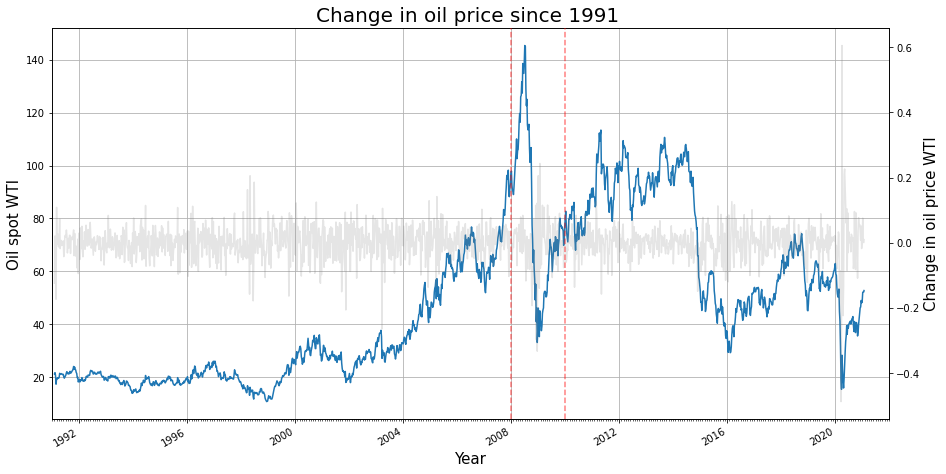

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

oil_price['Date_edited'] = oil_price['Date'].apply(lambda x : datetime.strptime( x,'%m/%d/%Y') )

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')


fig, ax = plt.subplots(figsize = (15,8))
ax.plot('Date_edited', 'oil_spot_WTI', data=oil_price, color = 'tab:blue')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(list(oil_price['Date_edited'])[0].strftime('%Y-%m-%d'),'Y')
datemax = np.datetime64(list(oil_price['Date_edited'])[-1].strftime('%Y-%m-%d'),'Y') + np.timedelta64(1, 'Y')
#datemin = datetime.strptime(list(oil_price['Date'])[0],'%m/%d/%Y')
#datemax = datetime.strptime(list(oil_price['Date'])[-1],'%m/%d/%Y') + relativedelta(years=1)
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

ax.set_xlabel('Year',fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax.set_ylabel('Oil spot WTI',fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax.set_title('Change in oil price since 1991 ', fontdict={'fontsize': 20, 'fontweight': 'medium'})


ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

#color = color = 'tab:blue'
ax2.plot('Date_edited', 'chg_oil_spot_WTI', data=oil_price, color = 'tab:grey', alpha=0.2)

ax2.tick_params(axis = 'y') #,labelcolor = color)
ax2.set_ylabel('Change in oil price WTI', size = 15)

ax3 = ax.twinx()


break_year = np.datetime64(date(2008, 1, 1).strftime('%Y-%m-%d'),'Y')
ax3.axvline(break_year, ls='--', color='r', alpha = 0.5)
ax3.axis('off')

ax4 = ax.twinx()


break_year = np.datetime64(date(2010, 1, 1).strftime('%Y-%m-%d'),'Y')
ax4.axvline(break_year, ls='--', color='r', alpha = 0.5)
ax4.axis('off')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [6]:
oil_price_modified = oil_price.copy()
year_53 = [1992,1998,2004,2009,2015,2020]
for i in year_53:
    week = oil_price_modified[oil_price_modified['Year'] == 53]['Week']
    oil_price_modified[oil_price_modified['Week'] == 53]['Week'] = 1
    oil_price_modified[oil_price_modified['Week'] == 53]['Year'] = i+1
oil_price_modified[oil_price_modified['Year'] == 1992]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,Weekindex,Date,Year,Month,Week,Day,Par_Month,Par_Week,Par_Day,oil_spot_WTI,...,chg_oil_spot_WTI_Positive,chg_oil_spot_WTI_Negative,chg_oil_future_contract1,chg_oil_future_contract1_Positive,chg_oil_future_contract1_Negative,Gasoline_Price_US,chg_Gasoline_price_US,chg_Gasoline_price_US_Positive,chg_Gasoline_price_US_future,Date_edited
48,314,1/3/1992,1992,1,1,3,199201,19920101,19921103,19.22,...,0.021031,0.000000,0.024745,0.024745,0.000000,1.053,-0.009452,0.000000,-0.011226,1992-01-03
49,315,1/10/1992,1992,1,2,10,199201,19920102,19921110,18.26,...,0.000000,-0.051239,-0.053403,0.000000,-0.053403,1.042,-0.010501,0.000000,-0.009452,1992-01-10
50,316,1/17/1992,1992,1,3,17,199201,19920103,19921117,19.11,...,0.045499,0.000000,0.049756,0.049756,0.000000,1.026,-0.015474,0.000000,-0.010501,1992-01-17
51,317,1/24/1992,1992,1,4,24,199201,19920104,19921124,18.75,...,0.000000,-0.019018,-0.008386,0.000000,-0.008386,1.014,-0.011765,0.000000,-0.015474,1992-01-24
52,318,1/31/1992,1992,1,5,31,199201,19920105,19921131,18.93,...,0.009554,0.000000,-0.005277,0.000000,-0.005277,1.006,-0.007921,0.000000,-0.011765,1992-01-31
53,319,2/7/1992,1992,2,6,7,199202,19920206,19921107,19.91,...,0.050474,0.000000,0.050049,0.050049,0.000000,0.995,-0.010995,0.000000,-0.007921,1992-02-07
54,320,2/14/1992,1992,2,7,14,199202,19920207,19921114,19.42,...,0.000000,-0.024919,-0.020850,0.000000,-0.020850,1.004,0.009005,0.009005,-0.010995,1992-02-14
55,321,2/21/1992,1992,2,8,21,199202,19920208,19921121,18.60,...,0.000000,-0.043142,-0.041979,0.000000,-0.041979,1.011,0.006948,0.006948,0.009005,1992-02-21
56,322,2/28/1992,1992,2,9,28,199202,19920209,19921128,18.69,...,0.004827,0.000000,0.001071,0.001071,0.000000,1.014,0.002963,0.002963,0.006948,1992-02-28
57,323,3/6/1992,1992,3,10,6,199203,19920310,19921106,18.53,...,0.000000,-0.008598,-0.009142,0.000000,-0.009142,1.012,-0.001974,0.000000,0.002963,1992-03-06


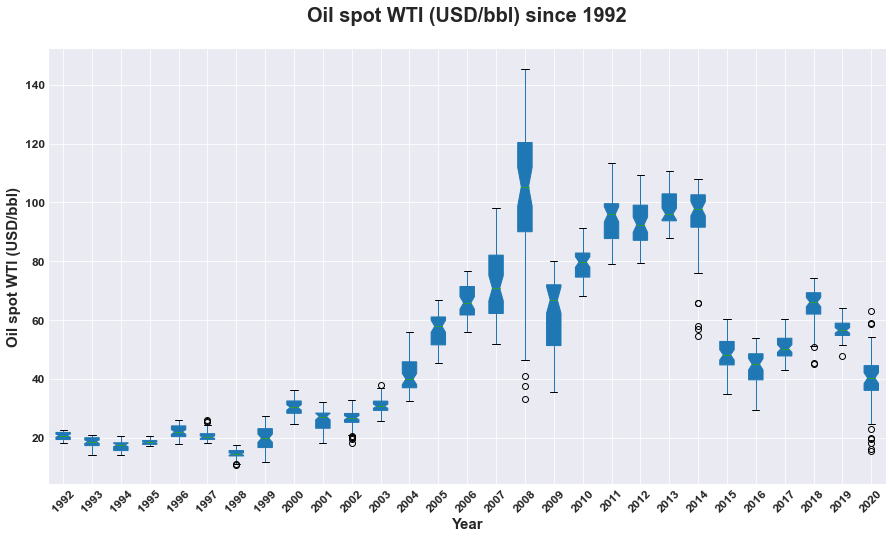

In [7]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = oil_price[['Year','oil_spot_WTI']].groupby(Grouper('Year'))
years = DataFrame()
att = []
att2 = []
plt.figure(figsize = (15,8))
for name, group in groups:
    if len(group['oil_spot_WTI'].values) == 53:
        years[name] = group['oil_spot_WTI'].values[:-1]
    elif len(group['oil_spot_WTI'].values) < 52:
        pass
    else:
        years[name] = group['oil_spot_WTI'].values
plt.style.use('seaborn-darkgrid')
years.boxplot( notch=True, patch_artist=True)
ax.grid(color='r', linestyle='-', linewidth=1)
plt.xticks(rotation = 45, fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, weight = 'bold')
plt.xlabel("Year", fontsize = 15, weight = 'bold')
plt.ylabel("Oil spot WTI (USD/bbl)", fontsize = 15, weight = 'bold')
plt.title("Oil spot WTI (USD/bbl) since 1992", fontsize = 20, weight = 'bold', x = 0.5, y = 1.05)

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


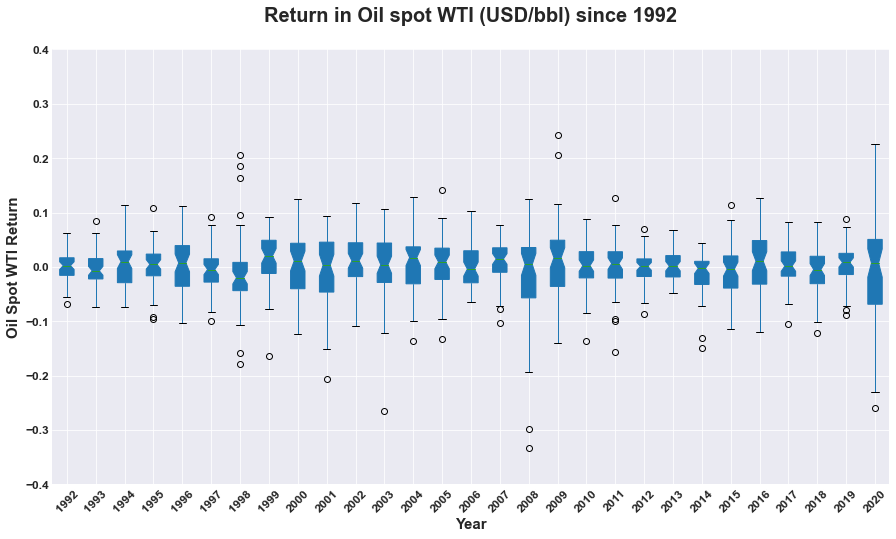

In [8]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot


temp_frame = oil_price[['Year','oil_spot_WTI']]
k = np.log(temp_frame[['oil_spot_WTI']]) - np.log(temp_frame[['oil_spot_WTI']].shift(1))
temp_frame['chg_oil_spot_WTI'] = k
temp_frame.dropna(inplace = True)

groups = temp_frame[['Year','chg_oil_spot_WTI']].groupby(Grouper('Year'))
years = DataFrame()
att = []
att2 = []
plt.figure(figsize = (15,8))
for name, group in groups:
    if len(group['chg_oil_spot_WTI'].values) == 53:
        years[name] = group['chg_oil_spot_WTI'].values[:-1]
    elif len(group['chg_oil_spot_WTI'].values) < 52:
        pass
    else:
        years[name] = group['chg_oil_spot_WTI'].values
plt.style.use('seaborn-darkgrid')
years.boxplot(notch=True, patch_artist=True)
plt.xticks(rotation = 45, fontsize = 12, weight = 'bold')
plt.yticks( fontsize = 12, weight = 'bold')
plt.xlabel("Year", fontsize = 15, weight = 'bold')
plt.ylabel("Oil Spot WTI Return", fontsize = 15, weight = 'bold')
plt.ylim((-0.4,0.4))
plt.title("Return in Oil spot WTI (USD/bbl) since 1992", fontsize = 20, weight = 'bold', x = 0.5, y = 1.05)
plt.show()

### 1.2 GDP <a name="1.2"></a>

In [9]:
#GDP
gdp_us = pd.read_csv('GDP_US.csv')
gdp_china = pd.read_csv('GDP_China.csv')
gdp_europe = pd.read_csv('GDP_Europe.csv')

In [10]:
#Modifying GDP column names and set 'Date' as an index

gdp_yuan = gdp_china['CHNGDPNQDSMEI']
gdp_china = gdp_china.drop(columns = ('CHNGDPNQDSMEI'))
gdp_china['Chinese_yuan'] = gdp_yuan

gdp_euro = gdp_europe['CPMNACSCAB1GQEU28']
gdp_europe = gdp_europe.drop(columns = ('CPMNACSCAB1GQEU28'))
gdp_europe['Euro'] = gdp_euro


gdp_europe = gdp_europe.set_index('DATE')
gdp_us = gdp_us.set_index('DATE')
gdp_china = gdp_china.set_index('DATE')

In [11]:
#Create GDP table for analysis -- setting Par_Month as an index
import datetime

gdp_df = gdp_us.join(gdp_china).join(gdp_europe).dropna()

index_list = gdp_df.index.copy()
transform = []

for i in index_list:
    x = datetime.datetime.strptime(i, '%Y-%m-%d').strftime('%Y%m')
    transform.append(int(x))
gdp_df['gdp_date'] = gdp_df.index
gdp_df['Par_Month'] = transform
gdp_df = gdp_df.set_index('Par_Month')
gdp_df = gdp_df[['gdp_date','GDP','Chinese_yuan','Euro']].rename(columns = {"GDP" : "gdp_us", "Chinese_yuan" : "gdp_china",'Euro':'gdp_europe'})

In [12]:
gdp_df.head()

,gdp_date,gdp_us,gdp_china,gdp_europe
Par_Month,,,,
199501,1995-01-01,7522.289,1.211170e+12,1811683.8
199504,1995-04-01,7580.997,1.461290e+12,1823657.0
199507,1995-07-01,7683.125,1.616410e+12,1855373.1
199510,1995-10-01,7772.586,1.845120e+12,1873811.6
199601,1996-01-01,7868.468,1.462800e+12,1895898.1


In [13]:
#Energy consumption

### 1.3 Global temperature <a name="1.3"></a>

In [14]:
#Uploading Global temperature

glob_temp = pd.read_csv('Temperature_Anomalies.csv')
glob_temp = glob_temp.rename(columns = {'Year':'Par_Month'}).set_index('Par_Month')

### 1.4 CO2 Emission <a name="1.4"></a>

In [15]:
co2_em = pd.read_csv('co2_emissions_by_country.csv')
co2_em_gas = pd.read_csv('co2_gaseous_emission_by_country.csv')
co2_em_liq = pd.read_csv('co2_liquid_emission_by_country.csv')
co2_em_sol = pd.read_csv('co2_solid_emission_by_country.csv')

In [16]:
def clean_em(data,region,ftype):
    data = data[data['Country Name'] == region].drop(columns = ['Country Name','Country Code','Indicator Name','Indicator Code'])
    index = data.index.values[0]
    data = np.transpose(data).rename(columns = {index : 'World_Emission' + '_' + ftype })
    data.index = data.index.astype(int)
    return data

world_co2_em = clean_em(co2_em,'World','general').dropna()
world_co2_em_gas = clean_em(co2_em_gas,'World','gas').dropna()
world_co2_em_liq = clean_em(co2_em_liq,'World','liq').dropna()
world_co2_em_sol = clean_em(co2_em_sol,'World','sol').dropna()

### 1.5 CO2 Concentration <a name="1.5"></a>

In [17]:
#CO2Concentration
#Fixing -999/99 values in Carbon Dioxide concentration

co2_conc = pd.read_csv('co2_weekly_mlo.csv')
fixing_index = []
fixing_value = []
for i in range(len(co2_conc)):
    if co2_conc.iloc[i].average == -999.99:
        y = co2_conc.iloc[i].year
        a = co2_conc[(co2_conc.year == y) & (co2_conc.average != -999.99)]['average'].values.mean()
        fixing_index.append(i)
        fixing_value.append(a)
    else:
        fixing_value.append(co2_conc.iloc[i].average)
co2_conc['average'] = fixing_value

In [18]:
import datetime

#Add Par week to dataframe
def weeknumber(year,month,date):
    x = datetime.date(year,month,date).strftime("%V")
    return x

parweek = []
for i in range(len(co2_conc)):
    if int(co2_conc.iloc[i].month) < 10:
        month_dum = '0' + str(int(co2_conc.iloc[i].month))
    else:
        month_dum = str(int(co2_conc.iloc[i].month))
        
    #####################################
    
    if int(co2_conc.iloc[i].day) < 10:
        day_dum = '0' + str(int(co2_conc.iloc[i].month))
    else:
        day_dum = str(int(co2_conc.iloc[i].day))
        
    #####################################
    
    year = int(co2_conc.iloc[i].year)
    year_dum = str(year)
    month = int(month_dum)
    day = int(day_dum)
    weeknum = weeknumber(year,month,day)
    
    #####################################
    
    if int(weeknum) < 10:
        weeknum_dum = ('0' + str(int(weeknum)))
    else:
        weeknum_dum = weeknum
    
    #####################################
    
    if month_dum == '01' and weeknum_dum == '53' :
        year_dum = int(year - 1)
        month_dum = 12
    else:
        pass
    Par_week = str(year_dum) + str(month_dum) + str(weeknum_dum)
    parweek.append(Par_week)
    
#parweek
co2_conc['Par_week'] = parweek
co2_conc['Par_week'] = co2_conc['Par_week'].astype(int)

co2_conc_edited = co2_conc.groupby('Par_week').last()
#co2_conc_edited = co2_conc.set_index('Par_week').iloc[:,:5].iloc[:,4:5]
oil_price.set_index('Par_Week', inplace = True)

Text(0.5, 1.05, 'Seasonal Carbon Dioxide concentration plot')

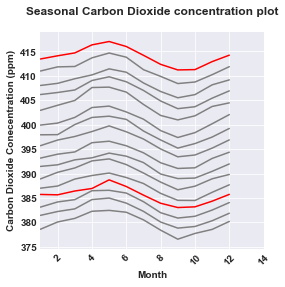

In [19]:
plot_seasonal_month = co2_conc.query('year >= 2005 and year < 2020 and year != 2008').groupby(['year','month']).mean()[['average']].reset_index()
plot_seasonal_month_2008_2020 = co2_conc.query('year == 2008 or year == 2020').groupby(['year','month']).mean()[['average']].reset_index()

fig, ax = plt.subplots(figsize = (4,4))

plt.style.use('seaborn-darkgrid')
#plt.style.use('ggplot')
ax1 = plot_seasonal_month.groupby('year').plot(x = 'month',y = 'average', marker = '', color = 'grey', ax = ax)
ax2 = plot_seasonal_month_2008_2020.groupby('year').plot(x = 'month',y = 'average', marker = '', color = 'red', ax = ax)

legend = plot_seasonal_month.groupby('year').mean().index
ax.legend('') #legend, loc='upper right')

plt.xlim(1,14)
plt.xticks(rotation = 45, fontsize = 10, weight = 'bold')
plt.yticks( fontsize = 10, weight = 'bold')
plt.xlabel("Month", fontsize = 10, weight = 'bold')
plt.ylabel("Carbon Dioxide Conecentration (ppm)", fontsize = 10, weight = 'bold')
plt.title("Seasonal Carbon Dioxide concentration plot", fontsize = 12, weight = 'bold', x = 0.5, y = 1.05)

#note for annotation
#for col in plot_seasonal_month.groupby('year').mean().index:
#    plt.annotate(col,xy=(plt.xticks()[0][-1]+0.7, plot_seasonal_month.groupby('year'))) #df_plot[col].iloc[-1]))

In [20]:
#Create Oil price to CO2 concentration tables by joining data

oil_co2_df = oil_price.join(co2_conc_edited)
oil_co2_df.head()

,Weekindex,Date,Year,Month,Week,Day,Par_Month,Par_Day,oil_spot_WTI,oil_spot_Brent,...,Date_edited,year,month,day,decimal,average,ndays,1_year_ago,10_years_ago,increase_since_1800
Par_Week,,,,,,,,,,,,,,,,,,,,,
19910205,266,2/1/1991,1991,2,5,1,199102,19910901,21.33,20.80,...,1991-02-01,1991.0,2.0,3.0,1991.0918,355.23,7.0,354.95,340.03,74.73
19910206,267,2/8/1991,1991,2,6,8,199102,19910908,21.78,20.65,...,1991-02-08,1991.0,2.0,10.0,1991.1110,355.79,6.0,355.09,340.74,75.12
19910207,268,2/15/1991,1991,2,7,15,199102,19910915,20.73,18.35,...,1991-02-15,1991.0,2.0,17.0,1991.1301,356.44,6.0,355.30,340.20,75.61
19910208,269,2/22/1991,1991,2,8,22,199102,19910922,17.43,17.80,...,1991-02-22,1991.0,2.0,24.0,1991.1493,355.73,7.0,355.02,341.52,74.72
19910309,270,3/1/1991,1991,3,9,1,199103,19910901,19.43,19.33,...,1991-03-01,1991.0,3.0,3.0,1991.1685,357.08,6.0,355.76,341.15,75.87


In [21]:
#check duplicate
oil_co2_df[oil_co2_df.Weekindex.duplicated()]

,Weekindex,Date,Year,Month,Week,Day,Par_Month,Par_Day,oil_spot_WTI,oil_spot_Brent,...,Date_edited,year,month,day,decimal,average,ndays,1_year_ago,10_years_ago,increase_since_1800
Par_Week,,,,,,,,,,,,,,,,,,,,,


# PACF work

In [22]:
#Using Augtolag = AIC
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries) #, regression='ct')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [23]:
#oil_co2_df['chg_gasoline_price'] = np.log(oil_co2_df.chg_Gasoline_price_US.shift(0)) - np.log(oil_co2_df.	chg_Gasoline_price_US.shift(1))
co2_conc_edited['chg_co2_conc'] = np.log(co2_conc_edited.average.shift(0)) - np.log(co2_conc_edited.average.shift(1))
co2_conc_edited = co2_conc_edited.dropna()

Text(0.5, 1.0, 'Weekly CO2_PACF')

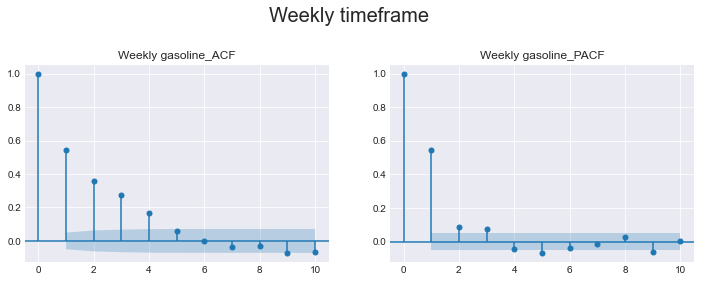

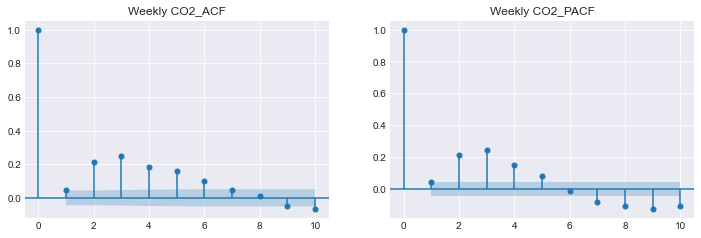

In [24]:
# Par week
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA


fig = plt.figure(figsize=(12,8))
fig.suptitle('Weekly timeframe', size = 20)
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(oil_price.chg_Gasoline_price_US, lags=10, ax=ax1)
ax1.set_title('Weekly gasoline_ACF')

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(oil_price.chg_Gasoline_price_US, lags=10, ax=ax2)
ax2.set_title('Weekly gasoline_PACF')

fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(co2_conc_edited['chg_co2_conc'], lags=10, ax=ax3)
ax3.set_title('Weekly CO2_ACF')

ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(co2_conc_edited['chg_co2_conc'], lags=10, ax=ax4)
ax4.set_title('Weekly CO2_PACF')

Text(0.5, 1.0, 'Weekly CO2 ACF Squared')

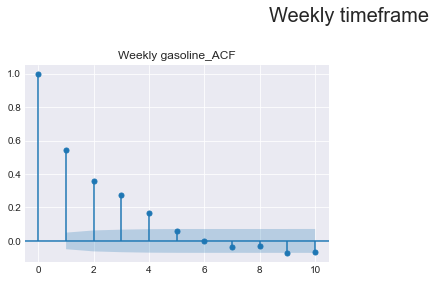

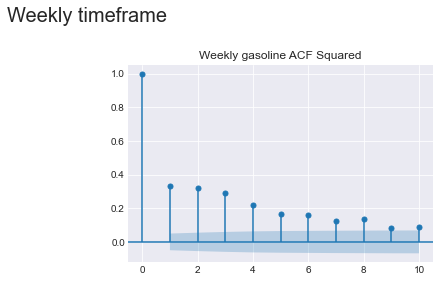

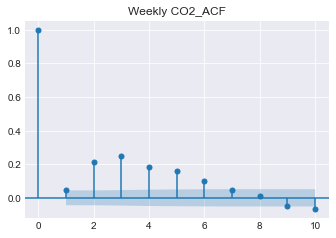

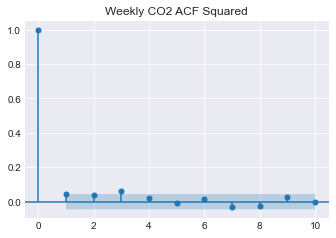

In [25]:
#In papaer
# Par week
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA


fig = plt.figure(figsize=(12,8))
fig.suptitle('Weekly timeframe', size = 20)
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(oil_price.chg_Gasoline_price_US, lags=10, ax=ax1)
ax1.set_title('Weekly gasoline_ACF')

fig = plt.figure(figsize=(12,8))
fig.suptitle('Weekly timeframe', size = 20)
ax1 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_acf(np.power(oil_price.chg_Gasoline_price_US,2), lags=10, ax=ax1)
ax1.set_title('Weekly gasoline ACF Squared')

fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(co2_conc_edited['chg_co2_conc'], lags=10, ax=ax3)
ax3.set_title('Weekly CO2_ACF')

fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_acf(np.power(co2_conc_edited['chg_co2_conc'],2), lags=10, ax=ax3)
ax3.set_title('Weekly CO2 ACF Squared')



Text(0.5, 1.0, 'Weekly CO2 PACF Squared')

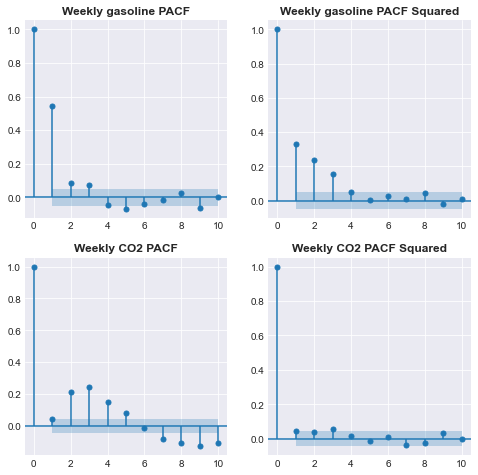

In [26]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_pacf(oil_price.chg_Gasoline_price_US, lags=10, ax=ax1)
ax1.set_title('Weekly gasoline PACF', fontsize = 12, weight = 'bold')

ax1 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(np.power(oil_price.chg_Gasoline_price_US,2), lags=10, ax=ax1)
ax1.set_title('Weekly gasoline PACF Squared', fontsize = 12, weight = 'bold')

ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_pacf(co2_conc_edited['chg_co2_conc'], lags=10, ax=ax3)
ax3.set_title('Weekly CO2 PACF', fontsize = 12, weight = 'bold')

ax3 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(np.power(co2_conc_edited['chg_co2_conc'],2), lags=10, ax=ax3)
ax3.set_title('Weekly CO2 PACF Squared', fontsize = 12, weight = 'bold')

In [27]:
print('Weekly CO2')
print(adf_test(co2_conc_edited['average']))
#print(' ')
#print(kpss_test(co2_conc_edited['average']))

Weekly CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                    0.828954
p-value                           0.992089
#Lags Used                       26.000000
Number of Observations Used    1961.000000
Critical Value (1%)              -3.433689
Critical Value (5%)              -2.863015
Critical Value (10%)             -2.567555
dtype: float64
None


In [28]:
print('Weekly Gasoline Price')
print(adf_test(oil_price.Gasoline_Price_US))

Weekly Gasoline Price
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -1.943291
p-value                           0.311978
#Lags Used                       19.000000
Number of Observations Used    1546.000000
Critical Value (1%)              -3.434587
Critical Value (5%)              -2.863411
Critical Value (10%)             -2.567766
dtype: float64
None


In [29]:
print('Weekly First diff gasoline price')
print(adf_test(oil_price.chg_Gasoline_price_US))

Weekly First diff gasoline price
Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.667975e+00
p-value                        1.299724e-16
#Lags Used                     2.200000e+01
Number of Observations Used    1.543000e+03
Critical Value (1%)           -3.434595e+00
Critical Value (5%)           -2.863415e+00
Critical Value (10%)          -2.567768e+00
dtype: float64
None


In [30]:
Par_month = []
for i in range(len(co2_conc)):
    if int(co2_conc.loc[i].month) < 10:
        Par_month.append(str(int(co2_conc.loc[i].year)) + str(0) + str(int(co2_conc.loc[i].month)))
    else:
        Par_month.append(str(int(co2_conc.loc[i].year)) + str(int(co2_conc.loc[i].month)))
co2_conc['Par_month'] = Par_month
co2_conc_month = co2_conc.groupby('Par_month').last()
co2_conc_month = (np.log(co2_conc_month.average.shift(0)) - np.log(co2_conc_month.average.shift(1)))
co2_conc_month = co2_conc_month.dropna()

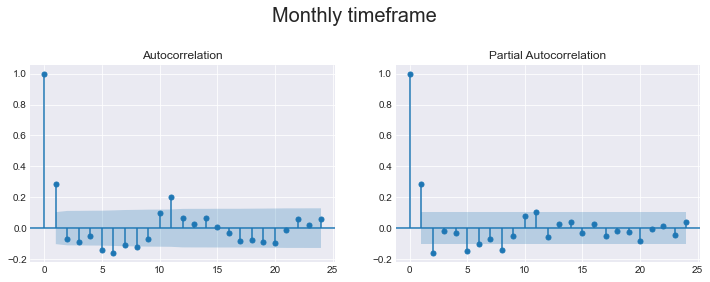

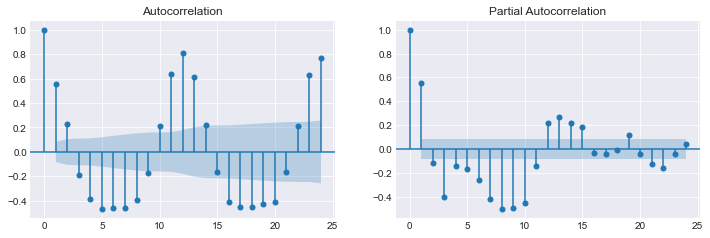

In [31]:
#Par Month
oil_co2_month = oil_price.groupby('Par_Month').last()
gasoline_month = np.log(oil_co2_month.Gasoline_Price_US.shift(0)) - np.log(oil_co2_month.Gasoline_Price_US.shift(1))
gasoline_month = gasoline_month.dropna()
co2_conc_month

# Par week
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA

fig = plt.figure(figsize=(12,8))
fig.suptitle('Monthly timeframe', size = 20)
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(gasoline_month, lags=24, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(gasoline_month, lags=24, ax=ax2)

fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(co2_conc_month, lags=24, ax=ax3)
ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(co2_conc_month, lags=24, ax=ax4)

In [32]:
print('Monthly CO2')
print(adf_test(co2_conc.groupby('Par_month').last()['average']))

Monthly CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                   3.086974
p-value                          1.000000
#Lags Used                      19.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64
None


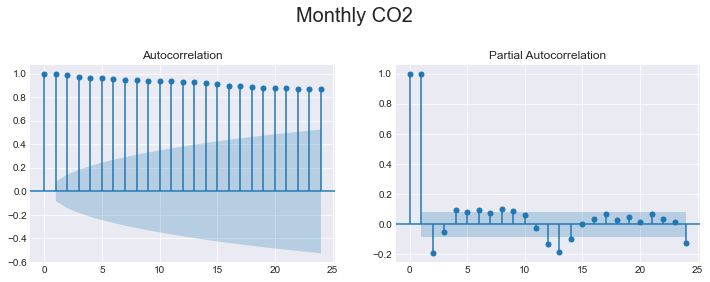

In [33]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Monthly CO2', size = 20)
data = co2_conc.groupby('Par_month').last()['average']
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(data, lags=24, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(data, lags=24, ax=ax2)

Monthly First diff CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -4.971689
p-value                          0.000025
#Lags Used                      18.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64
None


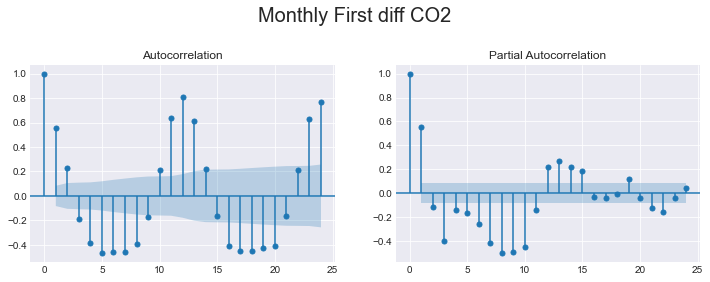

In [34]:
print('Monthly First diff CO2')
print(adf_test(co2_conc_month))

fig = plt.figure(figsize=(12,8))
fig.suptitle('Monthly First diff CO2', size = 20)
data = co2_conc_month
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(data, lags=24, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(data, lags=24, ax=ax2)

Monthly first diff CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.581761e+00
p-value                        2.149084e-16
#Lags Used                     1.400000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64
None


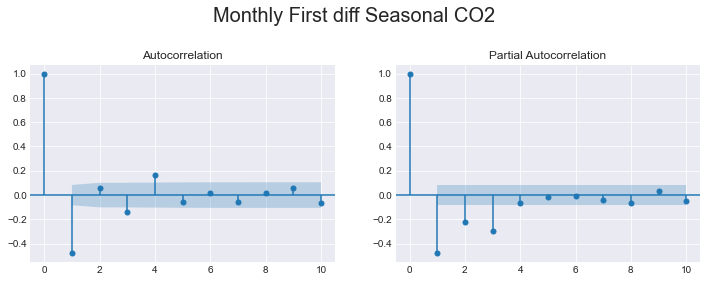

In [35]:
hia_month = (co2_conc_month - co2_conc_month.shift(12))
hia_month.dropna(inplace = True)
print('Monthly first diff CO2')
print(adf_test(hia_month))

fig = plt.figure(figsize=(12,8))
fig.suptitle('Monthly First diff Seasonal CO2', size = 20)
data = hia_month
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(data, lags=10, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(data, lags=10, ax=ax2)

In [36]:
print('Monthly gasoline')
print(adf_test(oil_co2_df.groupby('Par_Month').last().Gasoline_Price_US))

Monthly gasoline
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.434391
p-value                          0.565682
#Lags Used                       8.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64
None


In [37]:
hia_gas_month = (gasoline_month - gasoline_month.shift(12))
hia_gas_month.dropna(inplace = True)

print('Monthly first diff seasonal gasoline')
print(adf_test(hia_gas_month))


Monthly first diff seasonal gasoline
Results of Augmented Dickey-Fuller Test:
Test Statistic                -8.999468e+00
p-value                        6.557010e-15
#Lags Used                     1.100000e+01
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64
None


In [38]:
print('Monthly first diff gasoline')
print(adf_test(gasoline_month))

Monthly first diff gasoline
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.089950e+00
p-value                        1.042278e-07
#Lags Used                     1.000000e+01
Number of Observations Used    3.480000e+02
Critical Value (1%)           -3.449282e+00
Critical Value (5%)           -2.869881e+00
Critical Value (10%)          -2.571214e+00
dtype: float64
None


In [39]:
Par_quarter = []
error = []
for i in range(len(co2_conc)):
    if (int(co2_conc.loc[i].month) >= 10 and int(co2_conc.loc[i].month) <= 12):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(4))
    elif (int(co2_conc.loc[i].month) > 0 and int(co2_conc.loc[i].month) <= 3):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(1))
    elif (int(co2_conc.loc[i].month) > 3 and int(co2_conc.loc[i].month) <= 6):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(2))
    elif (int(co2_conc.loc[i].month) > 6 & int(co2_conc.loc[i].month) <= 9):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(3))
    else:
        #print(co2_conc.loc[i])
        #error.append(co2_conc.loc[i])
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(999))
Par_quarter
co2_conc['Par_quarter'] = Par_quarter
co2_conc_quarter = co2_conc.groupby('Par_quarter').last()
#co2_conc_quarter
co2_conc_quarter = (np.log(co2_conc_quarter.average.shift(0)) - np.log(co2_conc_quarter.average.shift(1)))
co2_conc_quarter = co2_conc_quarter.dropna()


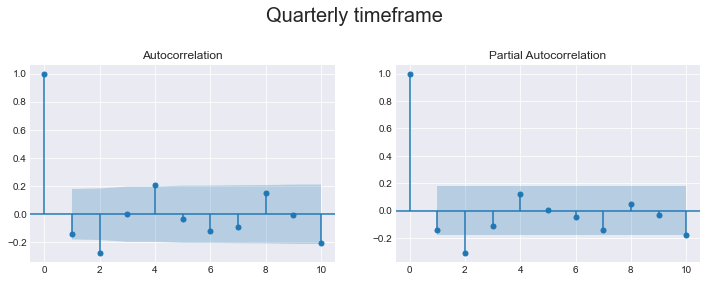

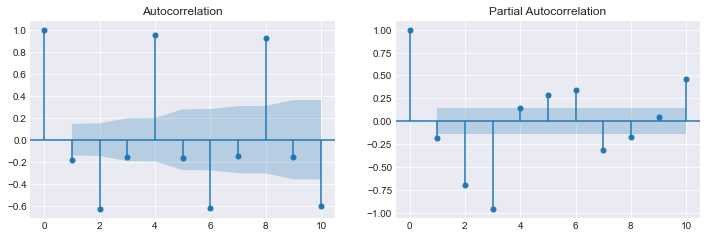

In [40]:
#Par Quarter

oil_co2_quarter_df = oil_price.query('Month in [12,3,6,9]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
gas_quarter = oil_co2_quarter_df.groupby('Par_Month').Gasoline_Price_US.last()
gas_quarter = (np.log(gas_quarter.shift(0)) - np.log(gas_quarter.shift(1)))
gas_quarter = gas_quarter.dropna()

# Par week
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA

fig = plt.figure(figsize=(12,8))
fig.suptitle('Quarterly timeframe', size = 20)
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(gas_quarter, lags=10, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(gas_quarter, lags=10, ax=ax2)

fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(co2_conc_quarter, lags=10, ax=ax3)
ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(co2_conc_quarter, lags=10, ax=ax4)

In [41]:
print('Quarterly CO2')
print(adf_test(co2_conc.groupby('Par_quarter').last().average))

Quarterly CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                   2.832219
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64
None


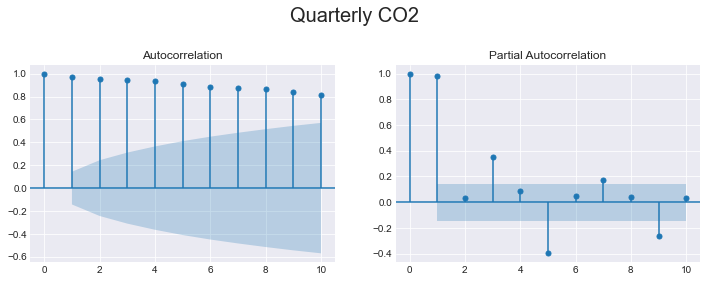

In [42]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Quarterly CO2', size = 20)
data = co2_conc.groupby('Par_quarter').last().average
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(data, lags=10, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(data, lags=10, ax=ax2)

In [43]:
print('Quarterly First diff CO2')
print(adf_test(co2_conc_quarter))

Quarterly First diff CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.711680
p-value                          0.072039
#Lags Used                      15.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64
None


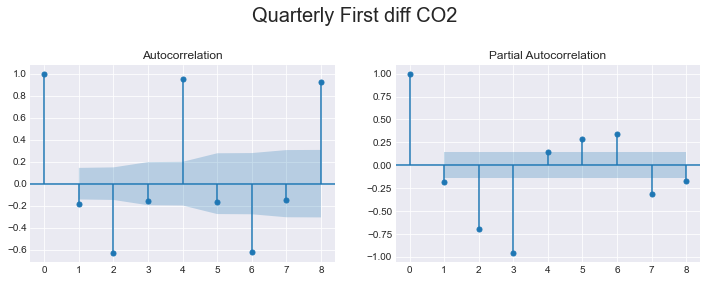

In [44]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Quarterly First diff CO2', size = 20)
data = co2_conc_quarter
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(data, lags=8, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(data, lags=8, ax=ax2)

Quarterly First diff seasonal CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.544822e+00
p-value                        9.154909e-09
#Lags Used                     1.100000e+01
Number of Observations Used    1.710000e+02
Critical Value (1%)           -3.469181e+00
Critical Value (5%)           -2.878595e+00
Critical Value (10%)          -2.575863e+00
dtype: float64
None


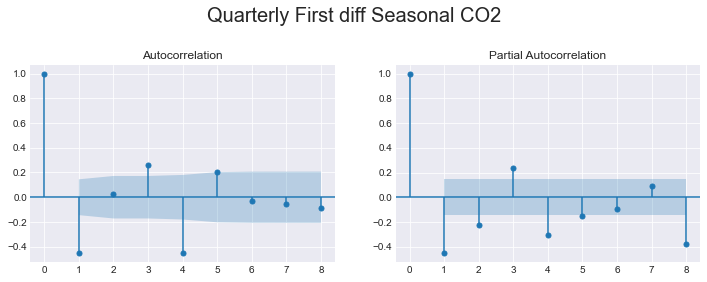

In [45]:
print('Quarterly First diff seasonal CO2')
hia_quarter = (co2_conc_quarter - co2_conc_quarter.shift(4))
hia_quarter.dropna(inplace = True)
print(adf_test(hia_quarter))

fig = plt.figure(figsize=(12,8))
fig.suptitle('Quarterly First diff Seasonal CO2', size = 20)
data = hia_quarter
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(data, lags=8, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(data, lags=8, ax=ax2)

Text(0.5, 1.0, 'Autocorrelation - Quarterly First Diff CO2')

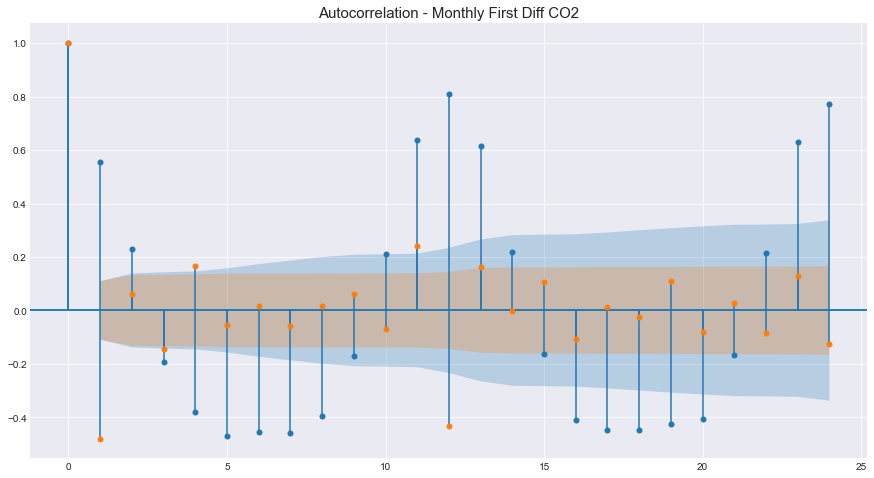

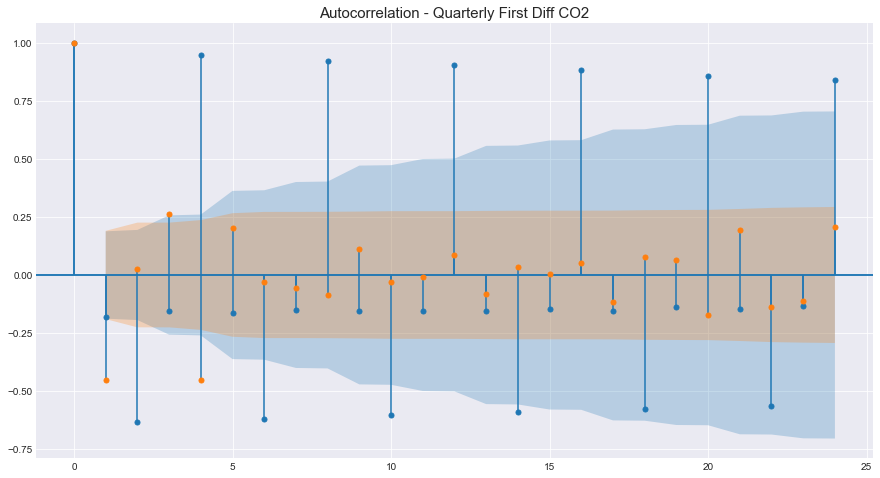

In [46]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Monthly First diff CO2', size = 20)
#data = co2_conc_month

ax1 = fig.add_subplot(111)
fig1 = sm.graphics.tsa.plot_acf(co2_conc_month, lags=24, ax=ax1, alpha=.01)
#ax1 = fig.add_subplot(121)
fig1 = sm.graphics.tsa.plot_acf(hia_month, lags=24, ax=ax1, alpha=.01)
ax1.set_title('Autocorrelation - Monthly First Diff CO2', fontsize = 15)
#ax1.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

fig2 = plt.figure(figsize=(15,8))
ax1 = fig2.add_subplot(111)
fig2 = sm.graphics.tsa.plot_acf(co2_conc_quarter, lags=24, ax=ax1, alpha=.01)
#ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(hia_quarter, lags=24, ax=ax1, alpha=.01)
ax1.set_title('Autocorrelation - Quarterly First Diff CO2', fontsize = 15)

Text(0.5, 1.0, '')

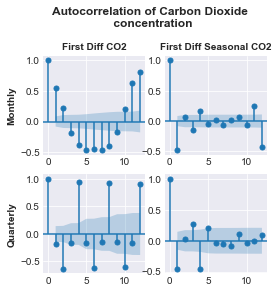

In [47]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(4,4))
fig.suptitle('Autocorrelation of Carbon Dioxide \n concentration', size = 12, x= 0.5, y= 1.05, weight = 'bold')


ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(co2_conc_month, lags=12, ax=ax1)
ax1.set_title('First Diff CO2', fontsize = 10, weight = 'bold')
ax1.set_ylabel('Monthly', fontsize = 10, weight = 'bold')

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_acf(hia_month, lags=12, ax=ax2)
ax2.set_title('First Diff Seasonal CO2', fontsize = 10, weight = 'bold')

#fig = plt.figure(figsize=(4,4))
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(co2_conc_quarter, lags=12, ax=ax3)
ax3.set_title('') #'First Diff CO2', fontsize = 10)
ax3.set_ylabel('Quarterly', fontsize = 10, weight = 'bold')


ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_acf(hia_quarter, lags=12, ax=ax4)
ax4.set_title('', fontsize = 10, weight = 'bold')
ax4.set_title('') #'First Diff Seasonal CO2', fontsize = 10)


In [48]:
print('Quarterly Gasoline price')
print(adf_test(oil_co2_quarter_df.groupby('Par_Month').Gasoline_Price_US.last()))

Quarterly Gasoline price
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.421096
p-value                          0.572122
#Lags Used                       3.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64
None


In [49]:
print('Quarterly first diff Gasoline price')
print(adf_test(gas_quarter))

Quarterly first diff Gasoline price
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.105110e+01
p-value                        5.077577e-20
#Lags Used                     1.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64
None


In [50]:
hia_gas_quarter = (gas_quarter - gas_quarter.shift(4))
hia_gas_quarter.dropna(inplace = True)

print('Quarterly first diff seasonal gasoline')
print(adf_test(hia_gas_quarter))


Quarterly first diff seasonal gasoline
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -4.707960
p-value                          0.000081
#Lags Used                      11.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64
None


In [51]:
#co2_conc_quarter
Par_quarter = []
error = []
for i in range(len(co2_conc)):
    if (int(co2_conc.loc[i].month) >= 10 and int(co2_conc.loc[i].month) <= 12):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(4))
    elif (int(co2_conc.loc[i].month) > 0 and int(co2_conc.loc[i].month) <= 3):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(1))
    elif (int(co2_conc.loc[i].month) > 3 and int(co2_conc.loc[i].month) <= 6):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(2))
    elif (int(co2_conc.loc[i].month) >= 6 & int(co2_conc.loc[i].month) <= 9):
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(3))
    else:
        #print(co2_conc.loc[i])
        #error.append(co2_conc.loc[i])
        Par_quarter.append(str(int(co2_conc.loc[i].year)) + str(0) + str(999))
Par_quarter
co2_conc['Par_quarter'] = Par_quarter
co2_conc_quarter = co2_conc.groupby('Par_quarter').last()

co2_conc_quarter_no_dif = co2_conc_quarter.average #(np.log(co2_conc_quarter.average.shift(0)) - np.log(co2_conc_quarter.average.shift(1)))
co2_conc_quarter_second_df = (np.log(co2_conc_quarter.average.shift(0)) - np.log(co2_conc_quarter.average.shift(1)))
co2_conc_quarter_second_df = co2_conc_quarter_second_df.shift(0) - co2_conc_quarter_second_df.shift(1)
co2_conc_quarter_second_df  = co2_conc_quarter_second_df.dropna()


In [52]:
print('Quarterly second diff seasonal CO2')
print(adf_test(co2_conc_quarter_no_dif))

Quarterly second diff seasonal CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                   2.832219
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64
None


In [53]:
print('Quarterly second diff seasonal CO2')
print(adf_test(co2_conc_quarter_second_df))

Quarterly second diff seasonal CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.502190e+00
p-value                        1.154455e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.710000e+02
Critical Value (1%)           -3.469181e+00
Critical Value (5%)           -2.878595e+00
Critical Value (10%)          -2.575863e+00
dtype: float64
None


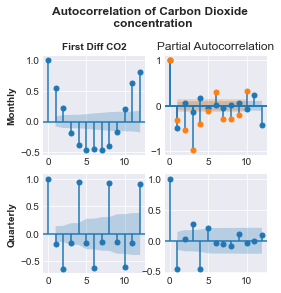

In [54]:
sm.graphics.tsa.plot_pacf(co2_conc_quarter_second_df, lags=10, ax=ax2)

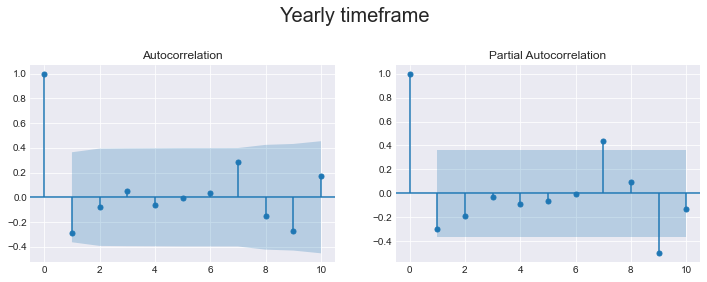

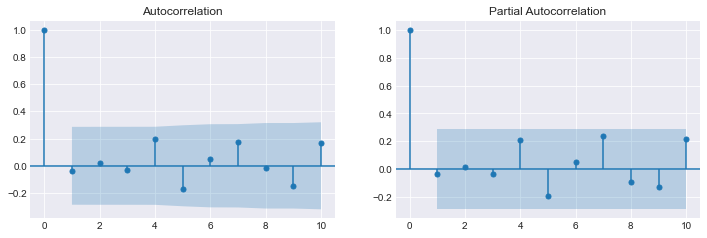

In [55]:
#Par year

oil_co2_year_df = oil_price.query('Month in [12]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
gas_year = oil_co2_year_df.groupby('Year').Gasoline_Price_US.last()
gas_year = (np.log(gas_year.shift(0)) - np.log(gas_year.shift(1)))
gas_year = gas_year.dropna()

co2_conc_year = co2_conc.groupby('year').last()
#co2_conc_quarter
co2_conc_year = (np.log(co2_conc_year.average.shift(0)) - np.log(co2_conc_year.average.shift(1)))
co2_conc_year = co2_conc_year.dropna()

# Par week
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA

fig = plt.figure(figsize=(12,8))
fig.suptitle('Yearly timeframe', size = 20)
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(gas_year, lags=10, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(gas_year, lags=10, ax=ax2)

fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(co2_conc_year, lags=10, ax=ax3)
ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(co2_conc_year, lags=10, ax=ax4)

In [56]:
print('Yearly CO2')
print(adf_test(co2_conc.groupby('year').last().average))

Yearly CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                  2.904423
p-value                         1.000000
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64
None


In [57]:
print('Yearly first diff CO2')
print(adf_test(co2_conc_year))

Yearly first diff CO2
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.565117e+00
p-value                        8.195750e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.600000e+01
Critical Value (1%)           -3.581258e+00
Critical Value (5%)           -2.926785e+00
Critical Value (10%)          -2.601541e+00
dtype: float64
None


In [58]:
print('Yearly Gasoline price')
print(adf_test(oil_co2_year_df.groupby('Year').Gasoline_Price_US.last()))

Yearly Gasoline price
Results of Augmented Dickey-Fuller Test:
Test Statistic                 -1.699785
p-value                         0.431223
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64
None


In [59]:
print('Yearly first diff Gasoline price')
print(adf_test(gas_year))

Yearly first diff Gasoline price
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.848557e+00
p-value                        1.717621e-09
#Lags Used                     0.000000e+00
Number of Observations Used    2.800000e+01
Critical Value (1%)           -3.688926e+00
Critical Value (5%)           -2.971989e+00
Critical Value (10%)          -2.625296e+00
dtype: float64
None


# 2.) Test Stationary - ADF & KPSS test <a name="2"></a>

In [60]:
#Using Augtolag = AIC

from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries) #, regression='ct')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

### 2.1 Oil price -- Stationary after first difference <a name="2.1"></a>

In [61]:
print(adf_test(oil_price['oil_spot_WTI']))
print(' ')
print(kpss_test(oil_price['oil_spot_WTI']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -2.374022
p-value                           0.149203
#Lags Used                       10.000000
Number of Observations Used    1555.000000
Critical Value (1%)              -3.434562
Critical Value (5%)              -2.863400
Critical Value (10%)             -2.567760
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            3.585767
p-value                   0.010000
Lags Used                24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [62]:
#Crude oil WTI_weekly
first_dif_conc = (np.log(oil_price['oil_spot_WTI'].shift(0)) - np.log(oil_price['oil_spot_WTI'].shift(1))).dropna()
print(adf_test(first_dif_conc))
print(' ')
print(kpss_test(first_dif_conc))

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.210854e+01
p-value                        1.943428e-22
#Lags Used                     1.100000e+01
Number of Observations Used    1.553000e+03
Critical Value (1%)           -3.434568e+00
Critical Value (5%)           -2.863403e+00
Critical Value (10%)          -2.567762e+00
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.060097
p-value                   0.100000
Lags Used                24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [63]:
#Crude oil WTI Month
oil_co2_month = oil_price.groupby('Par_Month')['oil_spot_WTI'].last()

print("Crude oil WTI Month")
print(adf_test(oil_co2_month))

oil_month = np.log(oil_co2_month.shift(0)) - np.log(oil_co2_month.shift(1))
oil_month = oil_month.dropna()
print("First Diff Crude oil WTI Month")
print(adf_test(oil_month))

oil_month = oil_month - oil_month.shift(12)
oil_month = oil_month.dropna()
print("First Diff Seasonal Crude oil WTI Month")
print(adf_test(oil_month))

#Crude oil WTI Quarter

function = oil_price.query('Month in [12,3,6,9]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
function = function.groupby('Par_Month')['oil_spot_WTI'].last()



print("Crude oil WTI Quarter")
print(adf_test(function))

function_2 = np.log(function.shift(0)) - np.log(function.shift(1))
function_2 = function_2.dropna()
print("First Diff Crude oil WTI Quarter")
print(adf_test(function_2))

function_3 = function_2 - function_2.shift(4)
function_3 = function_3.dropna()
print("First Diff Seasonal Crude oil WTI Quarter")
print(adf_test(function_3))

Crude oil WTI Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.702509
p-value                          0.429820
#Lags Used                      12.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64
None
First Diff Crude oil WTI Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.406313e+01
p-value                        3.031498e-26
#Lags Used                     1.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64
None
First Diff Seasonal Crude oil WTI Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.904563e+00
p-value                        1.256887e-09
#Lags Used                     1.300000e+01
Number of Ob

In [64]:
#Crude oil WTI Month
#Change this line and title
index = 'oil_spot_Brent'
oil_co2_month = oil_price.groupby('Par_Month')[index].last()

print("Crude oil Brent Month")
print(adf_test(oil_co2_month))

oil_month = np.log(oil_co2_month.shift(0)) - np.log(oil_co2_month.shift(1))
oil_month = oil_month.dropna()
print("First Diff Crude oil Brent Month")
print(adf_test(oil_month))

oil_month = oil_month - oil_month.shift(12)
oil_month = oil_month.dropna()
print("First Diff Seasonal Crude oil WTI Month")
print(adf_test(oil_month))

#Crude oil WTI Quarter

function = oil_price.query('Month in [12,3,6,9]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
function = function.groupby('Par_Month')[index].last()



print("Crude oil Brent Quarter")
print(adf_test(function))

function_2 = np.log(function.shift(0)) - np.log(function.shift(1))
function_2 = function_2.dropna()
print("First Diff Crude oil Brent Quarter")
print(adf_test(function_2))

function_3 = function_2 - function_2.shift(4)
function_3 = function_3.dropna()
print("First Diff Seasonal Crude oil Brent Quarter")
print(adf_test(function_3))

Crude oil Brent Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.144924
p-value                          0.226838
#Lags Used                       1.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
None
First Diff Crude oil Brent Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.779196e+01
p-value                        3.244454e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.580000e+02
Critical Value (1%)           -3.448749e+00
Critical Value (5%)           -2.869647e+00
Critical Value (10%)          -2.571089e+00
dtype: float64
None
First Diff Seasonal Crude oil WTI Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -8.269647e+00
p-value                        4.831940e-13
#Lags Used                     1.200000e+01
Number o

In [65]:
print(adf_test(oil_price['future_oil_contract_1']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -2.360710
p-value                           0.153134
#Lags Used                       10.000000
Number of Observations Used    1555.000000
Critical Value (1%)              -3.434562
Critical Value (5%)              -2.863400
Critical Value (10%)             -2.567760
dtype: float64
None


In [66]:
first_dif_conc = (np.log(oil_price['future_oil_contract_1'].shift(0)) - np.log(oil_price['future_oil_contract_1'].shift(1))).dropna()
print(adf_test(first_dif_conc))

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.090610e+01
p-value                        1.127165e-19
#Lags Used                     1.300000e+01
Number of Observations Used    1.551000e+03
Critical Value (1%)           -3.434573e+00
Critical Value (5%)           -2.863405e+00
Critical Value (10%)          -2.567763e+00
dtype: float64
None


In [67]:
#Crude oil WTI Month
#Change this line and title
index = 'future_oil_contract_1'
oil_co2_month = oil_price.groupby('Par_Month')[index].last()

print(index +" Month")
print(adf_test(oil_co2_month))

oil_month = np.log(oil_co2_month.shift(0)) - np.log(oil_co2_month.shift(1))
oil_month = oil_month.dropna()
print("First Diff " + index + " Month")
print(adf_test(oil_month))

oil_month = oil_month - oil_month.shift(12)
oil_month = oil_month.dropna()
print("First Diff Seasonal "+index+" Month")
print(adf_test(oil_month))

#Crude oil WTI Quarter

function = oil_price.query('Month in [12,3,6,9]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
function = function.groupby('Par_Month')[index].last()



print(index + " Quarter")
print(adf_test(function))

function_2 = np.log(function.shift(0)) - np.log(function.shift(1))
function_2 = function_2.dropna()
print("First Diff "+index+" Quarter")
print(adf_test(function_2))

function_3 = function_2 - function_2.shift(4)
function_3 = function_3.dropna()
print("First Diff Seasonal "+index +" Quarter")
print(adf_test(function_3))

future_oil_contract_1 Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.686470
p-value                          0.438096
#Lags Used                      12.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64
None
First Diff future_oil_contract_1 Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.727792e+01
p-value                        5.806193e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.580000e+02
Critical Value (1%)           -3.448749e+00
Critical Value (5%)           -2.869647e+00
Critical Value (10%)          -2.571089e+00
dtype: float64
None
First Diff Seasonal future_oil_contract_1 Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.940285e+00
p-value                        1.029301e-09
#Lags Used                     1

In [68]:
print(adf_test(oil_price['sugar_price_us']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -2.568984
p-value                           0.099578
#Lags Used                       11.000000
Number of Observations Used    1554.000000
Critical Value (1%)              -3.434565
Critical Value (5%)              -2.863402
Critical Value (10%)             -2.567761
dtype: float64
None


In [69]:
#Sugar price week
first_dif_conc = (np.log(oil_price['sugar_price_us'].shift(0)) - np.log(oil_price['sugar_price_us'].shift(1))).dropna()
print(adf_test(first_dif_conc))

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -21.905431
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1562.000000
Critical Value (1%)              -3.434543
Critical Value (5%)              -2.863392
Critical Value (10%)             -2.567756
dtype: float64
None


In [70]:
#Crude oil WTI Month
#Change this line and title
index = 'sugar_price_us'
oil_co2_month = oil_price.groupby('Par_Month')[index].last()

print(index +" Month")
print(adf_test(oil_co2_month))

oil_month = np.log(oil_co2_month.shift(0)) - np.log(oil_co2_month.shift(1))
oil_month = oil_month.dropna()
print("First Diff " + index + " Month")
print(adf_test(oil_month))

oil_month = oil_month - oil_month.shift(12)
oil_month = oil_month.dropna()
print("First Diff "+index+" Month")
print(adf_test(oil_month))

#Crude oil WTI Quarter

function = oil_price.query('Month in [12,3,6,9]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
function = function.groupby('Par_Month')[index].last()



print(index + " Quarter")
print(adf_test(function))

function_2 = np.log(function.shift(0)) - np.log(function.shift(1))
function_2 = function_2.dropna()
print("First Diff "+index+" Quarter")
print(adf_test(function_2))

function_3 = function_2 - function_2.shift(4)
function_3 = function_3.dropna()
print("First Diff Seasonal "+index +" Quarter")
print(adf_test(function_3))

sugar_price_us Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.002643
p-value                          0.285415
#Lags Used                      11.000000
Number of Observations Used    348.000000
Critical Value (1%)             -3.449282
Critical Value (5%)             -2.869881
Critical Value (10%)            -2.571214
dtype: float64
None
First Diff sugar_price_us Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.595694e+01
p-value                        7.250537e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.580000e+02
Critical Value (1%)           -3.448749e+00
Critical Value (5%)           -2.869647e+00
Critical Value (10%)          -2.571089e+00
dtype: float64
None
First Diff sugar_price_us Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.566867e+00
p-value                        2.344389e-16
#Lags Used                     1.100000e+01
Number of Observat

In [71]:
#Sugar price month
oil_co2_month = oil_co2_df.groupby('Par_Month').last()
sugar_month = np.log(oil_co2_month.sugar_price_us.shift(0)) - np.log(oil_co2_month.sugar_price_us.shift(1))
gasoline_month = gasoline_month.dropna()

In [72]:
print(adf_test(oil_price['ethanol_price_us'].dropna()))

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.260984
p-value                          0.016715
#Lags Used                       1.000000
Number of Observations Used    823.000000
Critical Value (1%)             -3.438321
Critical Value (5%)             -2.865058
Critical Value (10%)            -2.568643
dtype: float64
None


In [73]:
first_dif_conc = (np.log(oil_price['ethanol_price_us'].dropna().shift(0)) - np.log(oil_price['ethanol_price_us'].dropna().shift(1))).dropna()
print(adf_test(first_dif_conc))

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -27.800636
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    823.000000
Critical Value (1%)             -3.438321
Critical Value (5%)             -2.865058
Critical Value (10%)            -2.568643
dtype: float64
None


In [74]:
#Crude oil WTI Month
#Change this line and title
index = 'ethanol_price_us'
oil_co2_month = oil_price.groupby('Par_Month')[index].last()
oil_co2_month.dropna(inplace = True)

print(index +" Month")
print(adf_test(oil_co2_month))

oil_month = np.log(oil_co2_month.shift(0)) - np.log(oil_co2_month.shift(1))
oil_month = oil_month.dropna()
print("First Diff " + index + " Month")
print(adf_test(oil_month))

oil_month = oil_month - oil_month.shift(12)
oil_month = oil_month.dropna()
print("First Diff "+index+" Month")
print(adf_test(oil_month))

#Crude oil WTI Quarter

function = oil_price.query('Month in [12,3,6,9]') #.groupby(['Year','Month']).chg_Gasoline_price_US.last()
function = function.groupby('Par_Month')[index].last()
function.dropna(inplace = True)

print(index + " Quarter")
print(adf_test(function))

function_2 = np.log(function.shift(0)) - np.log(function.shift(1))
function_2 = function_2.dropna()
print("First Diff "+index+" Quarter")
print(adf_test(function_2))

function_3 = function_2 - function_2.shift(4)
function_3 = function_3.dropna()
print("First Diff Seasonal "+index +" Quarter")
print(adf_test(function_3))

ethanol_price_us Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.129073
p-value                          0.024475
#Lags Used                       1.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64
None
First Diff ethanol_price_us Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.395732e+01
p-value                        4.586363e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.880000e+02
Critical Value (1%)           -3.465620e+00
Critical Value (5%)           -2.877040e+00
Critical Value (10%)          -2.575032e+00
dtype: float64
None
First Diff ethanol_price_us Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.452678e+00
p-value                        1.509847e-08
#Lags Used                     1.200000e+01
Number of Ob

### 2.2 GDP -- Stationary after first difference <a name="2.2"></a>

In [75]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [76]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(gdp_df['gdp_us']))
print(' ')
print(kpss_test(gdp_df['gdp_us']))

print(color.BOLD +'GDP_China' + color.END)
print(adf_test(gdp_df['gdp_china']))
print(' ')
print(kpss_test(gdp_df['gdp_china']))

print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(gdp_df['gdp_europe']))
print(' ')
print(kpss_test(gdp_df['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                  1.495677
p-value                         0.997508
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.880981
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                  0.998199
p-value                         0.994247
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64
Non

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [77]:
first_dif_gdp = (np.log(gdp_df[['gdp_us','gdp_china','gdp_europe']].shift(0)) - np.log(gdp_df[['gdp_us','gdp_china','gdp_europe']].shift(1))).dropna()

In [78]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(first_dif_gdp['gdp_us']))
print(' ')
print(kpss_test(first_dif_gdp['gdp_us']))

print(color.BOLD +'GDP_China' + color.END)
print(adf_test(first_dif_gdp['gdp_china']))
print(' ')
print(kpss_test(first_dif_gdp['gdp_china']))

print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(first_dif_gdp['gdp_europe']))
print(' ')
print(kpss_test(first_dif_gdp['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.058266
p-value                         0.001134
#Lags Used                      1.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.25672
p-value                   0.10000
Lags Used                12.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.963546
p-value                         0.038442
#Lags Used                      4.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64
None
 
Res

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [79]:
(first_dif_gdp.shift(0)) - first_dif_gdp.shift(4)

,gdp_us,gdp_china,gdp_europe
Par_Month,,,
199504,NaN,NaN,NaN
199507,NaN,NaN,NaN
199510,NaN,NaN,NaN
199601,NaN,NaN,NaN
199604,0.012901,-0.028818,0.010418
...,...,...,...
201810,-0.008189,-0.004386,-0.002861
201901,-0.005367,-0.005715,0.006238
201904,-0.005109,-0.012740,-0.002534


In [80]:
#First diff seasonal GDP

first_dif_seasonal_gdp = (first_dif_gdp.shift(0)) - first_dif_gdp.shift(4)
first_dif_seasonal_gdp.dropna(inplace = True)

print(color.BOLD +'GDP_US' + color.END)
print(adf_test(first_dif_seasonal_gdp['gdp_us']))
print(' ')
print(kpss_test(first_dif_seasonal_gdp['gdp_us']))

print(color.BOLD +'GDP_China' + color.END)
print(adf_test(first_dif_seasonal_gdp['gdp_china']))
print(' ')
print(kpss_test(first_dif_seasonal_gdp['gdp_china']))

print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(first_dif_seasonal_gdp['gdp_europe']))
print(' ')
print(kpss_test(first_dif_seasonal_gdp['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.875271
p-value                         0.048300
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.057557
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                 -5.221257
p-value                         0.000008
#Lags Used                      6.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64
Non

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [81]:
#GDP weekly
#oil_price.join

In [82]:
gdp_date_list = gdp_df.gdp_date.to_list()
year = []
month = []
quarter = []
weeknum = []
for i in range(len(gdp_date_list)):
    if int(datetime.datetime.strptime(gdp_date_list[i],'%Y-%m-%d').strftime('%m')) == 1:
        y = int(datetime.datetime.strptime(gdp_date_list[i],'%Y-%m-%d').strftime('%Y'))-1
        m = int(12)
        d = int(4)
        year.append(y)
        month.append(m)
        quarter.append(d)
    else:
        y = int(datetime.datetime.strptime(gdp_date_list[i],'%Y-%m-%d').strftime('%Y'))
        m = int(datetime.datetime.strptime(gdp_date_list[i],'%Y-%m-%d').strftime('%m'))-1
        d = int(datetime.datetime.strptime(gdp_date_list[i],'%Y-%m-%d').strftime('%m'))//3
        year.append(y)
        month.append(m)
        quarter.append(d)
gdp_df['Year'] = year
gdp_df['Month'] = month
gdp_df['Quarter'] = quarter

In [83]:
gdp_df.head()

,gdp_date,gdp_us,gdp_china,gdp_europe,Year,Month,Quarter
Par_Month,,,,,,,
199501,1995-01-01,7522.289,1.211170e+12,1811683.8,1994,12,4
199504,1995-04-01,7580.997,1.461290e+12,1823657.0,1995,3,1
199507,1995-07-01,7683.125,1.616410e+12,1855373.1,1995,6,2
199510,1995-10-01,7772.586,1.845120e+12,1873811.6,1995,9,3
199601,1996-01-01,7868.468,1.462800e+12,1895898.1,1995,12,4


In [84]:
oil_price_month = oil_price['Month'].to_list()
quarter = []
for i in range(len(oil_price_month)):
    if oil_price_month[i] in [1,2,3]:
        #print(oil_price_month[i])
        quarter.append(1)
    elif oil_price_month[i] in [4,5,6]:
        quarter.append(2)
    elif oil_price_month[i] in [7,8,9]:
        quarter.append(3)
    elif oil_price_month[i] in [10,11,12]:
        quarter.append(4)
    else:
        quarter.append(oil_price_month[i])
        
oil_price['Quarter'] = quarter

In [85]:
test_stationary_gdp_weekly = pd.merge(oil_price, gdp_df, how="left", on=['Year','Quarter']).drop(columns = ['Month_y']).rename(columns = {'Month_x':'Month'}).set_index('Par_Month') #.to_csv('quick_look_gdp_week1.csv')

In [86]:
test_stationary_gdp_weekly = test_stationary_gdp_weekly.dropna(subset = ['gdp_date'])[['gdp_china','gdp_us','gdp_europe']]

In [87]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(test_stationary_gdp_weekly['gdp_us']))

print(color.BOLD +'GDP_China' + color.END)
print(adf_test(test_stationary_gdp_weekly['gdp_china']))

print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(test_stationary_gdp_weekly['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                    1.457719
p-value                           0.997361
#Lags Used                       14.000000
Number of Observations Used    1289.000000
Critical Value (1%)              -3.435433
Critical Value (5%)              -2.863785
Critical Value (10%)             -2.567965
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                    1.732468
p-value                           0.998205
#Lags Used                       14.000000
Number of Observations Used    1289.000000
Critical Value (1%)              -3.435433
Critical Value (5%)              -2.863785
Critical Value (10%)             -2.567965
dtype: float64
None
GDP_Europe
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -0.357654
p-value                           0.916933
#Lags Used                       14.000000
Number of Observations Used    1289.000000
Critical Value (1%)              -3

In [88]:
first_dif_gdp_weekly = (np.log(test_stationary_gdp_weekly[['gdp_us','gdp_china','gdp_europe']].shift(0)) - np.log(test_stationary_gdp_weekly[['gdp_us','gdp_china','gdp_europe']].shift(1))).dropna()

In [89]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(first_dif_gdp_weekly['gdp_us']))


print(color.BOLD +'GDP_China' + color.END)
print(adf_test(first_dif_gdp_weekly['gdp_china']))


print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(first_dif_gdp_weekly['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -5.571394
p-value                           0.000001
#Lags Used                       14.000000
Number of Observations Used    1288.000000
Critical Value (1%)              -3.435437
Critical Value (5%)              -2.863787
Critical Value (10%)             -2.567966
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.461636e+01
p-value                        3.948440e-27
#Lags Used                     1.300000e+01
Number of Observations Used    1.289000e+03
Critical Value (1%)           -3.435433e+00
Critical Value (5%)           -2.863785e+00
Critical Value (10%)          -2.567965e+00
dtype: float64
None
GDP_Europe
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -5.522921
p-value                           0.000002
#Lags Used                       13.000000
Number of Observations Used    1289.000000
Critical Value (1%)         

In [90]:
test_stationary_gdp_monthly = test_stationary_gdp_weekly.groupby('Par_Month').last()

In [91]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(test_stationary_gdp_monthly['gdp_us']))


print(color.BOLD +'GDP_China' + color.END)
print(adf_test(test_stationary_gdp_monthly['gdp_china']))


print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(test_stationary_gdp_monthly['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                   0.994661
p-value                          0.994209
#Lags Used                       9.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                   2.074122
p-value                          0.998762
#Lags Used                      15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64
None
GDP_Europe
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -0.369412
p-value                          0.915082
#Lags Used                       9.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Va

In [92]:
first_dif_gdp_monthly = (np.log(test_stationary_gdp_monthly[['gdp_us','gdp_china','gdp_europe']].shift(0)) - np.log(test_stationary_gdp_monthly[['gdp_us','gdp_china','gdp_europe']].shift(1))).dropna()
first_dif_gdp_monthly_seasonal = first_dif_gdp_monthly.shift(0) - first_dif_gdp_monthly.shift(12)
first_dif_gdp_monthly_seasonal.dropna(inplace = True)

In [93]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(first_dif_gdp_monthly['gdp_us']))


print(color.BOLD +'GDP_China' + color.END)
print(adf_test(first_dif_gdp_monthly['gdp_china']))


print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(first_dif_gdp_monthly['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.388407
p-value                          0.011360
#Lags Used                       8.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.891636
p-value                          0.046329
#Lags Used                      14.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64
None
GDP_Europe
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.650664
p-value                          0.004863
#Lags Used                       8.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Va

In [94]:
print(color.BOLD +'GDP_US' + color.END)
print(adf_test(first_dif_gdp_monthly_seasonal['gdp_us']))


print(color.BOLD +'GDP_China' + color.END)
print(adf_test(first_dif_gdp_monthly_seasonal['gdp_china']))


print(color.BOLD +'GDP_Europe' + color.END)
print(adf_test(first_dif_gdp_monthly_seasonal['gdp_europe']))

GDP_US
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.182351e+00
p-value                        6.409760e-08
#Lags Used                     1.100000e+01
Number of Observations Used    2.750000e+02
Critical Value (1%)           -3.454355e+00
Critical Value (5%)           -2.872108e+00
Critical Value (10%)          -2.572401e+00
dtype: float64
None
GDP_China
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.365718e+00
p-value                        2.412759e-08
#Lags Used                     2.000000e+00
Number of Observations Used    2.840000e+02
Critical Value (1%)           -3.453587e+00
Critical Value (5%)           -2.871771e+00
Critical Value (10%)          -2.572222e+00
dtype: float64
None
GDP_Europe
Results of Augmented Dickey-Fuller Test:
Test Statistic                -7.061512e+00
p-value                        5.209056e-10
#Lags Used                     1.100000e+01
Number of Observations Used    2.750000e+02
Critical Value (1

### 2.3 Global temperature -- Stationary after first diff ** Becareful of inf data <a name="2.3"></a>

In [95]:
print(adf_test(glob_temp['Celsius']))
print(' ')
print(kpss_test(glob_temp['Celsius']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.452425
p-value                          0.556901
#Lags Used                       9.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            3.363103
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [96]:
#Fix zero data
index_fix_data = glob_temp[glob_temp['Celsius'] == 0].index
for i in index_fix_data:
    glob_temp.loc[i] = glob_temp.loc[i-1].copy()

In [97]:
first_dif_temp = (np.log(glob_temp['Celsius'].shift(0)) - np.log(glob_temp['Celsius'].shift(1))).dropna()
first_dif_temp = first_dif_temp.to_frame()

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [98]:
print(adf_test(first_dif_temp['Celsius']))
print(' ')
print(kpss_test(first_dif_temp['Celsius']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.902735e+00
p-value                        3.324598e-17
#Lags Used                     1.700000e+01
Number of Observations Used    6.200000e+02
Critical Value (1%)           -3.440941e+00
Critical Value (5%)           -2.866213e+00
Critical Value (10%)          -2.569259e+00
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.024498
p-value                   0.100000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [99]:
#first_dif_temp.index
month_list = []
year_list = []
for i in glob_temp['Celsius'].index:
    month_list.append(str(i)[-2:])
    year_list.append(str(i)[:4])

glob_temp['Month'] = month_list
glob_temp['Year'] = year_list

In [100]:
#Global temp Month
#Change this line and title
index = 'Global temperature(Celsius)'


print(index +" Month")
print(adf_test(glob_temp['Celsius']))

glob_temp_month = np.log(glob_temp['Celsius'].shift(0)) - np.log(glob_temp['Celsius'].shift(1))
glob_temp_month = glob_temp_month.dropna()
print("First Diff " + index + " Month")
print(adf_test(glob_temp_month))

glob_temp_month = glob_temp_month - glob_temp_month.shift(12)
glob_temp_month = glob_temp_month.dropna()
print("First Diff seasonal"+index+" Month")
print(adf_test(glob_temp_month))

#Global temp Month

function = glob_temp.query('Month in ["12","03","06","09"]')['Celsius']
#function = function.groupby('Par_Month')[index].last()
function.dropna(inplace = True)

print(index + " Quarter")
print(adf_test(function))

function_2 = np.log(function.shift(0)) - np.log(function.shift(1))
function_2 = function_2.dropna()
print("First Diff "+index+" Quarter")
print(adf_test(function_2))

function_3 = function_2 - function_2.shift(4)
function_3 = function_3.dropna()
print("First Diff Seasonal "+index +" Quarter")
print(adf_test(function_3))


Global temperature(Celsius) Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.447402
p-value                          0.559352
#Lags Used                       9.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



None
First Diff Global temperature(Celsius) Month
Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.902735e+00
p-value                        3.324598e-17
#Lags Used                     1.700000e+01
Number of Observations Used    6.200000e+02
Critical Value (1%)           -3.440941e+00
Critical Value (5%)           -2.866213e+00
Critical Value (10%)          -2.569259e+00
dtype: float64
None
First Diff seasonalGlobal temperature(Celsius) Month
Results of Augmented Dickey-Fuller Test:


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Test Statistic                -1.140574e+01
p-value                        7.457383e-21
#Lags Used                     1.700000e+01
Number of Observations Used    6.080000e+02
Critical Value (1%)           -3.441151e+00
Critical Value (5%)           -2.866305e+00
Critical Value (10%)          -2.569308e+00
dtype: float64
None
Global temperature(Celsius) Quarter
Results of Augmented Dickey-Fuller Test:
Test Statistic                  -0.485741
p-value                          0.894769
#Lags Used                       7.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64
None
First Diff Global temperature(Celsius) Quarter
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.140355e+00
p-value                        7.999020e-08
#Lags Used                     1.500000e+01
Number of Observations Used    1.920000e+02
Critical Value (1

In [101]:
glob_temp.Month = glob_temp.Month.astype(int).to_list()
glob_temp.Year = glob_temp.Year.astype(int).to_list()

In [102]:
glob_temp_df = pd.merge(oil_price,glob_temp, how = 'left', on = ['Year','Month'])
glob_temp_df = glob_temp_df[['Celsius']].dropna()

In [103]:
#weekly test stationary
glob_temp_df_stationary = np.log(glob_temp_df) - np.log(glob_temp_df).shift(52)
glob_temp_df_stationary.dropna(inplace = True)

In [104]:
glob_temp_df_stationary

,Celsius
52,0.000000
53,-0.067441
54,-0.067441
55,-0.067441
56,0.177681
...,...
1557,-0.297252
1558,-0.297252
1559,-0.297252
1560,-0.297252


In [105]:
print(adf_test(glob_temp_df['Celsius'])) 
print(adf_test(glob_temp_df_stationary['Celsius']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -2.577654
p-value                           0.097704
#Lags Used                       13.000000
Number of Observations Used    1548.000000
Critical Value (1%)              -3.434581
Critical Value (5%)              -2.863409
Critical Value (10%)             -2.567765
dtype: float64
None
Results of Augmented Dickey-Fuller Test:
Test Statistic                -5.871372e+00
p-value                        3.234318e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.496000e+03
Critical Value (1%)           -3.434729e+00
Critical Value (5%)           -2.863474e+00
Critical Value (10%)          -2.567800e+00
dtype: float64
None


### 2.4 CO2 Emission --  Stationary after first diff <a name="2.4"></a>

In [106]:
print(adf_test(world_co2_em['World_Emission_general']))
print(' ')
print(kpss_test(world_co2_em['World_Emission_general']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                  0.530341
p-value                         0.985767
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.597758
p-value                   0.022840
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [107]:
first_dif_em = (np.log(world_co2_em['World_Emission_general'].shift(0)) - np.log(world_co2_em['World_Emission_general'].shift(1))).dropna()
first_dif_em = first_dif_em.to_frame()

In [108]:
print(adf_test(first_dif_em['World_Emission_general']))
print(' ')
print(kpss_test(first_dif_em['World_Emission_general']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -5.057401
p-value                         0.000017
#Lags Used                      0.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.254757
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### 2.5 CO2 Concentration -- Stationary after first diff <a name="2.5"></a>

In [109]:
print(adf_test(co2_conc['average']))
print(' ')
print(kpss_test(co2_conc['average']))

Results of Augmented Dickey-Fuller Test:
Test Statistic                    0.265888
p-value                           0.975724
#Lags Used                       27.000000
Number of Observations Used    2406.000000
Critical Value (1%)              -3.433071
Critical Value (5%)              -2.862742
Critical Value (10%)             -2.567410
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            8.664788
p-value                   0.010000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [110]:
first_dif_conc = (np.log(co2_conc.average.shift(0)) - np.log(co2_conc.average.shift(1))).dropna()

In [111]:
print(adf_test(first_dif_conc))
print(' ')
print(kpss_test(first_dif_conc))

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.549584e+01
p-value                        2.451206e-28
#Lags Used                     2.700000e+01
Number of Observations Used    2.405000e+03
Critical Value (1%)           -3.433072e+00
Critical Value (5%)           -2.862743e+00
Critical Value (10%)          -2.567410e+00
dtype: float64
None
 
Results of KPSS Test:
Test Statistic            0.022695
p-value                   0.100000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


# 3.) Quarterly analysis <a name="3"></a>

### 3.1 Forming an analysis table including CO2 Concentration, Oil Price, GDPs, and Global temperature <a name="3.1"></a>

In [112]:
# Choosing last Month data
quarter_oil_co2_df = oil_co2_df.groupby('Par_Month').last().copy()

In [113]:
glob_temp

,Celsius,Month,Year
Par_Month,,,
195801,0.32,1,1958
195802,0.22,2,1958
195803,0.15,3,1958
195804,0.10,4,1958
195805,0.09,5,1958
...,...,...,...
202008,0.94,8,2020
202009,0.95,9,2020
202010,0.84,10,2020


In [114]:
gdp_df.drop(columns = ['Year','Month','Quarter'])

,gdp_date,gdp_us,gdp_china,gdp_europe
Par_Month,,,,
199501,1995-01-01,7522.289,1.211170e+12,1811683.8
199504,1995-04-01,7580.997,1.461290e+12,1823657.0
199507,1995-07-01,7683.125,1.616410e+12,1855373.1
199510,1995-10-01,7772.586,1.845120e+12,1873811.6
199601,1996-01-01,7868.468,1.462800e+12,1895898.1
...,...,...,...,...
201810,2018-10-01,20909.853,2.588089e+13,4035641.0
201901,2019-01-01,21115.309,2.180628e+13,4087037.5
201904,2019-04-01,21329.877,2.425738e+13,4110867.9


In [115]:
#Joining data to create big dataframe

q_analysis_df = quarter_oil_co2_df.join(gdp_df.drop(columns = ['Year','Month','Quarter'])).dropna(subset=['gdp_date','gdp_us','gdp_china','gdp_europe'])
q_analysis_df = q_analysis_df.join(glob_temp['Celsius'])

In [116]:
#Rename Carbon Dioxide concentration 

temp = q_analysis_df['average']
q_analysis_df = q_analysis_df.drop(columns = 'average')
q_analysis_df['CO2_Concentration'] = temp

q_analysis_df = q_analysis_df.drop(columns = 'gdp_date')
q_analysis_df.head()

,Weekindex,Date,Year,Month,Week,Day,Par_Day,oil_spot_WTI,oil_spot_Brent,future_oil_contract_1,...,decimal,ndays,1_year_ago,10_years_ago,increase_since_1800,gdp_us,gdp_china,gdp_europe,Celsius,CO2_Concentration
Par_Month,,,,,,,,,,,,,,,,,,,,,
199501,474,1/27/1995,1995,1,4,27,19950427,17.95,16.38,17.95,...,1995.0781,7.0,358.35,345.73,79.68,7522.289,1.211170e+12,1811683.8,0.56,360.14
199504,487,4/28/1995,1995,4,17,28,19950528,20.36,18.98,20.38,...,1995.3274,5.0,362.17,349.10,79.75,7580.997,1.461290e+12,1823657.0,0.45,362.83
199507,500,7/28/1995,1995,7,30,28,19950528,17.43,15.93,17.43,...,1995.5767,6.0,358.58,345.72,80.71,7683.125,1.616410e+12,1855373.1,0.42,360.14
199510,513,10/27/1995,1995,10,43,27,19950527,17.54,16.35,17.54,...,1995.8260,6.0,356.61,343.79,81.70,7772.586,1.845120e+12,1873811.6,0.44,358.83
199601,526,1/26/1996,1996,1,4,26,19960626,17.68,16.70,17.73,...,1996.0751,6.0,360.12,346.49,81.81,7868.468,1.462800e+12,1895898.1,0.25,362.34


In [117]:
#Create first difference

temp_frame = (np.log(q_analysis_df[['gdp_china','gdp_us','gdp_europe','Celsius','CO2_Concentration']].shift(0)) - np.log(q_analysis_df[['gdp_china','gdp_us','gdp_europe','Celsius','CO2_Concentration']].shift(1)))
temp_frame = temp_frame.rename(columns = {'gdp_china' : 'chg_gdp_china','gdp_europe':'chg_gdp_europe','gdp_us':'chg_gdp_us','Celsius':'chg_celsius','CO2_Concentration':'chg_co2_concentration'})
q_analysis_df =  q_analysis_df.merge(temp_frame, how='inner', on='Par_Month')
                                     
q_analysis_df.head()
q_analysis_df = q_analysis_df.iloc[1:]

In [118]:
q_analysis_df.columns

Index(['Weekindex', 'Date', 'Year', 'Month', 'Week', 'Day', 'Par_Day',
       'oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1',
       'sugar_price_us', 'ethanol_price_us', 'chg_oil_spot_WTI',
       'chg_oil_spot_Brent', 'chg_oil_spot_WTI_Positive',
       'chg_oil_spot_WTI_Negative', 'chg_oil_future_contract1',
       'chg_oil_future_contract1_Positive',
       'chg_oil_future_contract1_Negative', 'Gasoline_Price_US',
       'chg_Gasoline_price_US', 'chg_Gasoline_price_US_Positive',
       'chg_Gasoline_price_US_future', 'Date_edited', 'year', 'month', 'day',
       'decimal', 'ndays', '1_year_ago', '10_years_ago', 'increase_since_1800',
       'gdp_us', 'gdp_china', 'gdp_europe', 'Celsius', 'CO2_Concentration',
       'chg_gdp_china', 'chg_gdp_us', 'chg_gdp_europe', 'chg_celsius',
       'chg_co2_concentration'],
      dtype='object')

In [119]:
#Export data to output table
q_analysis_df.to_csv('quarterly_analysis_prep_data.csv')

In [120]:
q_analysis_df_correl = q_analysis_df[[ 'Gasoline_Price_US','CO2_Concentration','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]
q_analysis_df_correl.dropna(inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
q_analysis_df_correl_diff = np.log(q_analysis_df_correl) - np.log(q_analysis_df_correl.shift(1))
q_analysis_df_correl_diff.dropna(inplace = True)

In [122]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=10
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

granger_test = grangers_causality_matrix(q_analysis_df_correl_diff , variables = q_analysis_df_correl_diff.columns)

In [123]:
granger_test

,Gasoline_Price_US_x,CO2_Concentration_x,oil_spot_WTI_x,oil_spot_Brent_x,future_oil_contract_1_x,sugar_price_us_x,ethanol_price_us_x,gdp_us_x,gdp_china_x,gdp_europe_x,Celsius_x
Gasoline_Price_US_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0043,0.0175,0.0000,0.2026,0.0005
CO2_Concentration_y,0.0000,1.0000,0.0007,0.0000,0.0007,0.0043,0.0072,0.2380,0.0000,0.0020,0.0002
oil_spot_WTI_y,0.0027,0.0164,1.0000,0.1696,0.0740,0.0429,0.0019,0.1867,0.0000,0.1376,0.0001
oil_spot_Brent_y,0.0000,0.0215,0.4103,1.0000,0.5969,0.0160,0.0003,0.1892,0.0002,0.2487,0.0001
future_oil_contract_1_y,0.0010,0.0214,0.0787,0.1615,1.0000,0.0381,0.0026,0.1697,0.0001,0.1409,0.0001
sugar_price_us_y,0.0002,0.0090,0.0004,0.0008,0.0002,1.0000,0.0216,0.0000,0.0086,0.0000,0.0210
ethanol_price_us_y,0.0510,0.0050,0.0555,0.0422,0.0335,0.0031,1.0000,0.0530,0.0001,0.0266,0.0572
gdp_us_y,0.0033,0.0539,0.0572,0.0718,0.0711,0.6176,0.0209,1.0000,0.0000,0.0088,0.0000
gdp_china_y,0.0001,0.0000,0.0003,0.0001,0.0002,0.0139,0.0003,0.0000,1.0000,0.0036,0.0000
gdp_europe_y,0.3444,0.4020,0.3223,0.1662,0.2953,0.3823,0.3034,0.0000,0.0238,1.0000,0.0000


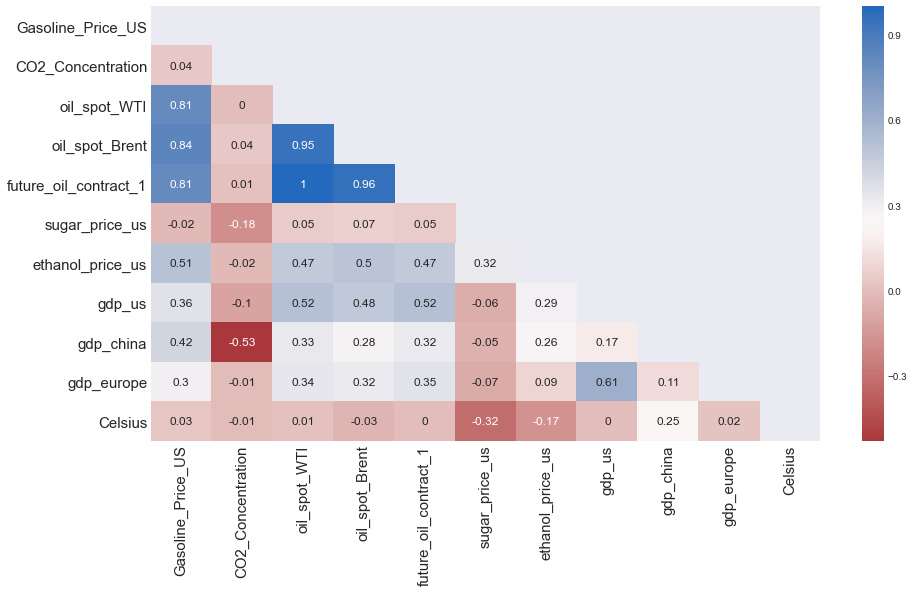

In [124]:
import seaborn as sns
corr =round(q_analysis_df_correl_diff.corr(),2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values, annot = True,annot_kws = {'size':12}, cmap = 'vlag_r', mask = mask)
heat_map = plt.gcf()
heat_map.set_size_inches(15,8)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
#Weekly Monthly timeframe

### 3.2 Regression analysis -- Oil to CO2 concentration -- Best model is using lag of each variables up to 8 lags <a name="3.2"></a>

In [125]:
quick_anaysis = q_analysis_df.copy()

In [126]:
# test perfect number of lags used in model
import statsmodels.api as sm

nlag = 20

for i in range(nlag+1):
    #print(i)
    quick_anaysis_df_loop = quick_anaysis.copy()
    #running = i.copy()
    column_names = ['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_gdp_us','chg_gdp_china','chg_gdp_europe']
    print("Number of lag : ", str(i))
    while i > 0:
        text = 'lag' + '_' + str(i)
        
        quick_anaysis_df_loop[text] = quick_anaysis['oil_spot_WTI'].shift(i)
        
        quick_anaysis_df_loop['chg_oil_spot_WTI' + "_" + text] = quick_anaysis['oil_spot_WTI'].shift(i)
        
        quick_anaysis_df_loop['chg_gdp_us' + "_" + text] = quick_anaysis['gdp_us'].shift(i)
        
        quick_anaysis_df_loop['chg_gdp_china' + "_" + text] = quick_anaysis['gdp_china'].shift(i)
        
        quick_anaysis_df_loop['chg_gdp_europe' + "_" + text] = quick_anaysis['gdp_europe'].shift(i)

        column_names.append('chg_oil_spot_WTI' + "_" + text)
        column_names.append('chg_gdp_us' + "_" + text)
        column_names.append('chg_gdp_china' + "_" + text)
        column_names.append('chg_gdp_europe' + "_" + text)

        i = i - 1
        #print(i+1)
    #print(" ")
    quick_anaysis_df_loop = quick_anaysis_df_loop.dropna()
    
    x = quick_anaysis_df_loop[column_names] 
    reg_model = sm.OLS(quick_anaysis_df_loop['chg_co2_concentration'],x)
    result = reg_model.fit()
    print("R-squared : ", result.rsquared)
    print("P-value : ")
    print(round(result.pvalues,4))
    print(" ")

Number of lag :  0
R-squared :  0.2649221825535426
P-value : 
chg_oil_spot_WTI_Positive    0.3944
chg_oil_spot_WTI_Negative    0.4774
chg_gdp_us                   0.7664
chg_gdp_china                0.0001
chg_gdp_europe               0.4518
dtype: float64
 
Number of lag :  1
R-squared :  0.3593579802615039
P-value : 
chg_oil_spot_WTI_Positive    0.8427
chg_oil_spot_WTI_Negative    0.6968
chg_gdp_us                   0.9188
chg_gdp_china                0.0000
chg_gdp_europe               0.7811
chg_oil_spot_WTI_lag_1       0.5202
chg_gdp_us_lag_1             0.0388
chg_gdp_china_lag_1          0.0156
chg_gdp_europe_lag_1         0.0581
dtype: float64
 
Number of lag :  2
R-squared :  0.77368318146539
P-value : 
chg_oil_spot_WTI_Positive    0.8747
chg_oil_spot_WTI_Negative    0.8758
chg_gdp_us                   0.0932
chg_gdp_china                0.0000
chg_gdp_europe               0.6889
chg_oil_spot_WTI_lag_2       0.3638
chg_gdp_us_lag_2             0.0651
chg_gdp_china_lag_2       

R-squared :  0.9212248782908983
P-value : 
chg_oil_spot_WTI_Positive    0.4951
chg_oil_spot_WTI_Negative    0.1962
chg_gdp_us                   0.8095
chg_gdp_china                0.0288
chg_gdp_europe               0.1836
chg_oil_spot_WTI_lag_10      0.4657
chg_gdp_us_lag_10            0.1161
chg_gdp_china_lag_10         0.1055
chg_gdp_europe_lag_10        0.1745
chg_oil_spot_WTI_lag_9       0.4500
chg_gdp_us_lag_9             0.1244
chg_gdp_china_lag_9          0.3910
chg_gdp_europe_lag_9         0.3812
chg_oil_spot_WTI_lag_8       0.6413
chg_gdp_us_lag_8             0.7843
chg_gdp_china_lag_8          0.2937
chg_gdp_europe_lag_8         0.0786
chg_oil_spot_WTI_lag_7       0.3826
chg_gdp_us_lag_7             0.0825
chg_gdp_china_lag_7          0.1386
chg_gdp_europe_lag_7         0.0208
chg_oil_spot_WTI_lag_6       0.0634
chg_gdp_us_lag_6             0.0232
chg_gdp_china_lag_6          0.3022
chg_gdp_europe_lag_6         0.1053
chg_oil_spot_WTI_lag_5       0.3758
chg_gdp_us_lag_5     

R-squared :  0.9999999888345652
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 69, dtype: float64
 
Number of lag :  17
R-squared :  0.9999999784705177
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 73, dtype: float64
 
Number of lag :  18
R-squared :  0.9999999786134298
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_g

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  0.9999996728271673
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 81, dtype: float64
 
Number of lag :  20
R-squared :  0.9999999910111339
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 85, dtype: float64
 


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


##### Up to lag 8 gives the best prediction on Change in oil price

###### Regression only oil price to CO2

### 3.3 Cointegration -- VECM <a name="3.3"></a>

In [127]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.vector_ar.vecm import *
import pandas

In [128]:
quick_analysis_ln = np.log(quick_anaysis[['oil_spot_WTI','gdp_us', 'gdp_china', 'gdp_europe','Celsius', 'CO2_Concentration']])

In [129]:
lag_order = select_order(data=quick_analysis_ln, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupporte

,AIC,BIC,FPE,HQIC
0,-47.37,-45.51*,2.701e-21,-46.62*
1,-47.36,-44.49,2.775e-21,-46.21
2,-47.32,-43.44,3.017e-21,-45.76
3,-47.54,-42.64,2.643e-21,-45.56
4,-48.22,-42.30,1.517e-21*,-45.83
5,-47.93,-41.00,2.443e-21,-45.14
6,-47.87,-39.93,3.410e-21,-44.67
7,-48.65,-39.70,2.300e-21,-45.05
8,-49.41,-39.44,1.901e-21,-45.39
9,-49.91,-38.94,2.574e-21,-45.49


In [130]:
rank_test = select_coint_rank(quick_analysis_ln, 0, 3, method="trace",signif=0.05)
rank_test.rank

model = VECM(quick_analysis_ln, deterministic="ci", seasons=4,
             k_ar_diff=lag_order.aic,  # =3
             coint_rank=rank_test.rank)  # =1

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [131]:
vecm_res = model.fit()
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.2428,0.377,0.644,0.520,-0.497,0.982
season2,-0.2548,0.569,-0.448,0.654,-1.371,0.861
season3,-0.8880,0.386,-2.302,0.021,-1.644,-0.132
L1.oil_spot_WTI,-0.6636,0.250,-2.652,0.008,-1.154,-0.173
L1.gdp_us,8.7923,3.858,2.279,0.023,1.230,16.355
L1.gdp_china,2.3442,1.581,1.482,0.138,-0.755,5.444
L1.gdp_europe,-0.0767,2.420,-0.032,0.975,-4.820,4.666
L1.Celsius,-2.0506,0.352,-5.825,0.000,-2.741,-1.361
L1.CO2_Concentration,-52.9986,26.469,-2.002,0.045,-104.877,-1.120
L2.oil_spot_WTI,-0.4546,0.251,-1.810,0.070,-0.947,0.038


# 4.) Yearly analysis <a name="4"></a>

### 4.1 CO2 Emission --> CO2 Concentration: CO2 Emissions can predict the CO2 Concentration best up to 3 year <a name="4.1"></a>

In [132]:
fixing_index = []
fixing_value = []
for i in range(len(co2_conc)):
    if co2_conc.iloc[i].average == -999.99:
        y = co2_conc.iloc[i].year
        a = co2_conc[(co2_conc.year == y) & (co2_conc.average != -999.99)]['average'].values.mean()
        fixing_index.append(i)
        fixing_value.append(a)
    else:
        fixing_value.append(co2_conc.iloc[i].average)
co2_conc['average'] = fixing_value
co2_conc_avg = co2_conc.groupby('year').average.mean()

In [133]:
co2_conc_summary = pd.concat([co2_conc_avg,co2_conc.groupby('year').average.std()*np.sqrt(12)],axis = 1)
co2_conc_summary.columns = ['yearly_mean','yearly_vol']

con2_con_summary = pd.DataFrame(co2_conc_summary)

co2_conc_summary['%incr_mean'] = (co2_conc_summary['yearly_mean'].shift(-1) / co2_conc_summary['yearly_mean'] -1 ).fillna(0)
co2_conc_summary['%incr_vol'] = (co2_conc_summary['yearly_vol'].shift(-1) / co2_conc_summary['yearly_vol'] -1 ).fillna(0)

In [134]:
co2_conc_summary = co2_conc_summary.join(world_co2_em).join(world_co2_em_gas).join(world_co2_em_liq).join(world_co2_em_sol)
co2_analysis = co2_conc_summary.dropna()


In [135]:
# First dif
input_df = (co2_analysis[['yearly_mean','World_Emission_general']].apply(np.log) - co2_analysis[['yearly_mean','World_Emission_general']].apply(np.log).shift(1)).dropna()

In [136]:
reg_model = sm.OLS(input_df['yearly_mean'],input_df['World_Emission_general'])
result = reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            yearly_mean   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     29.98
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           2.77e-06
Time:                        15:24:01   Log-Likelihood:                 167.13
No. Observations:                  40   AIC:                            -332.3
Df Residuals:                      39   BIC:                            -330.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
World_Emission_general     0

Scipy computed Pearson r: 0.15459854042085527 and p-value: 0.340840828622753


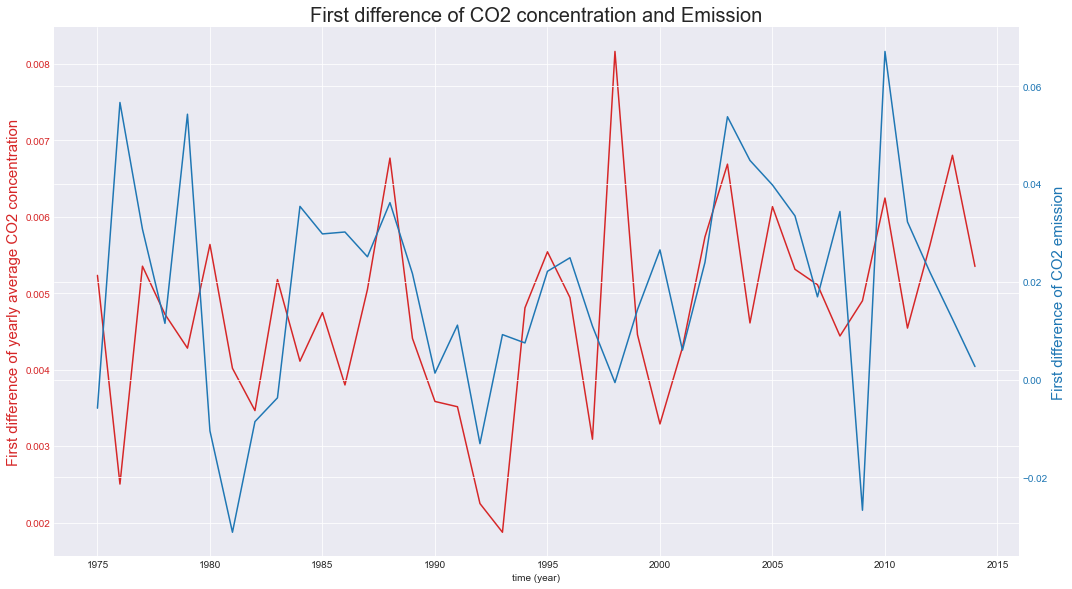

In [137]:
r, p = stats.pearsonr(input_df['yearly_mean'],input_df['World_Emission_general'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

fig,ax1 = plt.subplots(figsize = (15,8))
color = 'tab:red'
ax1.plot(input_df.index, input_df['yearly_mean'], color = color)
ax1.tick_params(axis = 'y',labelcolor = color)
ax1.set_xlabel('time (year)')
ax1.set_ylabel('First difference of yearly average CO2 concentration', color = color, size = 15)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = color = 'tab:blue'
ax2.plot(input_df.index, input_df['World_Emission_general'], color = color)
ax2.tick_params(axis = 'y',labelcolor = color)
ax2.set_ylabel('First difference of CO2 emission', color = color, size = 15)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("First difference of CO2 concentration and Emission", size = 20)
plt.show()
#1998 check trend

In [138]:
input_df_reg = input_df.copy()

input_df_reg['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,input_df['World_Emission_general'] ))
input_df_reg['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,input_df['World_Emission_general'] ))


input_df_reg['lag1'] = input_df['World_Emission_general'].shift(1)
input_df_reg['lag2'] = input_df['World_Emission_general'].shift(2)
input_df_reg['lag3'] = input_df['World_Emission_general'].shift(3)

input_df_reg = input_df_reg.dropna()

In [139]:
#x = input_df_reg[['positive_change','negative_change','lag1','lag2']] #,'lag3']]
#x = input_df_reg[['World_Emission_general','positive_change','negative_change','lag1','lag2','lag3']] 
x = input_df_reg[['World_Emission_general','lag1','lag2','lag3']] 
reg_model = sm.OLS(input_df_reg['yearly_mean'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                            OLS Regression Results                            
Dep. Variable:            yearly_mean   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.26e-09
Time:                        15:24:02   Log-Likelihood:                 168.63
No. Observations:                  37   AIC:                            -329.3
Df Residuals:                      33   BIC:                            -322.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
World_Emission_general     0

In [140]:
# test perfect number of lags used in model with positive/negative change in emissions
nlag = 10

for i in range(nlag+1):
    #print(i)
    input_df_reg_loop = input_df.copy()
    input_df_reg_loop['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,input_df['World_Emission_general'] ))
    input_df_reg_loop['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,input_df['World_Emission_general'] ))
    #running = i.copy()
    column_names = ['positive_change','negative_change']
    print("Number of lag : ", str(i))
    while i > 0:
        text = 'lag' + '_' + str(i)
        input_df_reg_loop[text] = input_df['World_Emission_general'].shift(i)
        column_names.append(text)
        i = i - 1

    input_df_reg_loop = input_df_reg_loop.dropna()
    
    x = input_df_reg_loop[column_names]
    reg_model = sm.OLS(input_df_reg_loop['yearly_mean'],x)
    result = reg_model.fit()
    print("R-squared : ", result.rsquared)
    print("P-value : ")
    print(result.pvalues)
    print(" ")

Number of lag :  0
R-squared :  0.6676249832624084
P-value : 
positive_change    7.910400e-10
negative_change    2.614309e-03
dtype: float64
 
Number of lag :  1
R-squared :  0.7489629532325237
P-value : 
positive_change    0.000001
negative_change    0.006127
lag_1              0.002529
dtype: float64
 
Number of lag :  2
R-squared :  0.7806960060472822
P-value : 
positive_change    0.000033
negative_change    0.019940
lag_2              0.074281
lag_1              0.020307
dtype: float64
 
Number of lag :  3
R-squared :  0.7961449630560566
P-value : 
positive_change    0.000205
negative_change    0.060420
lag_3              0.070357
lag_2              0.138196
lag_1              0.061134
dtype: float64
 
Number of lag :  4
R-squared :  0.814253624521907
P-value : 
positive_change    0.000209
negative_change    0.200912
lag_4              0.074723
lag_3              0.122517
lag_2              0.351593
lag_1              0.112364
dtype: float64
 
Number of lag :  5
R-squared :  0.8229

#### Decided to use only up to 3 lags - highest r square and significant variables

### 4.2 Oil price to CO2 Concentration: Yearly change oil price with 1 lag is a best predictor to yearly change CO2 concentration <a name="4.2"></a>

In [141]:
oil_co2_df

,Weekindex,Date,Year,Month,Week,Day,Par_Month,Par_Day,oil_spot_WTI,oil_spot_Brent,...,Date_edited,year,month,day,decimal,average,ndays,1_year_ago,10_years_ago,increase_since_1800
Par_Week,,,,,,,,,,,,,,,,,,,,,
19910205,266,2/1/1991,1991,2,5,1,199102,19910901,21.33,20.80,...,1991-02-01,1991.0,2.0,3.0,1991.0918,355.23,7.0,354.95,340.03,74.73
19910206,267,2/8/1991,1991,2,6,8,199102,19910908,21.78,20.65,...,1991-02-08,1991.0,2.0,10.0,1991.1110,355.79,6.0,355.09,340.74,75.12
19910207,268,2/15/1991,1991,2,7,15,199102,19910915,20.73,18.35,...,1991-02-15,1991.0,2.0,17.0,1991.1301,356.44,6.0,355.30,340.20,75.61
19910208,269,2/22/1991,1991,2,8,22,199102,19910922,17.43,17.80,...,1991-02-22,1991.0,2.0,24.0,1991.1493,355.73,7.0,355.02,341.52,74.72
19910309,270,3/1/1991,1991,3,9,1,199103,19910901,19.43,19.33,...,1991-03-01,1991.0,3.0,3.0,1991.1685,357.08,6.0,355.76,341.15,75.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201253,1827,12/31/2020,2020,12,53,31,202012,20201231,48.35,51.22,...,2020-12-31,2021.0,1.0,3.0,2021.0068,415.25,7.0,413.39,391.73,135.20
20210102,1828,1/8/2021,2021,1,2,8,202101,20210108,52.14,55.51,...,2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210103,1829,1/15/2021,2021,1,3,15,202101,20210115,52.25,54.80,...,2021-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Choosing last Month data
year_oil_co2_df = oil_co2_df.groupby('Year').last().copy()

#Joining data to create big dataframe - yearly data

y_glob_temp = glob_temp.copy()
index = y_glob_temp.index
year_index = []
for i in index:
    year_index.append(str(i)[:4])
y_glob_temp['Year'] = [int(i) for i in year_index] 
y_glob_temp = y_glob_temp.set_index('Year')
y_glob_temp = y_glob_temp.groupby('Year').last()


y_gdp = gdp_df.copy()
index = y_gdp.index
year_index = []
for i in index:
    year_index.append(str(i)[:4])
y_gdp['Year'] = [int(i) for i in year_index] 
y_gdp = y_gdp.set_index('Year')
y_gdp = y_gdp.groupby('Year').last()


y_analysis_df = year_oil_co2_df.join(y_gdp.drop(columns = ['Month'])).dropna(subset=['gdp_date','gdp_us','gdp_china','gdp_europe'])
y_analysis_df = y_analysis_df.join(y_glob_temp['Celsius'])

#Rename Carbon Dioxide concentration 

temp = y_analysis_df['average']
y_analysis_df = y_analysis_df.drop(columns = 'average')
y_analysis_df['CO2_Concentration'] = temp

y_analysis_df = y_analysis_df.drop(columns = 'gdp_date')
y_analysis_df.head()

#Create first difference

temp_frame = (np.log(y_analysis_df[['gdp_china','gdp_us','gdp_europe','Celsius','CO2_Concentration']].shift(0)) - np.log(y_analysis_df[['gdp_china','gdp_us','gdp_europe','Celsius','CO2_Concentration']].shift(1)))
temp_frame = temp_frame.rename(columns = {'gdp_china' : 'chg_gdp_china','gdp_europe':'chg_gdp_europe','gdp_us':'chg_gdp_us','Celsius':'chg_celsius','CO2_Concentration':'chg_co2_concentration'})
y_analysis_df =  y_analysis_df.merge(temp_frame, how='inner', on='Year')
                                     
y_analysis_df.head()
y_analysis_df = y_analysis_df.iloc[1:]

#Export data to output table
y_analysis_df.to_csv('yearly_analysis_prep_data.csv')


In [143]:
quick_anaysis = y_analysis_df.copy()


# test perfect number of lags used in model
import statsmodels.api as sm

nlag = 20

for i in range(nlag+1):
    #print(i)
    quick_anaysis_df_loop = quick_anaysis.copy()
    #running = i.copy()
    column_names = ['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_gdp_us','chg_gdp_china','chg_gdp_europe']
    print("Number of lag : ", str(i))
    while i > 0:
        text = 'lag' + '_' + str(i)
        
        quick_anaysis_df_loop[text] = quick_anaysis['oil_spot_WTI'].shift(i)
        
        quick_anaysis_df_loop['chg_oil_spot_WTI' + "_" + text] = quick_anaysis['oil_spot_WTI'].shift(i)
        
        quick_anaysis_df_loop['chg_gdp_us' + "_" + text] = quick_anaysis['gdp_us'].shift(i)
        
        quick_anaysis_df_loop['chg_gdp_china' + "_" + text] = quick_anaysis['gdp_china'].shift(i)
        
        quick_anaysis_df_loop['chg_gdp_europe' + "_" + text] = quick_anaysis['gdp_europe'].shift(i)

        column_names.append('chg_oil_spot_WTI' + "_" + text)
        column_names.append('chg_gdp_us' + "_" + text)
        column_names.append('chg_gdp_china' + "_" + text)
        column_names.append('chg_gdp_europe' + "_" + text)

        i = i - 1
        #print(i+1)
    #print(" ")
    quick_anaysis_df_loop = quick_anaysis_df_loop.dropna()
    
    x = quick_anaysis_df_loop[column_names] 
    reg_model = sm.OLS(quick_anaysis_df_loop['chg_co2_concentration'],x)
    result = reg_model.fit()
    print("R-squared : ", result.rsquared)
    print("P-value : ")
    print(round(result.pvalues,4))
    print(" ")


Number of lag :  0
R-squared :  0.9267375084458885
P-value : 
chg_oil_spot_WTI_Positive    0.3341
chg_oil_spot_WTI_Negative    0.5315
chg_gdp_us                   0.0099
chg_gdp_china                0.4395
chg_gdp_europe               0.1678
dtype: float64
 
Number of lag :  1
R-squared :  0.42923125612237156
P-value : 
chg_oil_spot_WTI_Positive    0.6134
chg_oil_spot_WTI_Negative    0.8019
chg_gdp_us                   0.2011
chg_gdp_china                0.3730
chg_gdp_europe               0.2631
chg_oil_spot_WTI_lag_1       0.8498
chg_gdp_us_lag_1             0.5289
chg_gdp_china_lag_1          0.4283
chg_gdp_europe_lag_1         0.4607
dtype: float64
 
Number of lag :  2
R-squared :  0.7059594909452043
P-value : 
chg_oil_spot_WTI_Positive    0.0392
chg_oil_spot_WTI_Negative    0.0392
chg_gdp_us                   0.0392
chg_gdp_china                0.0392
chg_gdp_europe               0.0392
chg_oil_spot_WTI_lag_2       0.1931
chg_gdp_us_lag_2             0.0711
chg_gdp_china_lag_2    

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  0.9999999999999057
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
chg_oil_spot_WTI_lag_5      NaN
chg_gdp_us_lag_5            NaN
chg_gdp_china_lag_5         NaN
chg_gdp_europe_lag_5        NaN
chg_oil_spot_WTI_lag_4      NaN
chg_gdp_us_lag_4            NaN
chg_gdp_china_lag_4         NaN
chg_gdp_europe_lag_4        NaN
chg_oil_spot_WTI_lag_3      NaN
chg_gdp_us_lag_3            NaN
chg_gdp_china_lag_3         NaN
chg_gdp_europe_lag_3        NaN
chg_oil_spot_WTI_lag_2      NaN
chg_gdp_us_lag_2            NaN
chg_gdp_china_lag_2         NaN
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
dtype: float64
 
Number of lag :  6
R-squared :  0.9999999999999937
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us    

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
chg_oil_spot_WTI_lag_9      NaN
chg_gdp_us_lag_9            NaN
chg_gdp_china_lag_9         NaN
chg_gdp_europe_lag_9        NaN
chg_oil_spot_WTI_lag_8      NaN
chg_gdp_us_lag_8            NaN
chg_gdp_china_lag_8         NaN
chg_gdp_europe_lag_8        NaN
chg_oil_spot_WTI_lag_7      NaN
chg_gdp_us_lag_7            NaN
chg_gdp_china_lag_7         NaN
chg_gdp_europe_lag_7        NaN
chg_oil_spot_WTI_lag_6      NaN
chg_gdp_us_lag_6            NaN
chg_gdp_china_lag_6         NaN
chg_gdp_europe_lag_6        NaN
chg_oil_spot_WTI_lag_5      NaN
chg_gdp_us_lag_5            NaN
chg_gdp_china_lag_5         NaN
chg_gdp_europe_lag_5        NaN
chg_oil_spot_WTI_lag_4      NaN
chg_gdp_us_lag_4            NaN
chg_gdp_china_lag_4         NaN
chg_gdp_europe_lag_4        NaN
chg_oil_spot_WTI_lag_3      NaN
chg_gdp_us_l

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
chg_oil_spot_WTI_lag_12     NaN
chg_gdp_us_lag_12           NaN
chg_gdp_china_lag_12        NaN
chg_gdp_europe_lag_12       NaN
chg_oil_spot_WTI_lag_11     NaN
chg_gdp_us_lag_11           NaN
chg_gdp_china_lag_11        NaN
chg_gdp_europe_lag_11       NaN
chg_oil_spot_WTI_lag_10     NaN
chg_gdp_us_lag_10           NaN
chg_gdp_china_lag_10        NaN
chg_gdp_europe_lag_10       NaN
chg_oil_spot_WTI_lag_9      NaN
chg_gdp_us_lag_9            NaN
chg_gdp_china_lag_9         NaN
chg_gdp_europe_lag_9        NaN
chg_oil_spot_WTI_lag_8      NaN
chg_gdp_us_lag_8            NaN
chg_gdp_china_lag_8         NaN
chg_gdp_europe_lag_8        NaN
chg_oil_spot_WTI_lag_7      NaN
chg_gdp_us_lag_7            NaN
chg_gdp_china_lag_7         NaN
chg_gdp_europe_lag_7        NaN
chg_oil_spot_WTI_lag_6      NaN
chg_gdp_us_l

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 61, dtype: float64
 
Number of lag :  15
R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 65, dtype: float64
 
Number of lag :  16


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 69, dtype: float64
 
Number of lag :  17
R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 73, dtype: float64
 
Number of lag :  18
R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china     

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 81, dtype: float64
 
Number of lag :  20
R-squared :  1.0
P-value : 
chg_oil_spot_WTI_Positive   NaN
chg_oil_spot_WTI_Negative   NaN
chg_gdp_us                  NaN
chg_gdp_china               NaN
chg_gdp_europe              NaN
                             ..
chg_gdp_europe_lag_2        NaN
chg_oil_spot_WTI_lag_1      NaN
chg_gdp_us_lag_1            NaN
chg_gdp_china_lag_1         NaN
chg_gdp_europe_lag_1        NaN
Length: 85, dtype: float64
 


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


### Yearly change oil price with 1 lag is a best predictor to yearly change CO2 concentration

# 5.) Monthly analysis: Monthly data generates very low R squared <a name="5"></a>

In [144]:
dummy_list = oil_co2_df['average']
oil_co2_df.drop(columns = 'average')
oil_co2_df['co2_conc'] = dummy_list

In [145]:
first_dif_conc = (np.log(oil_co2_df['co2_conc'].shift(1)) - np.log(oil_co2_df['co2_conc'].shift(0)))
oil_co2_df['chg_co2_conc'] = first_dif_conc

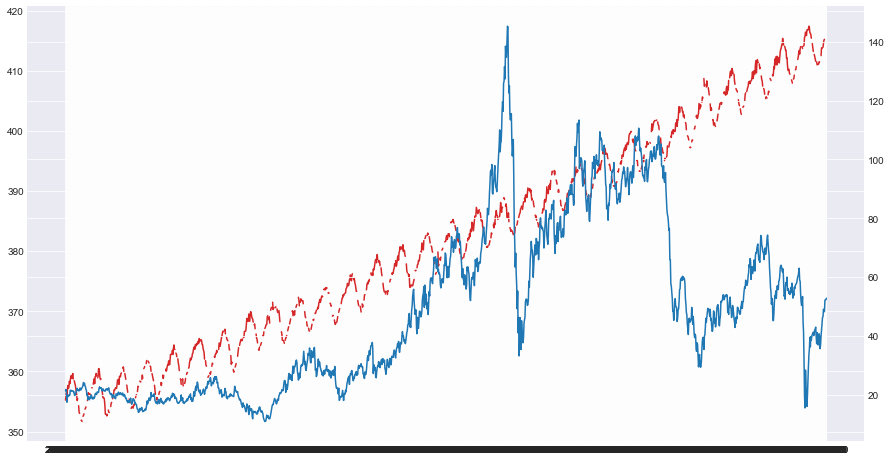

In [146]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(figsize = (15,8))

ax1.plot(oil_co2_df.Date,oil_co2_df['average'],color = 'tab:red')

ax2 = ax1.twinx() 

ax2.plot(oil_co2_df.Date,oil_co2_df[ 'oil_spot_WTI'],color = 'tab:blue')


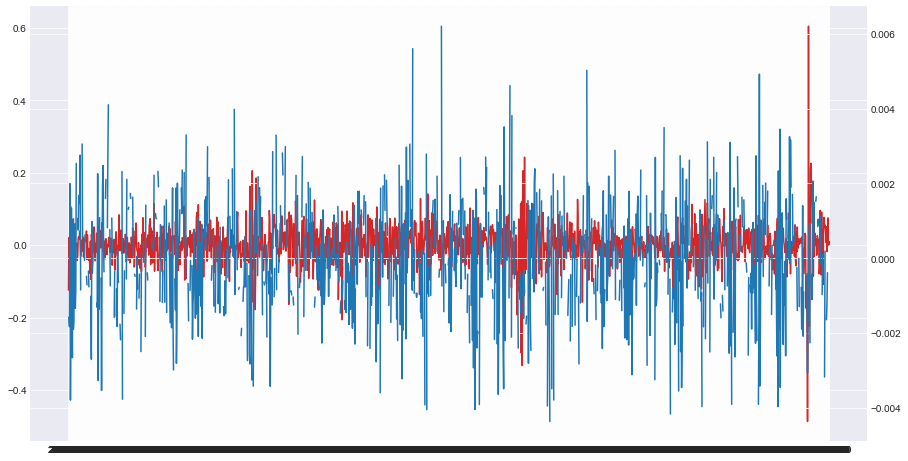

In [147]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(figsize = (15,8))

ax1.plot(oil_co2_df.Date,oil_co2_df['chg_oil_spot_WTI'],color = 'tab:red')

ax2 = ax1.twinx() 

ax2.plot(oil_co2_df.Date,oil_co2_df['chg_co2_conc'],color = 'tab:blue')



In [148]:
# test perfect number of lags used in model
import statsmodels.api as sm

nlag = 20

for i in range(nlag+1):
    #print(i)
    oil_co2_df_loop = oil_co2_df.copy()
    #running = i.copy()
    column_names = ['chg_oil_spot_WTI']
    print("Number of lag : ", str(i))
    while i > 0:
        text = 'lag' + '_' + str(i)
        oil_co2_df_loop[text] = oil_co2_df['chg_oil_spot_WTI'].shift(i)
        column_names.append(text)
        i = i - 1
        #print(i+1)
    #print(" ")
    oil_co2_df_loop = oil_co2_df_loop.dropna()
    
    x = oil_co2_df_loop[column_names] 
    reg_model = sm.OLS(oil_co2_df_loop['chg_co2_conc'],x)
    result = reg_model.fit()
    print("R-squared : ", result.rsquared)
    print("P-value : ")
    print(result.pvalues)
    print(" ")

Number of lag :  0
R-squared :  0.0020501677901554327
P-value : 
chg_oil_spot_WTI    0.309861
dtype: float64
 
Number of lag :  1
R-squared :  0.00340744689190986
P-value : 
chg_oil_spot_WTI    0.328394
lag_1               0.408714
dtype: float64
 
Number of lag :  2
R-squared :  0.0038387674084499057
P-value : 
chg_oil_spot_WTI    0.321194
lag_2               0.641596
lag_1               0.435043
dtype: float64
 
Number of lag :  3
R-squared :  0.003910075951151226
P-value : 
chg_oil_spot_WTI    0.319911
lag_3               0.850018
lag_2               0.640647
lag_1               0.445493
dtype: float64
 
Number of lag :  4
R-squared :  0.006858858461471273
P-value : 
chg_oil_spot_WTI    0.404522
lag_4               0.224099
lag_3               0.828001
lag_2               0.608460
lag_1               0.458532
dtype: float64
 
Number of lag :  5
R-squared :  0.010169475672391015
P-value : 
chg_oil_spot_WTI    0.365251
lag_5               0.197444
lag_4               0.331249
lag_3   

###### Monthly data generates very low R squared

# 6. Final analysis on exploratory data <a name="6"></a>

In [149]:
#Weekly gasoline
analysis = oil_co2_df.copy()
oil_co2_df.columns

Index(['Weekindex', 'Date', 'Year', 'Month', 'Week', 'Day', 'Par_Month',
       'Par_Day', 'oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1',
       'sugar_price_us', 'ethanol_price_us', 'chg_oil_spot_WTI',
       'chg_oil_spot_Brent', 'chg_oil_spot_WTI_Positive',
       'chg_oil_spot_WTI_Negative', 'chg_oil_future_contract1',
       'chg_oil_future_contract1_Positive',
       'chg_oil_future_contract1_Negative', 'Gasoline_Price_US',
       'chg_Gasoline_price_US', 'chg_Gasoline_price_US_Positive',
       'chg_Gasoline_price_US_future', 'Date_edited', 'year', 'month', 'day',
       'decimal', 'average', 'ndays', '1_year_ago', '10_years_ago',
       'increase_since_1800', 'co2_conc', 'chg_co2_conc'],
      dtype='object')

In [150]:
analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])

In [151]:
### Weekly ###
analysis_reg = analysis.copy()

#input_df_reg['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,input_df['World_Emission_general'] ))
#input_df_reg['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,input_df['World_Emission_general'] ))


analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_spot_WTI_Positive'].shift(10)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_spot_WTI_Negative'].shift(10)


analysis_reg = analysis_reg.dropna()

In [152]:
#Weekly gasoline
x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']]

reg_model = sm.OLS(analysis_reg['chg_Gasoline_price_US'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                              OLS Regression Results                             
Dep. Variable:     chg_Gasoline_price_US   R-squared:                       0.209
Model:                               OLS   Adj. R-squared:                  0.190
Method:                    Least Squares   F-statistic:                     11.07
Date:                   Sun, 28 Feb 2021   Prob (F-statistic):           2.73e-34
Time:                           15:24:56   Log-Likelihood:                 2424.9
No. Observations:                    943   AIC:                            -4806.
Df Residuals:                        921   BIC:                            -4699.
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [153]:
result.tvalues.to_frame()

,0
chg_oil_spot_WTI_Positive,0.166232
chg_oil_spot_WTI_Negative,3.925770
p+_lag1,4.219909
p+_lag2,3.318751
p+_lag3,0.962067
p+_lag4,2.162696
p+_lag5,0.631988
p+_lag6,1.496881
p+_lag7,-0.198889
p+_lag8,1.465689


In [154]:
#Weekly
analysis = oil_co2_df.copy()
oil_co2_df.columns

Index(['Weekindex', 'Date', 'Year', 'Month', 'Week', 'Day', 'Par_Month',
       'Par_Day', 'oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1',
       'sugar_price_us', 'ethanol_price_us', 'chg_oil_spot_WTI',
       'chg_oil_spot_Brent', 'chg_oil_spot_WTI_Positive',
       'chg_oil_spot_WTI_Negative', 'chg_oil_future_contract1',
       'chg_oil_future_contract1_Positive',
       'chg_oil_future_contract1_Negative', 'Gasoline_Price_US',
       'chg_Gasoline_price_US', 'chg_Gasoline_price_US_Positive',
       'chg_Gasoline_price_US_future', 'Date_edited', 'year', 'month', 'day',
       'decimal', 'average', 'ndays', '1_year_ago', '10_years_ago',
       'increase_since_1800', 'co2_conc', 'chg_co2_conc'],
      dtype='object')

In [155]:
analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])

In [156]:
### Weekly ###
analysis_reg = analysis.copy()

#input_df_reg['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,input_df['World_Emission_general'] ))
#input_df_reg['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,input_df['World_Emission_general'] ))


analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_spot_WTI_Positive'].shift(10)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_spot_WTI_Negative'].shift(10)


analysis_reg = analysis_reg.dropna()

In [157]:
#Weekly CO2
x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']]

reg_model = sm.OLS(analysis_reg['chg_co2_conc'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                            OLS Regression Results                            
Dep. Variable:           chg_co2_conc   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.320
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.148
Time:                        15:24:56   Log-Likelihood:                 4796.8
No. Observations:                 943   AIC:                            -9550.
Df Residuals:                     921   BIC:                            -9443.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

In [158]:
result.tvalues.to_frame()

,0
chg_oil_spot_WTI_Positive,0.115751
chg_oil_spot_WTI_Negative,2.114504
p+_lag1,0.027654
p+_lag2,0.965929
p+_lag3,0.120615
p+_lag4,-1.164309
p+_lag5,0.247266
p+_lag6,-0.171416
p+_lag7,-0.132262
p+_lag8,0.546003


In [159]:
#Weekly oil futures to future gasoline price

#Weekly
analysis = oil_co2_df.copy()
oil_co2_df.columns
analysis = analysis[['chg_oil_future_contract1_Positive','chg_oil_future_contract1_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])



analysis_reg = analysis.copy()

#input_df_reg['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,input_df['World_Emission_general'] ))
#input_df_reg['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,input_df['World_Emission_general'] ))


analysis_reg['p+_lag1'] = analysis['chg_oil_future_contract1_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_future_contract1_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_future_contract1_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_future_contract1_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_future_contract1_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_future_contract1_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_future_contract1_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_future_contract1_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_future_contract1_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_future_contract1_Positive'].shift(10)

analysis_reg['chg_Future_gasoline'] = analysis['chg_Gasoline_price_US'].shift(-1)


analysis_reg['p-_lag1'] = analysis['chg_oil_future_contract1_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_future_contract1_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_future_contract1_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_future_contract1_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_future_contract1_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_future_contract1_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_future_contract1_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_future_contract1_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_future_contract1_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_future_contract1_Negative'].shift(10)


analysis_reg = analysis_reg.dropna()


#Regression week oil futures to future gasoline price
x = analysis_reg[['chg_oil_future_contract1_Positive', 'chg_oil_future_contract1_Negative','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']]

reg_model = sm.OLS(analysis_reg['chg_Future_gasoline'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                             OLS Regression Results                            
Dep. Variable:     chg_Future_gasoline   R-squared:                       0.208
Model:                             OLS   Adj. R-squared:                  0.189
Method:                  Least Squares   F-statistic:                     11.00
Date:                 Sun, 28 Feb 2021   Prob (F-statistic):           5.01e-34
Time:                         15:24:56   Log-Likelihood:                 2421.3
No. Observations:                  942   AIC:                            -4799.
Df Residuals:                      920   BIC:                            -4692.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [160]:
result.tvalues.to_frame()

,0
chg_oil_future_contract1_Positive,4.081454
chg_oil_future_contract1_Negative,6.758975
p+_lag1,3.999388
p+_lag2,1.264686
p+_lag3,0.855923
p+_lag4,0.741186
p+_lag5,0.892940
p+_lag6,-0.554530
p+_lag7,0.773687
p+_lag8,-0.068281


In [161]:
### Weekly ###
### Weekly Lag 0###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()


analysis_reg = analysis_reg

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative']] 

reg_model = sm.OLS(analysis_reg['chg_Gasoline_price_US'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 6###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()


analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6']] 

reg_model = sm.OLS(analysis_reg['chg_Gasoline_price_US'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 12###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()

analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis['chg_oil_spot_WTI_Positive'].shift(12)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis['chg_oil_spot_WTI_Negative'].shift(12)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12']] 

reg_model = sm.OLS(analysis_reg['chg_Gasoline_price_US'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 24###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()

analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis['chg_oil_spot_WTI_Positive'].shift(12)
analysis_reg['p+_lag13'] = analysis['chg_oil_spot_WTI_Positive'].shift(13)
analysis_reg['p+_lag14'] = analysis['chg_oil_spot_WTI_Positive'].shift(14)
analysis_reg['p+_lag15'] = analysis['chg_oil_spot_WTI_Positive'].shift(15)
analysis_reg['p+_lag16'] = analysis['chg_oil_spot_WTI_Positive'].shift(16)
analysis_reg['p+_lag17'] = analysis['chg_oil_spot_WTI_Positive'].shift(17)
analysis_reg['p+_lag18'] = analysis['chg_oil_spot_WTI_Positive'].shift(18)
analysis_reg['p+_lag19'] = analysis['chg_oil_spot_WTI_Positive'].shift(19)
analysis_reg['p+_lag20'] = analysis['chg_oil_spot_WTI_Positive'].shift(20)
analysis_reg['p+_lag21'] = analysis['chg_oil_spot_WTI_Positive'].shift(21)
analysis_reg['p+_lag22'] = analysis['chg_oil_spot_WTI_Positive'].shift(22)
analysis_reg['p+_lag23'] = analysis['chg_oil_spot_WTI_Positive'].shift(23)
analysis_reg['p+_lag24'] = analysis['chg_oil_spot_WTI_Positive'].shift(24)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis['chg_oil_spot_WTI_Negative'].shift(12)
analysis_reg['p-_lag13'] = analysis['chg_oil_spot_WTI_Negative'].shift(13)
analysis_reg['p-_lag14'] = analysis['chg_oil_spot_WTI_Negative'].shift(14)
analysis_reg['p-_lag15'] = analysis['chg_oil_spot_WTI_Negative'].shift(15)
analysis_reg['p-_lag16'] = analysis['chg_oil_spot_WTI_Negative'].shift(16)
analysis_reg['p-_lag17'] = analysis['chg_oil_spot_WTI_Negative'].shift(17)
analysis_reg['p-_lag18'] = analysis['chg_oil_spot_WTI_Negative'].shift(18)
analysis_reg['p-_lag19'] = analysis['chg_oil_spot_WTI_Negative'].shift(19)
analysis_reg['p-_lag20'] = analysis['chg_oil_spot_WTI_Negative'].shift(20)
analysis_reg['p-_lag21'] = analysis['chg_oil_spot_WTI_Negative'].shift(21)
analysis_reg['p-_lag22'] = analysis['chg_oil_spot_WTI_Negative'].shift(22)
analysis_reg['p-_lag23'] = analysis['chg_oil_spot_WTI_Negative'].shift(23)
analysis_reg['p-_lag24'] = analysis['chg_oil_spot_WTI_Negative'].shift(24)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24']] 

reg_model = sm.OLS(analysis_reg['chg_Gasoline_price_US'],x)
result = reg_model.fit()
print(result.summary())


                              OLS Regression Results                             
Dep. Variable:     chg_Gasoline_price_US   R-squared:                       0.015
Model:                               OLS   Adj. R-squared:                  0.013
Method:                    Least Squares   F-statistic:                     7.314
Date:                   Sun, 28 Feb 2021   Prob (F-statistic):           0.000704
Time:                           15:24:56   Log-Likelihood:                 2346.5
No. Observations:                    953   AIC:                            -4689.
Df Residuals:                        951   BIC:                            -4679.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                              OLS Regression Results                             
Dep. Variable:     chg_Gasoline_price_US   R-squared:                       0.239
Model:                               OLS   Adj. R-squared:                  0.196
Method:                    Least Squares   F-statistic:                     5.523
Date:                   Sun, 28 Feb 2021   Prob (F-statistic):           8.89e-28
Time:                           15:24:56   Log-Likelihood:                 2401.2
No. Observations:                    929   AIC:                            -4702.
Df Residuals:                        879   BIC:                            -4461.
Df Model:                             50                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [162]:
# test perfect number of lags used in model
import statsmodels.api as sm

nlag = 2
analysis = oil_co2_df.copy()
for i in [2]: #range(nlag+1):
    #print(i)
#    analysis = oil_co2_df.copy()
    analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
    analysis_reg = analysis.copy()
    #running = i.copy()
    column_names = ['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative']
    print("Number of lag : ", str(i))
    while i > 0:
        text1 = 'chg_oil_spot_WTI_Positive' + '_lag' + '_' + str(i)
        analysis_reg[text1] = oil_co2_df['chg_oil_spot_WTI_Positive'].shift(i)
        column_names.append(text1)
        
        text2 = 'chg_oil_spot_WTI_Negative' + '_lag' + '_' + str(i)
        analysis_reg[text2] = oil_co2_df['chg_oil_spot_WTI_Negative'].shift(i)
        column_names.append(text2)
        
        i = i - 1
        #print(i+1)
    #print(" ")
    analysis_reg = analysis_reg.dropna(subset = column_names)
    
    x = analysis_reg[column_names][1:][['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_oil_spot_WTI_Positive_lag_1','chg_oil_spot_WTI_Negative_lag_1','chg_oil_spot_WTI_Positive_lag_2','chg_oil_spot_WTI_Negative_lag_2']]
    reg_model = sm.OLS(analysis_reg['chg_Gasoline_price_US'][1:],x)
    result = reg_model.fit()
    print("Adj. R-squared : ", result.rsquared_adj)
    print("P-value : ")
    print(result.summary())
    #print(result.pvalues)
    print(" ")

Number of lag :  2
Adj. R-squared :  0.2898402045584916
P-value : 
                              OLS Regression Results                             
Dep. Variable:     chg_Gasoline_price_US   R-squared:                       0.294
Model:                               OLS   Adj. R-squared:                  0.290
Method:                    Least Squares   F-statistic:                     65.69
Date:                   Sun, 28 Feb 2021   Prob (F-statistic):           2.88e-68
Time:                           15:24:56   Log-Likelihood:                 2500.8
No. Observations:                    951   AIC:                            -4990.
Df Residuals:                        945   BIC:                            -4960.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [163]:
### Weekly CO2 ###
### Weekly Lag 0###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()


analysis_reg = analysis_reg

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative']] 

reg_model = sm.OLS(analysis_reg['chg_co2_conc'],x)
result = reg_model.fit()
print(result.summary())

### Weekly ###
### Weekly Lag 3###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()


analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)


analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)



analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3']] 

reg_model = sm.OLS(analysis_reg['chg_co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 6###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()


analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6']] 

reg_model = sm.OLS(analysis_reg['chg_co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 12###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()

analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis['chg_oil_spot_WTI_Positive'].shift(12)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis['chg_oil_spot_WTI_Negative'].shift(12)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12']] 

reg_model = sm.OLS(analysis_reg['chg_co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 24###

analysis = oil_co2_df.copy()

analysis = analysis[['chg_oil_spot_WTI_Positive','chg_oil_spot_WTI_Negative','chg_Gasoline_price_US','chg_co2_conc']].dropna(subset = ['chg_co2_conc'])
analysis_reg = analysis.copy()

analysis_reg['p+_lag1'] = analysis['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis['chg_oil_spot_WTI_Positive'].shift(12)
analysis_reg['p+_lag13'] = analysis['chg_oil_spot_WTI_Positive'].shift(13)
analysis_reg['p+_lag14'] = analysis['chg_oil_spot_WTI_Positive'].shift(14)
analysis_reg['p+_lag15'] = analysis['chg_oil_spot_WTI_Positive'].shift(15)
analysis_reg['p+_lag16'] = analysis['chg_oil_spot_WTI_Positive'].shift(16)
analysis_reg['p+_lag17'] = analysis['chg_oil_spot_WTI_Positive'].shift(17)
analysis_reg['p+_lag18'] = analysis['chg_oil_spot_WTI_Positive'].shift(18)
analysis_reg['p+_lag19'] = analysis['chg_oil_spot_WTI_Positive'].shift(19)
analysis_reg['p+_lag20'] = analysis['chg_oil_spot_WTI_Positive'].shift(20)
analysis_reg['p+_lag21'] = analysis['chg_oil_spot_WTI_Positive'].shift(21)
analysis_reg['p+_lag22'] = analysis['chg_oil_spot_WTI_Positive'].shift(22)
analysis_reg['p+_lag23'] = analysis['chg_oil_spot_WTI_Positive'].shift(23)
analysis_reg['p+_lag24'] = analysis['chg_oil_spot_WTI_Positive'].shift(24)

analysis_reg['p-_lag1'] = analysis['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis['chg_oil_spot_WTI_Negative'].shift(12)
analysis_reg['p-_lag13'] = analysis['chg_oil_spot_WTI_Negative'].shift(13)
analysis_reg['p-_lag14'] = analysis['chg_oil_spot_WTI_Negative'].shift(14)
analysis_reg['p-_lag15'] = analysis['chg_oil_spot_WTI_Negative'].shift(15)
analysis_reg['p-_lag16'] = analysis['chg_oil_spot_WTI_Negative'].shift(16)
analysis_reg['p-_lag17'] = analysis['chg_oil_spot_WTI_Negative'].shift(17)
analysis_reg['p-_lag18'] = analysis['chg_oil_spot_WTI_Negative'].shift(18)
analysis_reg['p-_lag19'] = analysis['chg_oil_spot_WTI_Negative'].shift(19)
analysis_reg['p-_lag20'] = analysis['chg_oil_spot_WTI_Negative'].shift(20)
analysis_reg['p-_lag21'] = analysis['chg_oil_spot_WTI_Negative'].shift(21)
analysis_reg['p-_lag22'] = analysis['chg_oil_spot_WTI_Negative'].shift(22)
analysis_reg['p-_lag23'] = analysis['chg_oil_spot_WTI_Negative'].shift(23)
analysis_reg['p-_lag24'] = analysis['chg_oil_spot_WTI_Negative'].shift(24)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24']] 

reg_model = sm.OLS(analysis_reg['chg_co2_conc'],x)
result = reg_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           chg_co2_conc   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.759
Date:                Sun, 28 Feb 2021   Prob (F-statistic):            0.00122
Time:                        15:24:57   Log-Likelihood:                 4835.8
No. Observations:                 953   AIC:                            -9668.
Df Residuals:                     951   BIC:                            -9658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

                            OLS Regression Results                            
Dep. Variable:           chg_co2_conc   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8725
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.722
Time:                        15:24:57   Log-Likelihood:                 4735.2
No. Observations:                 929   AIC:                            -9370.
Df Residuals:                     879   BIC:                            -9129.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

##### Monthly

In [164]:
#Monthly
analysis = oil_co2_df.copy()
oil_co2_df.columns

Index(['Weekindex', 'Date', 'Year', 'Month', 'Week', 'Day', 'Par_Month',
       'Par_Day', 'oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1',
       'sugar_price_us', 'ethanol_price_us', 'chg_oil_spot_WTI',
       'chg_oil_spot_Brent', 'chg_oil_spot_WTI_Positive',
       'chg_oil_spot_WTI_Negative', 'chg_oil_future_contract1',
       'chg_oil_future_contract1_Positive',
       'chg_oil_future_contract1_Negative', 'Gasoline_Price_US',
       'chg_Gasoline_price_US', 'chg_Gasoline_price_US_Positive',
       'chg_Gasoline_price_US_future', 'Date_edited', 'year', 'month', 'day',
       'decimal', 'average', 'ndays', '1_year_ago', '10_years_ago',
       'increase_since_1800', 'co2_conc', 'chg_co2_conc'],
      dtype='object')

In [165]:
analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

In [166]:
analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

In [167]:
analysis_reg_month

,oil_spot_WTI,Gasoline_Price_US,co2_conc
Par_Month,,,
199203,0.026401,0.000986,-0.005353
199204,0.043840,0.041492,0.001256
199205,0.098705,0.056948,0.004616
199206,0.013019,0.029039,-0.000425
199207,-0.026668,-0.021921,-0.003936
...,...,...,...
202008,0.068893,0.002395,-0.002439
202009,-0.069891,-0.005758,0.002333
202010,-0.116910,-0.012104,-0.002234


In [168]:
### Month ###
analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))


analysis_reg_month_edited['p+_lag1'] = analysis_reg_month_edited['positive_change'].shift(1)
analysis_reg_month_edited['p+_lag2'] = analysis_reg_month_edited['positive_change'].shift(2)
analysis_reg_month_edited['p+_lag3'] = analysis_reg_month_edited['positive_change'].shift(3)
analysis_reg_month_edited['p+_lag4'] = analysis_reg_month_edited['positive_change'].shift(4)
analysis_reg_month_edited['p+_lag5'] = analysis_reg_month_edited['positive_change'].shift(5)
analysis_reg_month_edited['p+_lag6'] = analysis_reg_month_edited['positive_change'].shift(6)
analysis_reg_month_edited['p+_lag7'] = analysis_reg_month_edited['positive_change'].shift(7)
analysis_reg_month_edited['p+_lag8'] = analysis_reg_month_edited['positive_change'].shift(8)
analysis_reg_month_edited['p+_lag9'] = analysis_reg_month_edited['positive_change'].shift(9)
analysis_reg_month_edited['p+_lag10'] = analysis_reg_month_edited['positive_change'].shift(10)

analysis_reg_month_edited['p-_lag1'] = analysis_reg_month_edited['negative_change'].shift(1)
analysis_reg_month_edited['p-_lag2'] = analysis_reg_month_edited['negative_change'].shift(2)
analysis_reg_month_edited['p-_lag3'] = analysis_reg_month_edited['negative_change'].shift(3)
analysis_reg_month_edited['p-_lag4'] = analysis_reg_month_edited['negative_change'].shift(4)
analysis_reg_month_edited['p-_lag5'] = analysis_reg_month_edited['negative_change'].shift(5)
analysis_reg_month_edited['p-_lag6'] = analysis_reg_month_edited['negative_change'].shift(6)
analysis_reg_month_edited['p-_lag7'] = analysis_reg_month_edited['negative_change'].shift(7)
analysis_reg_month_edited['p-_lag8'] = analysis_reg_month_edited['negative_change'].shift(8)
analysis_reg_month_edited['p-_lag9'] = analysis_reg_month_edited['negative_change'].shift(9)
analysis_reg_month_edited['p-_lag10'] = analysis_reg_month_edited['negative_change'].shift(10)


analysis_reg_month_edited = analysis_reg_month_edited.dropna()

In [169]:
analysis_reg_month_edited

,oil_spot_WTI,Gasoline_Price_US,co2_conc,positive_change,negative_change,p+_lag1,p+_lag2,p+_lag3,p+_lag4,p+_lag5,...,p-_lag1,p-_lag2,p-_lag3,p-_lag4,p-_lag5,p-_lag6,p-_lag7,p-_lag8,p-_lag9,p-_lag10
Par_Month,,,,,,,,,,,,,,,,,,,,,
199301,0.039240,-0.013183,0.002019,0.039240,0.000000,0.000000,0.000000,0.000000,0.009811,0.000000,...,-0.040227,-0.019039,-0.039351,0.000000,-0.024578,-0.026668,0.000000,0.000000,0.000000,0.000000
199302,0.012745,-0.007612,0.000324,0.012745,0.000000,0.039240,0.000000,0.000000,0.000000,0.009811,...,0.000000,-0.040227,-0.019039,-0.039351,0.000000,-0.024578,-0.026668,0.000000,0.000000,0.000000
199303,-0.005372,0.008559,-0.000230,0.000000,-0.005372,0.012745,0.039240,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.040227,-0.019039,-0.039351,0.000000,-0.024578,-0.026668,0.000000,0.000000
199304,0.005859,0.028013,-0.002067,0.005859,0.000000,0.000000,0.012745,0.039240,0.000000,0.000000,...,-0.005372,0.000000,0.000000,-0.040227,-0.019039,-0.039351,0.000000,-0.024578,-0.026668,0.000000
199305,-0.024644,0.018249,-0.002695,0.000000,-0.024644,0.005859,0.000000,0.012745,0.039240,0.000000,...,0.000000,-0.005372,0.000000,0.000000,-0.040227,-0.019039,-0.039351,0.000000,-0.024578,-0.026668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202008,0.068893,0.002395,-0.002439,0.068893,0.000000,0.039939,0.079935,0.799539,0.032415,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.063329,-0.140256,-0.180122,0.000000,0.000000,0.000000
202009,-0.069891,-0.005758,0.002333,0.000000,-0.069891,0.068893,0.039939,0.079935,0.799539,0.032415,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.063329,-0.140256,-0.180122,0.000000,0.000000
202010,-0.116910,-0.012104,-0.002234,0.000000,-0.116910,0.000000,0.068893,0.039939,0.079935,0.799539,...,-0.069891,0.000000,0.000000,0.000000,0.000000,0.000000,-1.063329,-0.140256,-0.180122,0.000000


In [170]:
#Monthly gas
x = analysis_reg_month_edited[['positive_change', 'negative_change','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']] 

reg_model = sm.OLS(analysis_reg_month_edited['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                            OLS Regression Results                            
Dep. Variable:      Gasoline_Price_US   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           2.08e-27
Time:                        15:24:57   Log-Likelihood:                 530.33
No. Observations:                 336   AIC:                            -1017.
Df Residuals:                     314   BIC:                            -932.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
positive_change     0.3142      0.051     

In [171]:
result.tvalues.to_frame()

,0
positive_change,6.111870
negative_change,6.921579
p+_lag1,4.412042
p+_lag2,0.475270
p+_lag3,0.181473
p+_lag4,0.017624
p+_lag5,-1.224952
p+_lag6,-2.841092
p+_lag7,0.498124
p+_lag8,1.222380


In [172]:
#Monthly Oil futures to future gasoline price
#Monthly
analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['future_oil_contract_1','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

### Month ###
analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['future_oil_contract_1'] ))
analysis_reg_month_edited['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['future_oil_contract_1'] ))


analysis_reg_month_edited['p+_lag1'] = analysis_reg_month_edited['positive_change'].shift(1)
analysis_reg_month_edited['p+_lag2'] = analysis_reg_month_edited['positive_change'].shift(2)
analysis_reg_month_edited['p+_lag3'] = analysis_reg_month_edited['positive_change'].shift(3)
analysis_reg_month_edited['p+_lag4'] = analysis_reg_month_edited['positive_change'].shift(4)
analysis_reg_month_edited['p+_lag5'] = analysis_reg_month_edited['positive_change'].shift(5)
analysis_reg_month_edited['p+_lag6'] = analysis_reg_month_edited['positive_change'].shift(6)
analysis_reg_month_edited['p+_lag7'] = analysis_reg_month_edited['positive_change'].shift(7)
analysis_reg_month_edited['p+_lag8'] = analysis_reg_month_edited['positive_change'].shift(8)
analysis_reg_month_edited['p+_lag9'] = analysis_reg_month_edited['positive_change'].shift(9)
analysis_reg_month_edited['p+_lag10'] = analysis_reg_month_edited['positive_change'].shift(10)

analysis_reg_month_edited['chg_future_gasoline_lag-1'] = analysis_reg_month_edited['Gasoline_Price_US'].shift(-1)


analysis_reg_month_edited['p-_lag1'] = analysis_reg_month_edited['negative_change'].shift(1)
analysis_reg_month_edited['p-_lag2'] = analysis_reg_month_edited['negative_change'].shift(2)
analysis_reg_month_edited['p-_lag3'] = analysis_reg_month_edited['negative_change'].shift(3)
analysis_reg_month_edited['p-_lag4'] = analysis_reg_month_edited['negative_change'].shift(4)
analysis_reg_month_edited['p-_lag5'] = analysis_reg_month_edited['negative_change'].shift(5)
analysis_reg_month_edited['p-_lag6'] = analysis_reg_month_edited['negative_change'].shift(6)
analysis_reg_month_edited['p-_lag7'] = analysis_reg_month_edited['negative_change'].shift(7)
analysis_reg_month_edited['p-_lag8'] = analysis_reg_month_edited['negative_change'].shift(8)
analysis_reg_month_edited['p-_lag9'] = analysis_reg_month_edited['negative_change'].shift(9)
analysis_reg_month_edited['p-_lag10'] = analysis_reg_month_edited['negative_change'].shift(10)


analysis_reg_month_edited = analysis_reg_month_edited.dropna()


#Monthly oil futures to future gasoline
x = analysis_reg_month_edited[['positive_change', 'negative_change','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']] 

reg_model = sm.OLS(analysis_reg_month_edited['chg_future_gasoline_lag-1'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                                OLS Regression Results                               
Dep. Variable:     chg_future_gasoline_lag-1   R-squared:                       0.252
Model:                                   OLS   Adj. R-squared:                  0.199
Method:                        Least Squares   F-statistic:                     4.787
Date:                       Sun, 28 Feb 2021   Prob (F-statistic):           8.33e-11
Time:                               15:24:57   Log-Likelihood:                 481.96
No. Observations:                        335   AIC:                            -919.9
Df Residuals:                            313   BIC:                            -836.0
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [173]:
result.tvalues.to_frame()

,0
positive_change,3.083138
negative_change,5.864623
p+_lag1,1.272582
p+_lag2,0.004194
p+_lag3,-0.260988
p+_lag4,-0.335036
p+_lag5,-2.009712
p+_lag6,-0.195246
p+_lag7,0.612580
p+_lag8,-1.195916


In [174]:
#Monthly CO2
x = analysis_reg_month_edited[['positive_change', 'negative_change','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']] 

reg_model = sm.OLS(analysis_reg_month_edited['co2_conc'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                            OLS Regression Results                            
Dep. Variable:               co2_conc   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.583
Date:                Sun, 28 Feb 2021   Prob (F-statistic):             0.0485
Time:                        15:24:57   Log-Likelihood:                 1591.0
No. Observations:                 335   AIC:                            -3138.
Df Residuals:                     313   BIC:                            -3054.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
positive_change     0.0006      0.002     

In [175]:
result.tvalues.to_frame()

,0
positive_change,0.262101
negative_change,-0.260991
p+_lag1,-0.229169
p+_lag2,-0.384599
p+_lag3,1.220802
p+_lag4,-1.566402
p+_lag5,-1.085334
p+_lag6,2.264646
p+_lag7,-0.051740
p+_lag8,-0.798802


In [176]:
### Weekly CO2 ###
### Weekly Lag 0###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())

### Weekly ###
### Weekly Lag 3###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()


analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)


analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 6###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()


analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(6)

analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(6)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 12###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(12)

analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(12)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


### Weekly ###
### Weekly Lag 24###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()
analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(12)
analysis_reg['p+_lag13'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(13)
analysis_reg['p+_lag14'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(14)
analysis_reg['p+_lag15'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(15)
analysis_reg['p+_lag16'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(16)
analysis_reg['p+_lag17'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(17)
analysis_reg['p+_lag18'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(18)
analysis_reg['p+_lag19'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(19)
analysis_reg['p+_lag20'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(20)
analysis_reg['p+_lag21'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(21)
analysis_reg['p+_lag22'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(22)
analysis_reg['p+_lag23'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(23)
analysis_reg['p+_lag24'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(24)

analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(12)
analysis_reg['p-_lag13'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(13)
analysis_reg['p-_lag14'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(14)
analysis_reg['p-_lag15'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(15)
analysis_reg['p-_lag16'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(16)
analysis_reg['p-_lag17'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(17)
analysis_reg['p-_lag18'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(18)
analysis_reg['p-_lag19'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(19)
analysis_reg['p-_lag20'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(20)
analysis_reg['p-_lag21'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(21)
analysis_reg['p-_lag22'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(22)
analysis_reg['p-_lag23'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(23)
analysis_reg['p-_lag24'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(24)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Gasoline_Price_US   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     60.34
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.45e-23
Time:                        15:24:57   Log-Likelihood:                 504.32
No. Observations:                 346   AIC:                            -1005.
Df Residuals:                     344   BIC:                            -996.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

                            OLS Regression Results                            
Dep. Variable:      Gasoline_Price_US   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     5.101
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           5.91e-19
Time:                        15:24:57   Log-Likelihood:                 517.64
No. Observations:                 322   AIC:                            -935.3
Df Residuals:                     272   BIC:                            -746.5
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

In [177]:
### Monthly CO2 ###
### Monthly Lag 0###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())

### Monthly ###
### Monthly Lag 3###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()


analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)


analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Monthly ###
### Monthly Lag 6###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()


analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(6)

analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(6)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Monthly ###
### Monthly Lag 12###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(12)

analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(12)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Monthly ###
### Monthly Lag 24###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_month = analysis.groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_month = np.log(analysis_month) - np.log(analysis_month.shift(1))
analysis_reg_month.dropna(inplace = True)
analysis_reg_month['co2_conc'] = analysis_reg_month['co2_conc'] - analysis_reg_month['co2_conc'].shift(12)
analysis_reg_month.dropna(inplace = True)

analysis_reg_month_edited = analysis_reg_month.copy()

analysis_reg_month_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_month['oil_spot_WTI'] ))
analysis_reg_month_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_month['oil_spot_WTI'] ))

analysis_reg = analysis_reg_month_edited.copy()

analysis_reg = analysis_reg_month_edited.copy()
analysis_reg['p+_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(12)
analysis_reg['p+_lag13'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(13)
analysis_reg['p+_lag14'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(14)
analysis_reg['p+_lag15'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(15)
analysis_reg['p+_lag16'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(16)
analysis_reg['p+_lag17'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(17)
analysis_reg['p+_lag18'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(18)
analysis_reg['p+_lag19'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(19)
analysis_reg['p+_lag20'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(20)
analysis_reg['p+_lag21'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(21)
analysis_reg['p+_lag22'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(22)
analysis_reg['p+_lag23'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(23)
analysis_reg['p+_lag24'] = analysis_reg_month_edited['chg_oil_spot_WTI_Positive'].shift(24)

analysis_reg['p-_lag1'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(12)
analysis_reg['p-_lag13'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(13)
analysis_reg['p-_lag14'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(14)
analysis_reg['p-_lag15'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(15)
analysis_reg['p-_lag16'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(16)
analysis_reg['p-_lag17'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(17)
analysis_reg['p-_lag18'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(18)
analysis_reg['p-_lag19'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(19)
analysis_reg['p-_lag20'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(20)
analysis_reg['p-_lag21'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(21)
analysis_reg['p-_lag22'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(22)
analysis_reg['p-_lag23'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(23)
analysis_reg['p-_lag24'] = analysis_reg_month_edited['chg_oil_spot_WTI_Negative'].shift(24)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:               co2_conc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5700
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.566
Time:                        15:24:58   Log-Likelihood:                 1621.3
No. Observations:                 346   AIC:                            -3239.
Df Residuals:                     344   BIC:                            -3231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:               co2_conc   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.228
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.155
Time:                        15:24:58   Log-Likelihood:                 1542.9
No. Observations:                 322   AIC:                            -2986.
Df Residuals:                     272   BIC:                            -2797.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------

##### Quarterly

In [178]:
#Quarterly
analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]
analysis_quarter


,oil_spot_WTI,Gasoline_Price_US,co2_conc
Par_Month,,,
199103,19.63,1.047,358.34
199106,20.56,1.114,357.20
199109,22.42,1.097,351.66
199112,18.82,1.063,356.46
199203,19.19,1.015,357.96
...,...,...,...
201912,61.76,2.447,412.99
202003,15.48,2.007,415.75
202006,38.53,2.048,415.43


In [179]:
analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))


analysis_reg_quarter_edited['p+_lag1'] = analysis_reg_quarter_edited['positive_change'].shift(1)
analysis_reg_quarter_edited['p+_lag2'] = analysis_reg_quarter_edited['positive_change'].shift(2)
analysis_reg_quarter_edited['p+_lag3'] = analysis_reg_quarter_edited['positive_change'].shift(3)
analysis_reg_quarter_edited['p+_lag4'] = analysis_reg_quarter_edited['positive_change'].shift(4)
analysis_reg_quarter_edited['p+_lag5'] = analysis_reg_quarter_edited['positive_change'].shift(5)
analysis_reg_quarter_edited['p+_lag6'] = analysis_reg_quarter_edited['positive_change'].shift(6)
analysis_reg_quarter_edited['p+_lag7'] = analysis_reg_quarter_edited['positive_change'].shift(7)
analysis_reg_quarter_edited['p+_lag8'] = analysis_reg_quarter_edited['positive_change'].shift(8)
analysis_reg_quarter_edited['p+_lag9'] = analysis_reg_quarter_edited['positive_change'].shift(9)
analysis_reg_quarter_edited['p+_lag10'] = analysis_reg_quarter_edited['positive_change'].shift(10)

analysis_reg_quarter_edited['p-_lag1'] = analysis_reg_quarter_edited['negative_change'].shift(1)
analysis_reg_quarter_edited['p-_lag2'] = analysis_reg_quarter_edited['negative_change'].shift(2)
analysis_reg_quarter_edited['p-_lag3'] = analysis_reg_quarter_edited['negative_change'].shift(3)
analysis_reg_quarter_edited['p-_lag4'] = analysis_reg_quarter_edited['negative_change'].shift(4)
analysis_reg_quarter_edited['p-_lag5'] = analysis_reg_quarter_edited['negative_change'].shift(5)
analysis_reg_quarter_edited['p-_lag6'] = analysis_reg_quarter_edited['negative_change'].shift(6)
analysis_reg_quarter_edited['p-_lag7'] = analysis_reg_quarter_edited['negative_change'].shift(7)
analysis_reg_quarter_edited['p-_lag8'] = analysis_reg_quarter_edited['negative_change'].shift(8)
analysis_reg_quarter_edited['p-_lag9'] = analysis_reg_quarter_edited['negative_change'].shift(9)
analysis_reg_quarter_edited['p-_lag10'] = analysis_reg_quarter_edited['negative_change'].shift(10)


analysis_reg_quarter_edited = analysis_reg_quarter_edited.dropna()

In [180]:
#Quarterly gas
x = analysis_reg_quarter_edited[['positive_change', 'negative_change','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']] 

reg_model = sm.OLS(analysis_reg_quarter_edited['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                            OLS Regression Results                            
Dep. Variable:      Gasoline_Price_US   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     5.789
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.92e-09
Time:                        15:24:58   Log-Likelihood:                 106.00
No. Observations:                 105   AIC:                            -168.0
Df Residuals:                      83   BIC:                            -109.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
positive_change     0.3851      0.115     

In [181]:
result.tvalues.to_frame()

,0
positive_change,3.351839
negative_change,7.812903
p+_lag1,0.010260
p+_lag2,-0.908627
p+_lag3,-0.104785
p+_lag4,2.588076
p+_lag5,-0.421495
p+_lag6,-1.156638
p+_lag7,0.316868
p+_lag8,-0.179598


In [182]:
#Quarterly oil futuress to future gasoline
#Quarterly
analysis = oil_co2_df.copy()
oil_co2_df.columns


analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['future_oil_contract_1','Gasoline_Price_US','co2_conc']]


analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['positive_change'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['future_oil_contract_1']))
analysis_reg_quarter_edited['negative_change'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['future_oil_contract_1']))


analysis_reg_quarter_edited['p+_lag1'] = analysis_reg_quarter_edited['positive_change'].shift(1)
analysis_reg_quarter_edited['p+_lag2'] = analysis_reg_quarter_edited['positive_change'].shift(2)
analysis_reg_quarter_edited['p+_lag3'] = analysis_reg_quarter_edited['positive_change'].shift(3)
analysis_reg_quarter_edited['p+_lag4'] = analysis_reg_quarter_edited['positive_change'].shift(4)
analysis_reg_quarter_edited['p+_lag5'] = analysis_reg_quarter_edited['positive_change'].shift(5)
analysis_reg_quarter_edited['p+_lag6'] = analysis_reg_quarter_edited['positive_change'].shift(6)
analysis_reg_quarter_edited['p+_lag7'] = analysis_reg_quarter_edited['positive_change'].shift(7)
analysis_reg_quarter_edited['p+_lag8'] = analysis_reg_quarter_edited['positive_change'].shift(8)
analysis_reg_quarter_edited['p+_lag9'] = analysis_reg_quarter_edited['positive_change'].shift(9)
analysis_reg_quarter_edited['p+_lag10'] = analysis_reg_quarter_edited['positive_change'].shift(10)

analysis_reg_quarter_edited['chg_future_gasoline_lag-1'] = analysis_reg_quarter_edited['Gasoline_Price_US'].shift(-1)


analysis_reg_quarter_edited['p-_lag1'] = analysis_reg_quarter_edited['negative_change'].shift(1)
analysis_reg_quarter_edited['p-_lag2'] = analysis_reg_quarter_edited['negative_change'].shift(2)
analysis_reg_quarter_edited['p-_lag3'] = analysis_reg_quarter_edited['negative_change'].shift(3)
analysis_reg_quarter_edited['p-_lag4'] = analysis_reg_quarter_edited['negative_change'].shift(4)
analysis_reg_quarter_edited['p-_lag5'] = analysis_reg_quarter_edited['negative_change'].shift(5)
analysis_reg_quarter_edited['p-_lag6'] = analysis_reg_quarter_edited['negative_change'].shift(6)
analysis_reg_quarter_edited['p-_lag7'] = analysis_reg_quarter_edited['negative_change'].shift(7)
analysis_reg_quarter_edited['p-_lag8'] = analysis_reg_quarter_edited['negative_change'].shift(8)
analysis_reg_quarter_edited['p-_lag9'] = analysis_reg_quarter_edited['negative_change'].shift(9)
analysis_reg_quarter_edited['p-_lag10'] = analysis_reg_quarter_edited['negative_change'].shift(10)


analysis_reg_quarter_edited = analysis_reg_quarter_edited.dropna()


In [183]:
#Quarterly gas
x = analysis_reg_quarter_edited[['positive_change', 'negative_change','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']] 

reg_model = sm.OLS(analysis_reg_quarter_edited['chg_future_gasoline_lag-1'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                                OLS Regression Results                               
Dep. Variable:     chg_future_gasoline_lag-1   R-squared:                       0.133
Model:                                   OLS   Adj. R-squared:                 -0.100
Method:                        Least Squares   F-statistic:                    0.5716
Date:                       Sun, 28 Feb 2021   Prob (F-statistic):              0.931
Time:                               15:24:59   Log-Likelihood:                 63.704
No. Observations:                        104   AIC:                            -83.41
Df Residuals:                             82   BIC:                            -25.23
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [184]:
result.tvalues.to_frame()

,0
positive_change,-0.087512
negative_change,-0.184812
p+_lag1,-0.354786
p+_lag2,0.611837
p+_lag3,0.238629
p+_lag4,-1.260058
p+_lag5,-0.755333
p+_lag6,0.494390
p+_lag7,0.473759
p+_lag8,0.242560


In [185]:
#Quarterly CO2
x = analysis_reg_quarter_edited[['positive_change', 'negative_change','p+_lag1', 'p+_lag2',
       'p+_lag3', 'p+_lag4', 'p+_lag5', 'p+_lag6', 'p+_lag7', 'p+_lag8',
       'p+_lag9', 'p+_lag10', 'p-_lag1', 'p-_lag2', 'p-_lag3', 'p-_lag4',
       'p-_lag5', 'p-_lag6', 'p-_lag7', 'p-_lag8', 'p-_lag9', 'p-_lag10']] 

reg_model = sm.OLS(analysis_reg_quarter_edited['co2_conc'],x)
result = reg_model.fit()
print(result.summary())
## Three years of emissions

                            OLS Regression Results                            
Dep. Variable:               co2_conc   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     1.864
Date:                Sun, 28 Feb 2021   Prob (F-statistic):             0.0231
Time:                        15:24:59   Log-Likelihood:                 513.25
No. Observations:                 104   AIC:                            -982.5
Df Residuals:                      82   BIC:                            -924.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
positive_change    -0.0013      0.003     

In [186]:
result.tvalues.to_frame()

,0
positive_change,-0.533131
negative_change,-0.323646
p+_lag1,-0.542292
p+_lag2,-1.274141
p+_lag3,0.918910
p+_lag4,0.165203
p+_lag5,1.512058
p+_lag6,0.821328
p+_lag7,-1.465174
p+_lag8,0.667699


In [187]:
### Quarterly CO2 ###
### Quarterly Lag 0###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())

### Quarterly ###
### Quarterly Lag 3###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()


analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)


analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


### Quarterly ###
### Quarterly Lag 6###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(6)

analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(6)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


### quarterly ###
### Quarterly Lag 12###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(12)

analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(12)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


### Quarterly ###
### Quarterly Lag 24###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(12)
analysis_reg['p+_lag13'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(13)
analysis_reg['p+_lag14'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(14)
analysis_reg['p+_lag15'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(15)
analysis_reg['p+_lag16'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(16)
analysis_reg['p+_lag17'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(17)
analysis_reg['p+_lag18'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(18)
analysis_reg['p+_lag19'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(19)
analysis_reg['p+_lag20'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(20)
analysis_reg['p+_lag21'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(21)
analysis_reg['p+_lag22'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(22)
analysis_reg['p+_lag23'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(23)
analysis_reg['p+_lag24'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(24)

analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(12)
analysis_reg['p-_lag13'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(13)
analysis_reg['p-_lag14'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(14)
analysis_reg['p-_lag15'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(15)
analysis_reg['p-_lag16'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(16)
analysis_reg['p-_lag17'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(17)
analysis_reg['p-_lag18'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(18)
analysis_reg['p-_lag19'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(19)
analysis_reg['p-_lag20'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(20)
analysis_reg['p-_lag21'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(21)
analysis_reg['p-_lag22'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(22)
analysis_reg['p-_lag23'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(23)
analysis_reg['p-_lag24'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(24)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24']] 

reg_model = sm.OLS(analysis_reg['Gasoline_Price_US'],x)
result = reg_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Gasoline_Price_US   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     45.29
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.60e-15
Time:                        15:24:59   Log-Likelihood:                 100.83
No. Observations:                 115   AIC:                            -197.7
Df Residuals:                     113   BIC:                            -192.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

                            OLS Regression Results                            
Dep. Variable:      Gasoline_Price_US   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3.745
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.52e-05
Time:                        15:24:59   Log-Likelihood:                 122.30
No. Observations:                  91   AIC:                            -144.6
Df Residuals:                      41   BIC:                            -19.06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

In [188]:
### Quarterly CO2 ###
### Quarterly Lag 0###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())

### Quarterly ###
### Quarterly Lag 3###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()


analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)


analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Quarterly ###
### Quarterly Lag 6###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(6)

analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(6)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### quarterly ###
### Quarterly Lag 12###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(12)

analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(12)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


### Quarterly ###
### Quarterly Lag 24###

analysis = oil_co2_df.copy()
oil_co2_df.columns

analysis_quarter = analysis.query('Month in [12,3,6,9]').groupby('Par_Month').last()[['oil_spot_WTI','Gasoline_Price_US','co2_conc']]

analysis_reg_quarter = np.log(analysis_quarter) - np.log(analysis_quarter.shift(1))
analysis_reg_quarter.dropna(inplace = True)
analysis_reg_quarter['co2_conc'] = analysis_reg_quarter['co2_conc'] - analysis_reg_quarter['co2_conc'].shift(4)
analysis_reg_quarter.dropna(inplace = True)

### Quarterly ###
analysis_reg_quarter_edited = analysis_reg_quarter.copy()

analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'] = list(map(lambda x : 0 if x <= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))
analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'] = list(map(lambda x : 0 if x >= 0 else x,analysis_reg_quarter['oil_spot_WTI'] ))

analysis_reg = analysis_reg_quarter_edited.copy()

analysis_reg['p+_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(1)
analysis_reg['p+_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(2)
analysis_reg['p+_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(3)
analysis_reg['p+_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(4)
analysis_reg['p+_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(5)
analysis_reg['p+_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(6)
analysis_reg['p+_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(7)
analysis_reg['p+_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(8)
analysis_reg['p+_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(9)
analysis_reg['p+_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(10)
analysis_reg['p+_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(11)
analysis_reg['p+_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(12)
analysis_reg['p+_lag13'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(13)
analysis_reg['p+_lag14'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(14)
analysis_reg['p+_lag15'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(15)
analysis_reg['p+_lag16'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(16)
analysis_reg['p+_lag17'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(17)
analysis_reg['p+_lag18'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(18)
analysis_reg['p+_lag19'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(19)
analysis_reg['p+_lag20'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(20)
analysis_reg['p+_lag21'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(21)
analysis_reg['p+_lag22'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(22)
analysis_reg['p+_lag23'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(23)
analysis_reg['p+_lag24'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Positive'].shift(24)

analysis_reg['p-_lag1'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(1)
analysis_reg['p-_lag2'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(2)
analysis_reg['p-_lag3'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(3)
analysis_reg['p-_lag4'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(4)
analysis_reg['p-_lag5'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(5)
analysis_reg['p-_lag6'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(6)
analysis_reg['p-_lag7'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(7)
analysis_reg['p-_lag8'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(8)
analysis_reg['p-_lag9'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(9)
analysis_reg['p-_lag10'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(10)
analysis_reg['p-_lag11'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(11)
analysis_reg['p-_lag12'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(12)
analysis_reg['p-_lag13'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(13)
analysis_reg['p-_lag14'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(14)
analysis_reg['p-_lag15'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(15)
analysis_reg['p-_lag16'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(16)
analysis_reg['p-_lag17'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(17)
analysis_reg['p-_lag18'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(18)
analysis_reg['p-_lag19'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(19)
analysis_reg['p-_lag20'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(20)
analysis_reg['p-_lag21'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(21)
analysis_reg['p-_lag22'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(22)
analysis_reg['p-_lag23'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(23)
analysis_reg['p-_lag24'] = analysis_reg_quarter_edited['chg_oil_spot_WTI_Negative'].shift(24)


analysis_reg = analysis_reg.dropna(subset = ['p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24'])

x = analysis_reg[['chg_oil_spot_WTI_Positive', 'chg_oil_spot_WTI_Negative','p+_lag1','p-_lag1','p+_lag2','p-_lag2','p+_lag3','p-_lag3','p+_lag4','p-_lag4','p+_lag5','p-_lag5','p+_lag6','p-_lag6','p+_lag7','p-_lag7','p+_lag8','p-_lag8','p+_lag9','p-_lag9','p+_lag10','p-_lag10','p+_lag11','p-_lag11','p+_lag12','p-_lag12'
                                             ,'p+_lag13','p-_lag13','p+_lag14','p-_lag14','p+_lag15','p-_lag15','p+_lag16','p-_lag16','p+_lag17','p-_lag17','p+_lag18','p-_lag18','p+_lag19','p-_lag19','p+_lag20','p-_lag20','p+_lag21','p-_lag21','p+_lag22','p-_lag22','p+_lag23','p-_lag23','p+_lag24','p-_lag24']] 

reg_model = sm.OLS(analysis_reg['co2_conc'],x)
result = reg_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:               co2_conc   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6017
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.550
Time:                        15:24:59   Log-Likelihood:                 540.92
No. Observations:                 115   AIC:                            -1078.
Df Residuals:                     113   BIC:                            -1072.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
chg_oil_spot_WTI_Posit

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:               co2_conc   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.9359
Date:                Sun, 28 Feb 2021   Prob (F-statistic):              0.591
Time:                        15:25:00   Log-Likelihood:                 464.11
No. Observations:                  91   AIC:                            -828.2
Df Residuals:                      41   BIC:                            -702.7
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------

# 7. Granger and check correlation <a name="7"></a>

In [189]:
main_frame_granger = oil_co2_df.copy()
oil_price_month = main_frame_granger['Month'].to_list()
quarter = []
for i in range(len(oil_price_month)):
    if oil_price_month[i] in [1,2,3]:
        #print(oil_price_month[i])
        quarter.append(1)
    elif oil_price_month[i] in [4,5,6]:
        quarter.append(2)
    elif oil_price_month[i] in [7,8,9]:
        quarter.append(3)
    elif oil_price_month[i] in [10,11,12]:
        quarter.append(4)
    else:
        quarter.append(oil_price_month[i])
        
main_frame_granger['Quarter'] = quarter
main_frame_granger = main_frame_granger.drop(columns = 'month')

In [190]:
main_frame_granger

,Weekindex,Date,Year,Month,Week,Day,Par_Month,Par_Day,oil_spot_WTI,oil_spot_Brent,...,day,decimal,average,ndays,1_year_ago,10_years_ago,increase_since_1800,co2_conc,chg_co2_conc,Quarter
Par_Week,,,,,,,,,,,,,,,,,,,,,
19910205,266,2/1/1991,1991,2,5,1,199102,19910901,21.33,20.80,...,3.0,1991.0918,355.23,7.0,354.95,340.03,74.73,355.23,NaN,1
19910206,267,2/8/1991,1991,2,6,8,199102,19910908,21.78,20.65,...,10.0,1991.1110,355.79,6.0,355.09,340.74,75.12,355.79,-0.001575,1
19910207,268,2/15/1991,1991,2,7,15,199102,19910915,20.73,18.35,...,17.0,1991.1301,356.44,6.0,355.30,340.20,75.61,356.44,-0.001825,1
19910208,269,2/22/1991,1991,2,8,22,199102,19910922,17.43,17.80,...,24.0,1991.1493,355.73,7.0,355.02,341.52,74.72,355.73,0.001994,1
19910309,270,3/1/1991,1991,3,9,1,199103,19910901,19.43,19.33,...,3.0,1991.1685,357.08,6.0,355.76,341.15,75.87,357.08,-0.003788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201253,1827,12/31/2020,2020,12,53,31,202012,20201231,48.35,51.22,...,3.0,2021.0068,415.25,7.0,413.39,391.73,135.20,415.25,-0.000385,4
20210102,1828,1/8/2021,2021,1,2,8,202101,20210108,52.14,55.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20210103,1829,1/15/2021,2021,1,3,15,202101,20210115,52.25,54.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [191]:
# MERGE GDP FRAME
main_frame_granger = pd.merge(main_frame_granger,gdp_df, how = 'left', on = ['Year','Quarter'])
main_frame_granger = main_frame_granger.dropna(subset = ['gdp_date'])

#MERGE GLOBAL TEMPERATURE FRAME
main_frame_granger = pd.merge(main_frame_granger,glob_temp, how = 'left', on = ['Par_Month'])
main_frame_granger = main_frame_granger.drop(columns = ['Year_y','Month_x','Month_y']).rename(columns = {'Year_x' : 'Year'})

In [192]:
main_frame_granger_week = main_frame_granger.groupby('Weekindex').last()[[ 'Gasoline_Price_US','co2_conc','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]
main_frame_granger_month = main_frame_granger.groupby('Par_Month').last()[[ 'Gasoline_Price_US','co2_conc','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]

#Quarterly 
Par_Quarter = []
for i in range(len(main_frame_granger)):
    Par_Quarter.append(str(main_frame_granger.loc[i].Year) + str(main_frame_granger.loc[i].Quarter))
main_frame_granger['Par_Quarter'] = Par_Quarter
main_frame_granger_quarter = main_frame_granger.groupby('Par_Quarter').last()[[ 'Gasoline_Price_US','co2_conc','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]


In [193]:
#Weekly
main_frame_granger_week_diff = np.log(main_frame_granger_week) - np.log(main_frame_granger_week.shift(1))
main_frame_granger_week_diff.dropna(inplace = True)

#Monthly
main_frame_granger_month_diff = np.log(main_frame_granger_month) - np.log(main_frame_granger_month.shift(1))
main_frame_granger_month_diff['co2_conc'] = main_frame_granger_month_diff['co2_conc'] - main_frame_granger_month_diff['co2_conc'].shift(12)
main_frame_granger_month_diff.dropna(inplace = True)

#Quarterly
#Monthly
main_frame_granger_quarter_diff = np.log(main_frame_granger_quarter) - np.log(main_frame_granger_quarter.shift(1))
main_frame_granger_quarter_diff['co2_conc'] = main_frame_granger_quarter_diff['co2_conc'] - main_frame_granger_quarter_diff['co2_conc'].shift(4)
main_frame_granger_quarter_diff.dropna(inplace = True)


In [194]:
granger_test_weekly = grangers_causality_matrix(main_frame_granger_week_diff , variables = main_frame_granger_week_diff.columns)
granger_test_weekly

,Gasoline_Price_US_x,co2_conc_x,oil_spot_WTI_x,oil_spot_Brent_x,future_oil_contract_1_x,sugar_price_us_x,ethanol_price_us_x,gdp_us_x,gdp_china_x,gdp_europe_x,Celsius_x
Gasoline_Price_US_y,1.0000,0.0107,0.0000,0.0000,0.0000,0.3184,0.0001,0.2876,0.0316,0.1152,0.9320
co2_conc_y,0.0008,1.0000,0.2733,0.1469,0.1625,0.5762,0.1777,0.0833,0.0328,0.4439,0.0139
oil_spot_WTI_y,0.0001,0.3853,1.0000,0.0021,0.0001,0.0202,0.6880,0.4598,0.0544,0.1786,0.3762
oil_spot_Brent_y,0.0012,0.1551,0.0000,1.0000,0.0000,0.5514,0.5573,0.1553,0.0650,0.1170,0.1524
future_oil_contract_1_y,0.0001,0.3346,0.0007,0.0021,1.0000,0.0296,0.5922,0.4746,0.0469,0.1830,0.2083
sugar_price_us_y,0.4211,0.0591,0.1391,0.4332,0.1452,1.0000,0.2079,0.2404,0.1109,0.0547,0.0009
ethanol_price_us_y,0.1068,0.2418,0.8163,0.1215,0.8270,0.3212,1.0000,0.0107,0.0552,0.0132,0.0512
gdp_us_y,0.2301,0.0752,0.2975,0.3318,0.2794,0.5294,0.0475,1.0000,0.7721,0.6842,0.9077
gdp_china_y,0.0231,0.0131,0.0504,0.1316,0.1070,0.0046,0.1419,0.7232,1.0000,0.9518,0.9195
gdp_europe_y,0.0364,0.0530,0.0262,0.2219,0.0215,0.0111,0.2328,0.1735,0.7310,1.0000,0.9484


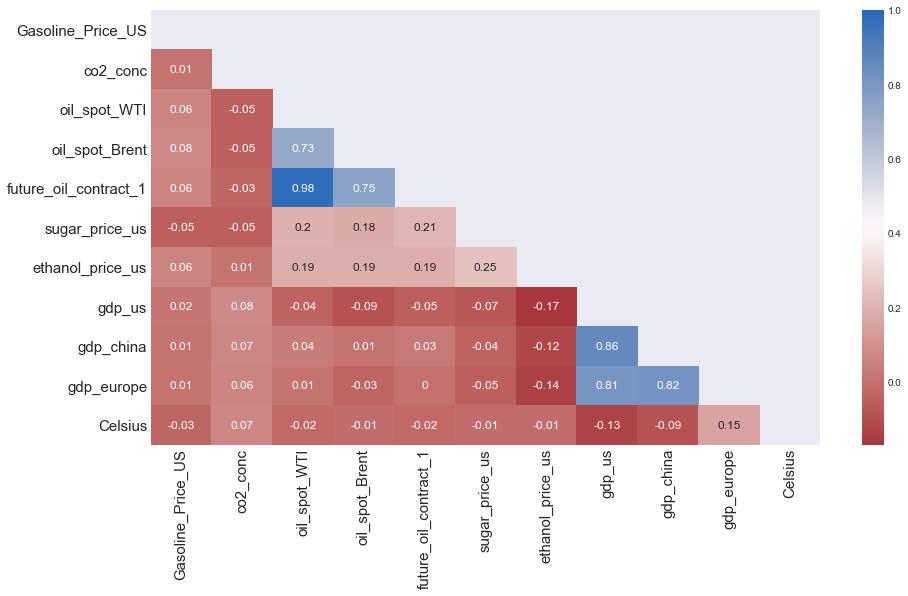

In [195]:
#Weekly
import seaborn as sns
corr =round(main_frame_granger_week_diff.corr(),2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values, annot = True,annot_kws = {'size':12}, cmap = 'vlag_r', mask = mask)
heat_map = plt.gcf()
heat_map.set_size_inches(15,8)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
#Weekly Monthly timeframe

In [196]:
granger_test_monthly = grangers_causality_matrix(main_frame_granger_month_diff , variables = main_frame_granger_month_diff.columns)
granger_test_monthly

,Gasoline_Price_US_x,co2_conc_x,oil_spot_WTI_x,oil_spot_Brent_x,future_oil_contract_1_x,sugar_price_us_x,ethanol_price_us_x,gdp_us_x,gdp_china_x,gdp_europe_x,Celsius_x
Gasoline_Price_US_y,1.0000,0.0307,0.0000,0.0000,0.0000,0.0328,0.0002,0.0002,0.0045,0.0131,0.0007
co2_conc_y,0.3618,1.0000,0.0212,0.1194,0.0333,0.0489,0.1877,0.1848,0.9219,0.6492,0.3236
oil_spot_WTI_y,0.0431,0.0742,1.0000,0.0056,0.0061,0.1746,0.1843,0.0000,0.0186,0.0049,0.0021
oil_spot_Brent_y,0.1266,0.1566,0.4199,1.0000,0.2271,0.2490,0.0213,0.0000,0.0083,0.1704,0.0073
future_oil_contract_1_y,0.0745,0.0594,0.0634,0.0150,1.0000,0.1329,0.2200,0.0000,0.0157,0.0133,0.0015
sugar_price_us_y,0.1515,0.3224,0.1333,0.5200,0.1875,1.0000,0.2337,0.0000,0.0000,0.0037,0.1321
ethanol_price_us_y,0.1568,0.2833,0.1550,0.1290,0.1143,0.0775,1.0000,0.1765,0.1328,0.3425,0.0010
gdp_us_y,0.0614,0.1676,0.1266,0.2762,0.1455,0.5802,0.0840,1.0000,0.1302,0.0004,0.0030
gdp_china_y,0.0001,0.9226,0.0616,0.2349,0.0816,0.0000,0.0406,0.0000,1.0000,0.0000,0.0159
gdp_europe_y,0.0195,0.2961,0.1373,0.2046,0.1202,0.1557,0.0681,0.0000,0.6803,1.0000,0.0245


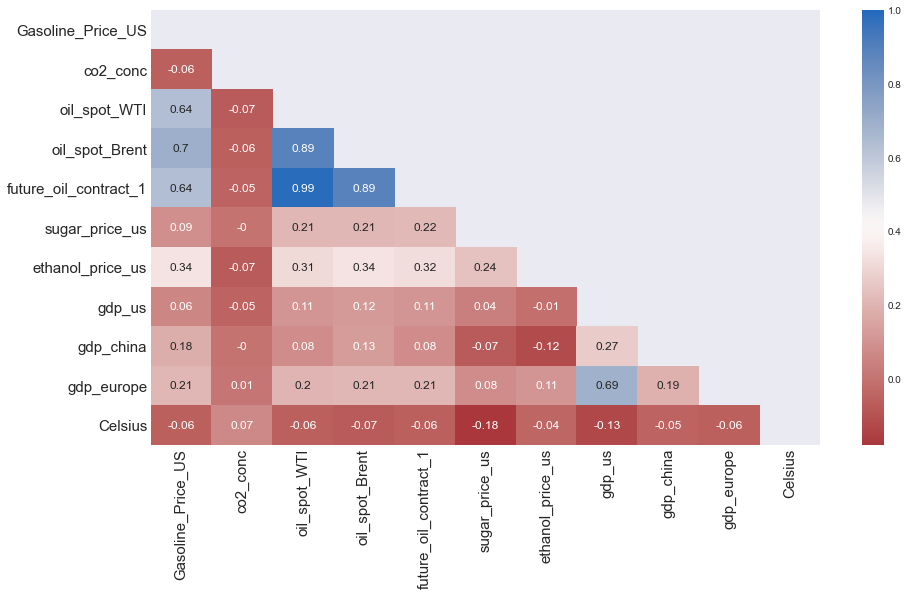

In [197]:
#Monthly
import seaborn as sns
corr =round(main_frame_granger_month_diff.corr(),2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values, annot = True,annot_kws = {'size':12}, cmap = 'vlag_r', mask = mask)
heat_map = plt.gcf()
heat_map.set_size_inches(15,8)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
#Monthly timeframe

In [198]:
granger_test_quarterly = grangers_causality_matrix(main_frame_granger_quarter_diff , variables = main_frame_granger_week_diff.columns)
granger_test_quarterly

,Gasoline_Price_US_x,co2_conc_x,oil_spot_WTI_x,oil_spot_Brent_x,future_oil_contract_1_x,sugar_price_us_x,ethanol_price_us_x,gdp_us_x,gdp_china_x,gdp_europe_x,Celsius_x
Gasoline_Price_US_y,1.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0174,0.0543
co2_conc_y,0.0015,1.0000,0.0032,0.0013,0.0033,0.0015,0.0002,0.1042,0.3197,0.1017,0.0005
oil_spot_WTI_y,0.0708,0.0000,1.0000,0.3872,0.2575,0.0301,0.0000,0.0000,0.0000,0.2649,0.3292
oil_spot_Brent_y,0.0025,0.0000,0.1952,1.0000,0.2362,0.0023,0.0000,0.0000,0.0000,0.1763,0.1086
future_oil_contract_1_y,0.0459,0.0000,0.3050,0.4711,1.0000,0.0304,0.0000,0.0000,0.0000,0.2627,0.2970
sugar_price_us_y,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0042,0.0000,0.0396,0.0007,0.0102
ethanol_price_us_y,0.5348,0.1441,0.0833,0.0052,0.0781,0.0937,1.0000,0.1432,0.0001,0.2695,0.0001
gdp_us_y,0.0001,0.0000,0.0471,0.0520,0.0373,0.2413,0.0000,1.0000,0.0003,0.0087,0.1570
gdp_china_y,0.0000,0.0000,0.0001,0.0000,0.0001,0.0022,0.0003,0.0000,1.0000,0.0039,0.0080
gdp_europe_y,0.0078,0.0010,0.0596,0.0954,0.0548,0.5004,0.0513,0.0000,0.0188,1.0000,0.5495


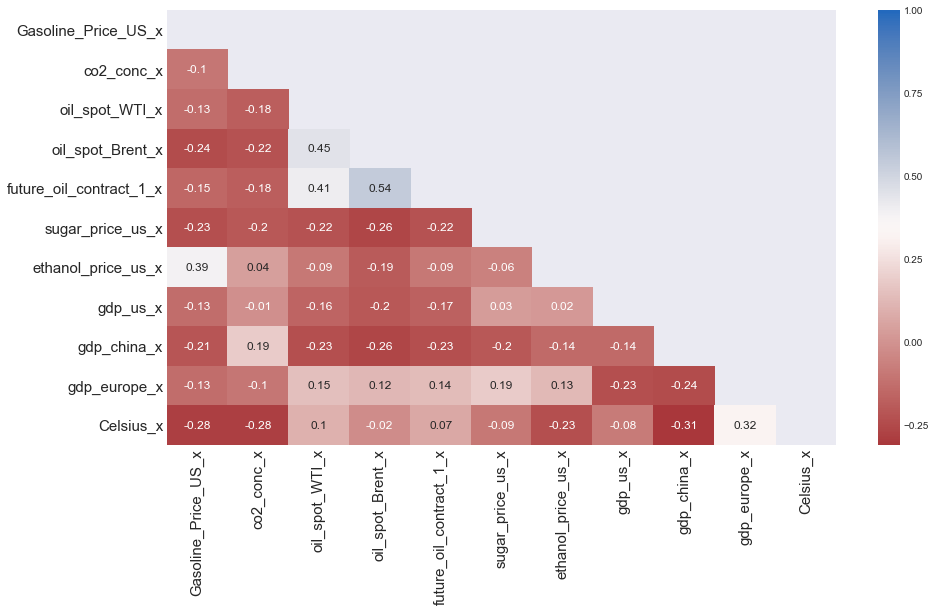

In [199]:
#Quarterly
import seaborn as sns
corr =round(granger_test_quarterly.corr(),2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values, annot = True,annot_kws = {'size':12}, cmap = 'vlag_r', mask = mask)
heat_map = plt.gcf()
heat_map.set_size_inches(15,8)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
#Weekly Monthly timeframe

In [200]:
main_frame_granger_week_diff[['index']] = 0
main_frame_granger_month_diff[['index']] = 1
main_frame_granger_quarter_diff[['index']] = 2
merge_df = [main_frame_granger_week_diff,main_frame_granger_month_diff,main_frame_granger_quarter_diff]
merge_result = pd.concat(merge_df)
merge_result_w_index = merge_result.set_index('index')

In [201]:
merge_result = merge_result.rename(columns = {'Gasoline_Price_US': 'Gasoline Price US','co2_conc': 'CO2 Concentration','oil_spot_WTI':'Oil Spot WTI','future_oil_contract_1':'Oil Futures','sugar_price_us':'Sugar Price US','ethanol_price_us':'Ethanol Price US','gdp_us':'US GDP','gdp_china':'China GDP','gdp_europe':'Europe GDP','Celsius':'Global Temp'})
merge_result_w_index  = merge_result_w_index.rename(columns = {'Gasoline_Price_US': 'Gasoline Price US','co2_conc': 'CO2 Concentration','oil_spot_WTI':'Oil Spot WTI','future_oil_contract_1':'Oil Futures','sugar_price_us':'Sugar Price US','ethanol_price_us':'Ethanol Price US','gdp_us':'US GDP','gdp_china':'China GDP','gdp_europe':'Europe GDP','Celsius':'Global Temp'})

In [202]:
merge_result_w_index

,Gasoline Price US,CO2 Concentration,Oil Spot WTI,oil_spot_Brent,Oil Futures,Sugar Price US,Ethanol Price US,US GDP,China GDP,Europe GDP,Global Temp
index,,,,,,,,,,,
0.0,-0.024955,0.000993,-0.053039,-0.059054,-0.045978,-0.008348,-0.017094,0.000000,0.000000,0.000000,0.000000
0.0,-0.009875,-0.000575,-0.029199,0.001280,-0.039180,0.028337,0.008584,0.000000,0.000000,0.000000,0.000000
0.0,0.013078,-0.001204,-0.028171,0.001540,-0.027449,0.002250,0.016394,0.000000,0.000000,0.000000,0.000000
0.0,0.010055,-0.001546,0.086700,0.090788,0.088085,0.001123,0.055350,0.000000,0.000000,0.000000,0.000000
0.0,0.001371,-0.000289,0.010099,0.044891,0.014868,0.040647,0.064958,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2.0,0.012310,-0.000063,-0.013171,0.065958,-0.012212,-0.097449,-0.103413,0.008025,0.098744,0.011274,0.049393
2.0,-0.226387,-0.001321,-0.482659,-0.492103,-0.479909,0.115365,-0.023623,0.009778,-0.171307,0.012655,0.069796
2.0,0.138034,-0.000181,0.287516,0.295119,0.282706,0.011236,0.069258,0.010110,0.106523,0.005814,0.211844


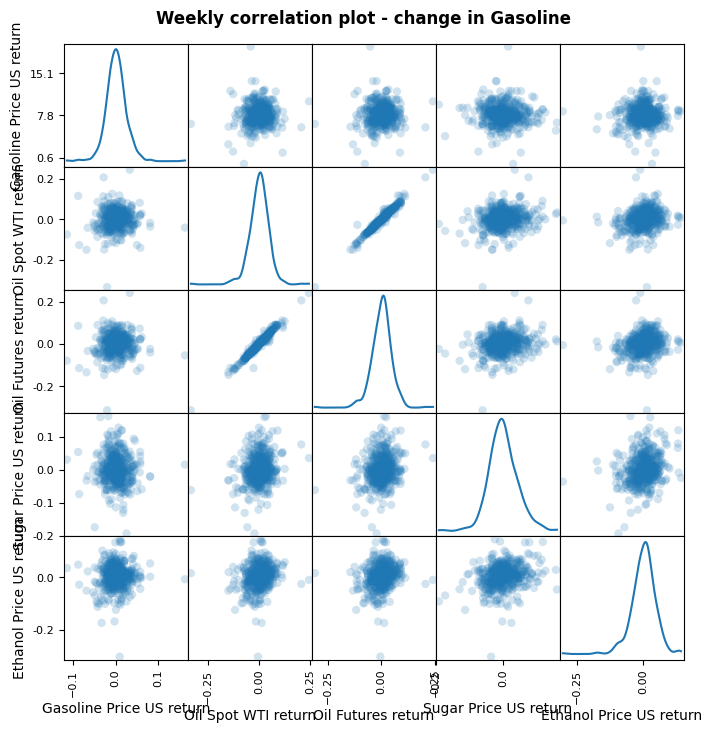

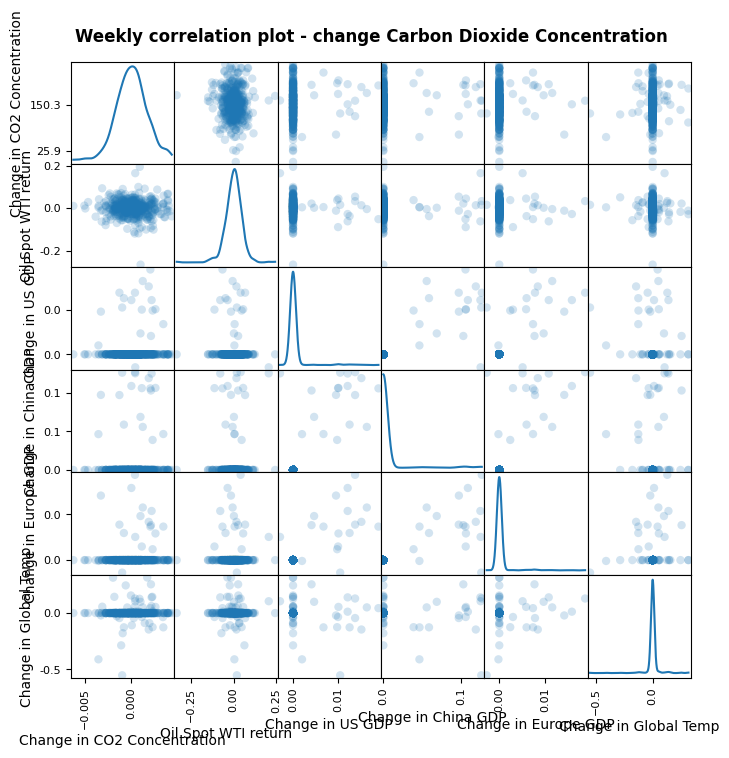

In [203]:
#Weekly Gasoline price problem
from matplotlib.ticker import FormatStrFormatter
from pandas.plotting import scatter_matrix


%matplotlib inline
plt.style.use("default")

plot_fig = main_frame_granger_week_diff.rename(columns = {'Gasoline_Price_US': 'Gasoline Price US return','co2_conc': 'Change in CO2 Concentration','oil_spot_WTI':'Oil Spot WTI return','future_oil_contract_1':'Oil Futures return','sugar_price_us':'Sugar Price US return','ethanol_price_us':'Ethanol Price US return','gdp_us':'Change in US GDP','gdp_china':'Change in China GDP','gdp_europe':'Change in Europe GDP','Celsius':'Change in Global Temp'})
plot_fig1 = plot_fig[['Gasoline Price US return','Oil Spot WTI return','Oil Futures return','Sugar Price US return','Ethanol Price US return']]
scatter_matrix = pd.plotting.scatter_matrix(plot_fig1, alpha=0.2, marker = 'o', figsize = (8,8),diagonal = 'kde')
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.suptitle('Weekly correlation plot - change in Gasoline', size = 12, weight = 'bold',va = 'bottom', x= 0.5, y= 0.9)
plt.show()

#Weekly CO2 problem

plot_fig2 = plot_fig[['Change in CO2 Concentration', 'Oil Spot WTI return','Change in US GDP', 'Change in China GDP', 'Change in Europe GDP', 'Change in Global Temp']]
scatter_matrix = pd.plotting.scatter_matrix(plot_fig2, alpha=0.2, marker = 'o', figsize = (8,8),diagonal = 'kde')
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.suptitle('Weekly correlation plot - change Carbon Dioxide Concentration', size = 12, weight = 'bold',va = 'bottom', x= 0.5, y= 0.9)
plt.show()

In [204]:
merge_result_w_index.columns

Index(['Gasoline Price US', 'CO2 Concentration', 'Oil Spot WTI',
       'oil_spot_Brent', 'Oil Futures', 'Sugar Price US', 'Ethanol Price US',
       'US GDP', 'China GDP', 'Europe GDP', 'Global Temp'],
      dtype='object')

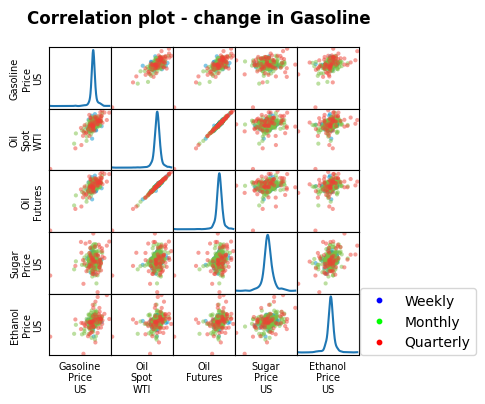

In [205]:
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

color_wheel = {1: "#0392cf", #b
               2: "#7bc043", #g
               3: "#ee4035"} #r
colors = merge_result_w_index.index.map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(merge_result_w_index[['Gasoline Price US','Oil Spot WTI','Oil Futures','Sugar Price US','Ethanol Price US']], color=colors
                    , alpha=0.5, figsize=(4, 4), diagonal='kde', marker = '.')
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel().replace(' ', '\n'), fontsize = 7, rotation = 0)
    ax.set_ylabel(ax.get_ylabel().replace(' ', '\n'), fontsize = 7, rotation = 90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    
plt.suptitle('Correlation plot - change in Gasoline', size = 12, weight = 'bold',va = 'bottom', x= 0.5, y= 0.93)

handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker="o", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
handles = [handles[0],handles[2],handles[1]]
labels=["Weekly", "Monthly", "Quarterly"]
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

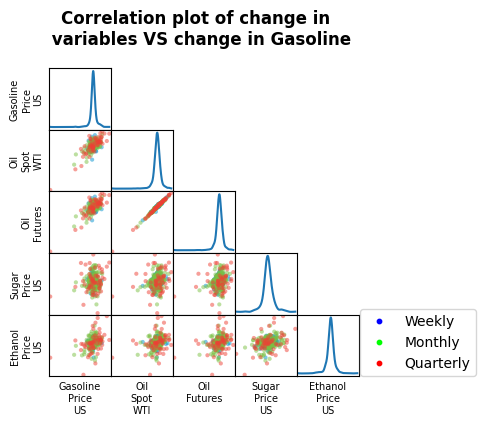

In [206]:
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

color_wheel = {1: "#0392cf", #b
               2: "#7bc043", #g
               3: "#ee4035"} #r
colors = merge_result_w_index.index.map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(merge_result_w_index[['Gasoline Price US','Oil Spot WTI','Oil Futures','Sugar Price US','Ethanol Price US']], color=colors
                    , alpha=0.5, figsize=(4, 4), diagonal='kde', marker = '.')
for i in range(np.shape(ax)[0]):
    for j in range(np.shape(ax)[1]):
        if i < j:
            ax[i,j].set_visible(False)

for ax in ax.ravel():
    
    ax.set_xlabel(ax.get_xlabel().replace(' ', '\n'), fontsize = 7, rotation = 0, weight = 'medium')
    ax.set_ylabel(ax.get_ylabel().replace(' ', '\n'), fontsize = 7, rotation = 90, weight = 'medium')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])

plt.suptitle('Correlation plot of change in \n variables VS change in Gasoline', size = 12, weight = 'bold',va = 'bottom', x= 0.5, y= 0.93)



handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker="o", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
handles = [handles[0],handles[2],handles[1]]
labels=["Weekly", "Monthly", "Quarterly"]
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

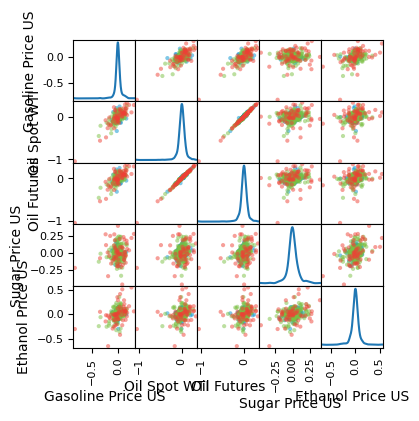

In [207]:
ax = scatter_matrix(merge_result_w_index[['Gasoline Price US','Oil Spot WTI','Oil Futures','Sugar Price US','Ethanol Price US']], color=colors
                    , alpha=0.5, figsize=(4, 4), diagonal='kde', marker = '.')

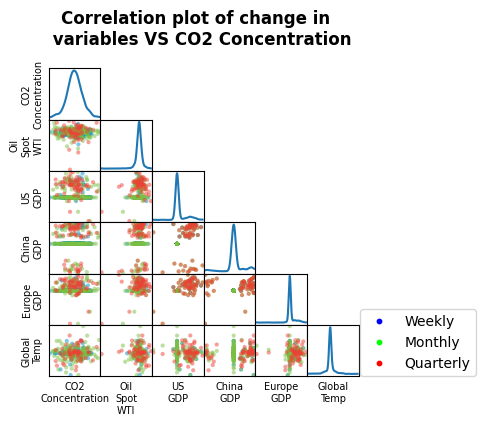

In [208]:
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

color_wheel = {1: "#0392cf", #b
               2: "#7bc043", #g
               3: "#ee4035"} #r
colors = merge_result_w_index.index.map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(merge_result_w_index[['CO2 Concentration', 'Oil Spot WTI','US GDP', 'China GDP', 'Europe GDP', 'Global Temp']], color=colors
                    , alpha=0.5, figsize=(4, 4), diagonal='kde', marker = '.')

for i in range(np.shape(ax)[0]):
    for j in range(np.shape(ax)[1]):
        if i < j:
            ax[i,j].set_visible(False)

for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel().replace(' ', '\n'), fontsize = 7, rotation = 0, weight = 'medium')
    ax.set_ylabel(ax.get_ylabel().replace(' ', '\n'), fontsize = 7, rotation = 90, weight = 'medium')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    
plt.suptitle('Correlation plot of change in \n variables VS CO2 Concentration', size = 12, weight = 'bold',va = 'bottom', x= 0.5, y= 0.93)

handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker="o", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
handles = [handles[0],handles[2],handles[1]]
labels=["Weekly", "Monthly", "Quarterly"]
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

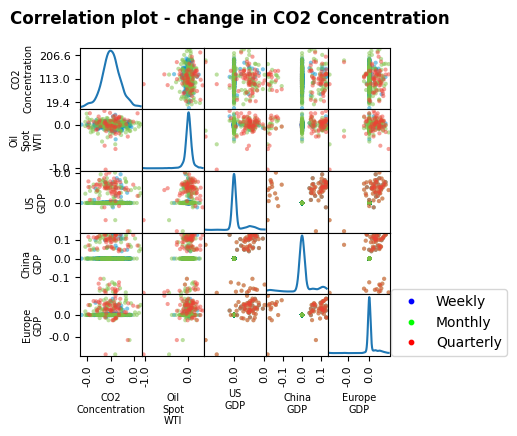

In [209]:
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

color_wheel = {1: "#0392cf", #b
               2: "#7bc043", #g
               3: "#ee4035"} #r
colors = merge_result_w_index.index.map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(merge_result_w_index[['CO2 Concentration', 'Oil Spot WTI','US GDP', 'China GDP', 'Europe GDP']], color=colors
                    , alpha=0.5, figsize=(4, 4), diagonal='kde', marker = '.')
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel().replace(' ', '\n'), fontsize = 7, rotation = 0)
    ax.set_ylabel(ax.get_ylabel().replace(' ', '\n'), fontsize = 7, rotation = 90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.suptitle('Correlation plot - change in CO2 Concentration', size = 12, weight = 'bold',va = 'bottom', x= 0.5, y= 0.93)

handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker="o", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
handles = [handles[0],handles[2],handles[1]]
labels=["Weekly", "Monthly", "Quarterly"]
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

In [210]:
main_frame_granger.columns

Index(['Weekindex', 'Date', 'Year', 'Week', 'Day', 'Par_Month', 'Par_Day',
       'oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1',
       'sugar_price_us', 'ethanol_price_us', 'chg_oil_spot_WTI',
       'chg_oil_spot_Brent', 'chg_oil_spot_WTI_Positive',
       'chg_oil_spot_WTI_Negative', 'chg_oil_future_contract1',
       'chg_oil_future_contract1_Positive',
       'chg_oil_future_contract1_Negative', 'Gasoline_Price_US',
       'chg_Gasoline_price_US', 'chg_Gasoline_price_US_Positive',
       'chg_Gasoline_price_US_future', 'Date_edited', 'year', 'day', 'decimal',
       'average', 'ndays', '1_year_ago', '10_years_ago', 'increase_since_1800',
       'co2_conc', 'chg_co2_conc', 'Quarter', 'gdp_date', 'gdp_us',
       'gdp_china', 'gdp_europe', 'Celsius', 'Month', 'Par_Quarter'],
      dtype='object')

In [211]:
main_frame_granger_week = main_frame_granger.groupby('Weekindex').last()[[ 'Date','Gasoline_Price_US','co2_conc','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]
main_frame_granger_month = main_frame_granger.groupby('Par_Month').last()[[ 'Date','Gasoline_Price_US','co2_conc','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]

#Quarterly 
Par_Quarter = []
for i in range(len(main_frame_granger)):
    Par_Quarter.append(str(main_frame_granger.loc[i].Year) + str(main_frame_granger.loc[i].Quarter))
main_frame_granger['Par_Quarter'] = Par_Quarter
main_frame_granger_quarter = main_frame_granger.groupby('Par_Quarter').last()[[ 'Date','Gasoline_Price_US','co2_conc','oil_spot_WTI', 'oil_spot_Brent', 'future_oil_contract_1','sugar_price_us', 'ethanol_price_us','gdp_us', 'gdp_china', 'gdp_europe', 'Celsius']]


In [212]:
main_frame_granger_week.to_csv('weeklygg.csv')
main_frame_granger_month.to_csv('monthlygg.csv')
main_frame_granger_quarter.to_csv('quarterlygg.csv')